<div style="background-color: lightgray;text-align: center;line-height:10px; padding: 10px; border-radius: 5px; font-size:16px;">
    <h1>BIKE SHARING ASSIGNMENT</h1>
    <p><b>By:</b></p>
    <p>Deepak TM</p>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">Primary Goal of the Analysis</h2>
</div>

This analysis aims to identify and quantify the key factors driving demand for shared bikes in the US market. By building a predictive model using linear regression, we will uncover actionable insights that BoomBikes can leverage to optimize its business strategies, such as bike availability and pricing, and guide potential expansion into new markets.

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">Data Discovery</h2>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Importing Libraries</h3>
</div>

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

# ignoring the warning
warnings.filterwarnings('ignore')

# customize global behavior related to DataFrame display
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Setting Style
plt.style.use('tableau-colorblind10')

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Load Dataset From CSV</h3>
</div>

In [8]:
df_org = pd.read_csv("day.csv")

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Explore the Dataset</h3>
</div>

In [10]:
df_org.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [11]:
raw_data_shape = df_org.shape
print (f'The raw dataset contains: {raw_data_shape[0]} Rows and {raw_data_shape[1]} Columns')

The raw dataset contains: 730 Rows and 16 Columns


In [12]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
    <b style="color: blue;">Observations from data.info()</b>
    <ul>
      <li><b>No Missing Values:</b> All columns have 730 non-null values, indicating no missing data.No imputation required.</li>
      <li><b>Datatype Conversion Needed (dteday):</b> The 'dteday' column is currently an 'object' dtype, likely representing dates as strings.</li> 
      <li><b>Numerical and Categorical Columns:</b>
        <ul>
          <li><b>Numerical (10 columns):</b> 'instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'.</li>
          <li><b>Categorical:</b> 'dteday' (after converting to datetime, we can extract categorical features like day of the week, month, etc.).</li>
        </ul>
      </li>
    </ul>  
</div> 

In [14]:
df_org.describe(include='all')

instant      dteday      season          yr        mnth  \
count   730.000000         730  730.000000  730.000000  730.000000   
unique         NaN         730         NaN         NaN         NaN   
top            NaN  01-01-2018         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    365.500000         NaN    2.498630    0.500000    6.526027   
std     210.877136         NaN    1.110184    0.500343    3.450215   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.250000         NaN    2.000000    0.000000    4.000000   
50%     365.500000         NaN    3.000000    0.500000    7.000000   
75%     547.750000         NaN    3.000000    1.000000   10.000000   
max     730.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   730.000000  730.000000  730.000000  730.000000  730.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028767    2.997260    0.683562    1.394521   20.319259   
std       0.167266    2.006161    0.465405    0.544807    7.506729   
min       0.000000    0.000000    0.000000    1.000000    2.424346   
25%       0.000000    1.000000    0.000000    1.000000   13.811885   
50%       0.000000    3.000000    1.000000    1.000000   20.465826   
75%       0.000000    5.000000    1.000000    2.000000   26.880615   
max       1.000000    6.000000    1.000000    3.000000   35.328347   

             atemp         hum   windspeed       casual   registered  \
count   730.000000  730.000000  730.000000   730.000000   730.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean     23.726322   62.765175   12.763620   849.249315  3658.757534   
std       8.150308   14.237589    5.195841   686.479875  1559.758728   
min       3.953480    0.000000    1.500244     2.000000    20.000000   
25%      16.889713   52.000000    9.041650   316.250000  2502.250000   
50%      24.368225   62.625000   12.125325   717.000000  3664.500000   
75%      30.445775   72.989575   15.625589  1096.500000  4783.250000   
max      42.044800   97.250000   34.000021  3410.000000  6946.000000   

                cnt  
count    730.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4508.006849  
std     1936.011647  
min       22.000000  
25%     3169.750000  
50%     4548.500000  
75%     5966.000000  
max     8714.000000

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
    <p><b style="color: blue;">Observations from data.describe()</b></p>
    <b>1. Target Variable (what we want to predict):</b>
    <ul>
      <li><strong>cnt</strong>: Count of total rental bikes (casual + registered). This is the dependent variable.
        <ul>
          <li><strong>Observations:</strong> The average daily bike rental count is 4508, with a standard deviation of 1936, indicating a wide range of daily demand.  The maximum daily rentals reached 8714, while the minimum was 22.</li>
        </ul>
      </li>
    </ul>
    <b>2. Predictor Variables:</b>
    <b>Numerical:</b>
    <ul>
      <li><strong>temp</strong>: Temperature in Celsius (likely a strong predictor). 
        <ul>
          <li><strong>Observations:</strong> Average temperature is about 23.7°C, with expected seasonal variations. </li>
        </ul>
      </li>
      <li><strong>atemp</strong>: "Feels like" temperature in Celsius (could be more relevant than raw temperature).
        <ul>
          <li><strong>Observations:</strong> Average "feels like" temperature is slightly higher at 28.7°C. We'll need to explore the relationship between 'temp' and 'atemp'.</li>
        </ul>
      </li>
      <li><strong>hum</strong>: Humidity (might negatively correlate with bike rentals).
        <ul>
          <li><strong>Observations:</strong> Average humidity is 62.8%, with a fairly wide range (0% to 97%).</li>
        </ul>
      </li>
      <li><strong>windspeed</strong>: Wind speed (strong winds could discourage riding).
        <ul>
          <li><strong>Observations:</strong> Average windspeed is 12.8 with a maximum of 34. This could be a potential factor.</li>
        </ul>
      </li>
    </ul>
    <h5>Categorical (require encoding before modeling):</h5>
    <ul>
      <li><strong>season</strong>: Season (1:spring, 2:summer, 3:fall, 4:winter) - expect seasonal variations.
        <ul>
          <li><strong>Observations:</strong> We need to investigate which seasons see the highest and lowest bike rentals.</li>
        </ul>
      </li>
      <li><strong>yr</strong>: Year (0: 2018, 1:2019) - important to capture potential year-over-year trends.
        <ul>
          <li><strong>Observations:</strong> The dataset is split evenly between 2018 and 2019, allowing us to analyze if there's a significant difference in demand between the two years. </li>
        </ul>
      </li>
      <li><strong>mnth</strong>: Month (1 to 12) - provides finer-grained seasonal information than 'season'.
        <ul>
          <li><strong>Observations:</strong> Monthly data will help identify peak rental months.</li>
        </ul>
      </li>
      <li><strong>holiday</strong>: Whether the day is a holiday (0: no, 1: yes) - likely impacts bike usage patterns.
        <ul>
          <li><strong>Observations:</strong> Only about 2.8% of the days are marked as holidays. We need to compare bike rentals on holidays vs. non-holidays.</li>
        </ul>
      </li>
      <li><strong>weekday</strong>: Day of the week (0 to 6) - weekends vs. weekdays could show distinct patterns. 
        <ul>
          <li><strong>Observations:</strong> Analyzing weekday vs. weekend rentals will reveal potential differences in usage.</li>
        </ul>
      </li>
      <li><strong>workingday</strong>: If the day is neither a weekend nor a holiday (0: no, 1: yes). 
        <ul>
          <li><strong>Observations:</strong> This variable will help determine if rentals happened on weekdays or not.</li>
        </ul>
      </li>
      <li><strong>weathersit</strong>: Weather situation (1: Clear to Partly Cloudy, 2: Mist + Cloudy, 3: Light Snow/Rain, 4: Heavy Rain/Snow) - a crucial factor.
        <ul>
          <li><strong>Observations:</strong> Understanding how different weather conditions impact bike rentals will be important.</li>
        </ul>
      </li>
    </ul>
</div> 

In [16]:
df_org.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">Data Handling and Cleaning:</h2>
</div>

<div style="background-color: lightyellow; padding: 30px; border-radius: 2px;">
    <b style="color: black;">Approach</b>
    <ul>
    <li>
      <b>Handle Missing values:</b>
      <p>Since there are no missing values in this dataset we are not going to perfrom data imputation.</p></li>
    <li>
        <b>Handle Datatypes:</b>
        <p>Want to convert <b>dteday</b> columns to proper datetime datatypes. Because Im not sure which numbers in the weekday represent each day of the week.
        </p>
    </li>
    <li>
      <b>Drop Columns with Duplicates:</b>
      <p>Remove columns where all rows have the same value, as they add no useful information.</p></li>
    </ul>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Handling Datatype</h3>
</div>

In [20]:
# converting dteday to datatime format
df_org['dteday'] = pd.to_datetime(df_org['dteday'], format="%d-%m-%Y")

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Dropping Rows which haves duplicate values</h3>
</div>

In [22]:
df_org = df_org.drop_duplicates(subset='dteday')
print (f'Number of rows after dropping duplicates: {df_org.shape[0]}')

Number of rows after dropping duplicates: 730


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Renaming columns for better readability</h3>
</div>

In [24]:
df_org.rename(columns={'atemp': 'feels_like_temp',
                  'hum': 'humidity',
                  'weathersit': 'weather_situation',
                  'mnth': 'month',
                  'yr':'year'}, inplace=True)

In [25]:
df_org.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_situation', 'temp', 'feels_like_temp',
       'humidity', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Renaming Values for better readability</h3>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Assigning string value to season variable</h3>
</div>

In [28]:
# Encoding/mapping the season column
df_org.season = df_org.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Assigning string value to month variable</h3>
</div>

In [30]:
# Encoding/mapping the month column
df_org.month = df_org.month.map(
    {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',
     7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Assigning string value to weather_situation variable</h3>
</div>

In [32]:
# Encoding/mapping the weather_situation column
df_org.weather_situation = df_org.weather_situation.map(
    {1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Assigning string value to Weekday</h3>
</div>

In [34]:
# Encoding/mapping the weekend column
df_org.weekday = df_org.weekday.map(
    {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})

In [35]:
df_org.head()

instant     dteday  season  year month  holiday weekday  workingday  \
0        1 2018-01-01  Spring     0   Jan        0     Sat           0   
1        2 2018-01-02  Spring     0   Jan        0     Sun           0   
2        3 2018-01-03  Spring     0   Jan        0     Mon           1   
3        4 2018-01-04  Spring     0   Jan        0     Tue           1   
4        5 2018-01-05  Spring     0   Jan        0     Wed           1   

  weather_situation       temp  feels_like_temp  humidity  windspeed  casual  \
0             Misty  14.110847         18.18125   80.5833  10.749882     331   
1             Misty  14.902598         17.68695   69.6087  16.652113     131   
2             Clear   8.050924          9.47025   43.7273  16.636703     120   
3             Clear   8.200000         10.60610   59.0435  10.739832     108   
4             Clear   9.305237         11.46350   43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Dropping Extra columns</h3>
</div>

<div style="background-color: lightyellow; padding: 30px; border-radius: 2px;">
  <b style="color: black;">Approach:</b>
  <p>We'll begin by dropping Extra column that doesn't bring meaning to the analysis :</p>
      <strong>instant:</strong> 
        <p>This is merely a record index and does not provide any predictive value for our model.</p>
        <strong>dteday:</strong> 
        <p>It is the date in which each records are collected.</p>
        <strong>Casual and Registered:</strong> 
        <p>cnt is the addition of both registered and casual. so, dropping these columns.</p>
</div>

In [38]:
df = df_org.drop(columns=['instant','dteday','casual','registered'])
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 730 Rows and 12 Columns


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Segmenting columns based on Dtypes</h3>
</div>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    object 
 1   year               730 non-null    int64  
 2   month              730 non-null    object 
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    object 
 5   workingday         730 non-null    int64  
 6   weather_situation  730 non-null    object 
 7   temp               730 non-null    float64
 8   feels_like_temp    730 non-null    float64
 9   humidity           730 non-null    float64
 10  windspeed          730 non-null    float64
 11  cnt                730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [41]:
num_col = df.select_dtypes(include='number').columns.values
print(f'The numerical Columns are: \n{num_col}')

The numerical Columns are: 
['year' 'holiday' 'workingday' 'temp' 'feels_like_temp' 'humidity'
 'windspeed' 'cnt']


In [42]:
cat_col = df.select_dtypes(exclude='number').columns.values
print(f'The categorical Columns are: \n{cat_col}')

The categorical Columns are: 
['season' 'month' 'weekday' 'weather_situation']


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Outlier Analysis</h3>
</div>

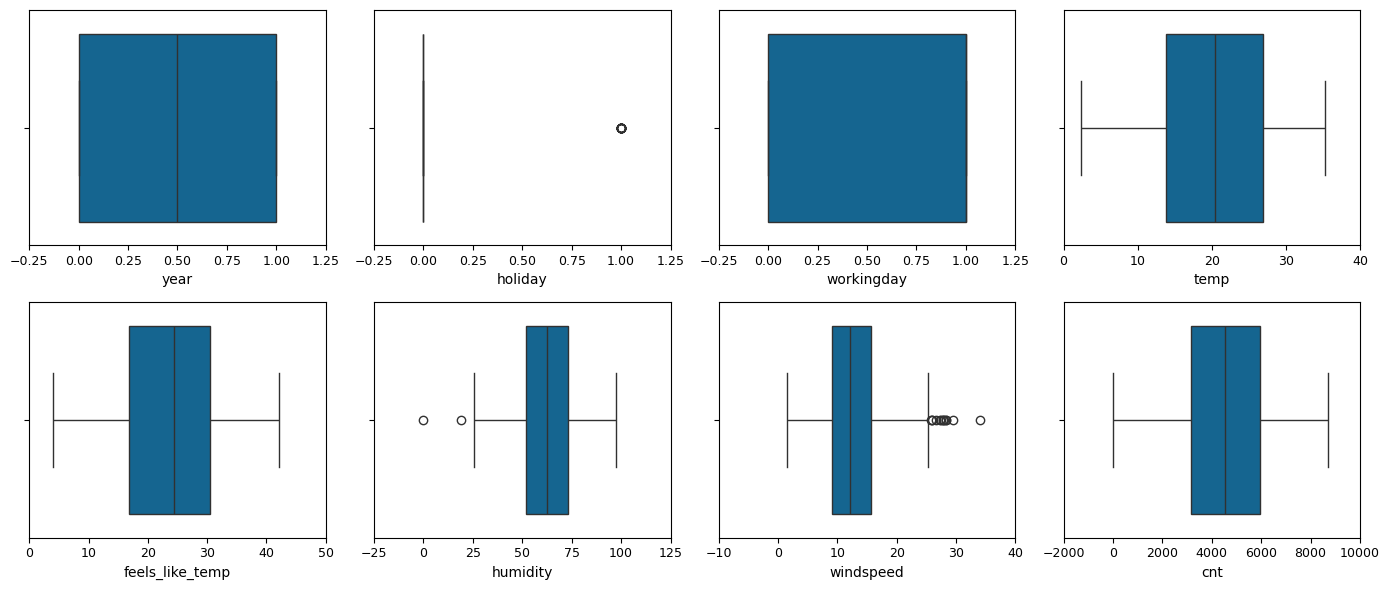

In [44]:
fig, axis = plt.subplots(2, 4, figsize=(14, 6))
axis = axis.flatten() 

# Loop through each numerical column and plot
idx = 0
for col in num_col:
    sns.boxplot(ax=axis[idx], data=df, x=col)
    axis[idx].set_xticks(axis[idx].get_xticks())  # Set the x-ticks explicitly
    axis[idx].set_xticklabels(axis[idx].get_xticklabels(), fontsize=9)
    idx +=1

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
  <h4 style="color: black;">Humidity Outlier Investigation:</h4>
</div>

In [46]:
Q1=df['humidity'].quantile(0.25)
Q3=df['humidity'].quantile(0.75)
IQR = Q3-Q1

lower_range = Q1-1.5*IQR
upper_range=Q3+1.5*IQR
outlier_IQR=df[(df['humidity']<lower_range) | (df['humidity']>upper_range)]
outlier_IQR

season  year month  holiday weekday  workingday weather_situation  \
49  Spring     0   Feb        0     Sat           0             Clear   
68  Spring     0   Mar        0    Thur           1    Light_snowrain   

         temp  feels_like_temp  humidity  windspeed   cnt  
49  16.365847          19.5702   18.7917  34.000021  1635  
68  15.952731          19.2834    0.0000  17.545759   623

In [47]:
# Comparing with the neighbouring records 
df.iloc[67:70]

season  year month  holiday weekday  workingday weather_situation  \
67  Spring     0   Mar        0     Wed           1             Misty   
68  Spring     0   Mar        0    Thur           1    Light_snowrain   
69  Spring     0   Mar        0     Fri           1             Misty   

         temp  feels_like_temp  humidity  windspeed   cnt  
67  12.129153          14.3304   77.5417  14.750050  1891  
68  15.952731          19.2834    0.0000  17.545759   623  
69  12.977402          15.2500   64.9565  15.608990  1977

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <b style="color: blue;">Observation</b>
    <p><strong>Humidity</strong>: </p>
        <p>There are 2 outlier records in the humidity in which there is one record that have 0 as values. 
            <p> <b>Explanation:</b> </p>
                <p>Water vapor is always present in the air, if only in trace amounts, and so it is impossible to have a relative humidity of exactly zero percent. <br>So, I find this to be some kind error in the reading.</p><p> Dropping of that record.</p>
</div>

In [49]:
df.drop(df[df['humidity'] ==0].index, inplace=True)
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 729 Rows and 12 Columns


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
  <h4 style="color: black;">Windspeed Outlier Investigation:</h4>
</div>

In [51]:
Q1=df['windspeed'].quantile(0.25)
Q3=df['windspeed'].quantile(0.75)
IQR = Q3-Q1

lower_range = Q1-1.5*IQR
upper_range=Q3+1.5*IQR
outlier_IQR=df[(df['windspeed']<lower_range) | (df['windspeed']>upper_range)]
outlier_IQR.sort_values(by='windspeed').tail(2)

season  year month  holiday weekday  workingday weather_situation  \
431  Spring     1   Mar        0    Thur           1             Clear   
49   Spring     0   Feb        0     Sat           0             Clear   

          temp  feels_like_temp  humidity  windspeed   cnt  
431  21.627500          26.2302   56.7500  29.584721  5382  
49   16.365847          19.5702   18.7917  34.000021  1635

In [52]:
# Comparing with the neighbouring records
df.iloc[48:51]

season  year month  holiday weekday  workingday weather_situation  \
48  Spring     0   Feb        0     Fri           1             Clear   
49  Spring     0   Feb        0     Sat           0             Clear   
50  Spring     0   Feb        0     Sun           0             Clear   

         temp  feels_like_temp  humidity  windspeed   cnt  
48  21.388347         25.59915   51.6667  17.749975  2927  
49  16.365847         19.57020   18.7917  34.000021  1635  
50  11.693897         13.86650   40.7826  14.956745  1812

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
  <b style="color: blue;">Observation:</b>
  <p>During outlier analysis, I observed an unusually high humidity value on 2018-02-19 (index 49). This prompted further investigation to determine if it was a data error or a genuine extreme value.</p>
  <p><b>Findings:</b></p>
  <ul>
    <li>Domain Expertise: A study by Ravi (2005) suggests a strong inverse relationship between wind speed and humidity. Higher wind speeds are associated with lower humidity, and vice versa.</li>
    <li>Data Consistency: Examining the data around the outlier, I see this relationship holds true:
      <ul>
        <li>On 2018-02-19 (high humidity), wind speed is relatively low (around 18).</li>
        <li>Neighboring dates with higher wind speeds (29.6, 34) exhibit expected lower humidity values. </li>
      </ul>
    </li>
  </ul>
  <p><b>Conclusion and Action:</b></p>
  <p>While the humidity value on 2018-02-19 is unusually high, it seems consistent with the general relationship between wind speed and humidity, as well as the specific weather patterns observed in the surrounding days. Therefore, I will NOT remove this data point. It could represent a genuine weather event and removing it might lead to loss of valuable information. </p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h2 style="color: black;">UNIVERIATE ANALYSIS:</h2>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Catergorical Univariate Analysis:</h3>
</div>

In [56]:
cat_col

array(['season', 'month', 'weekday', 'weather_situation'], dtype=object)

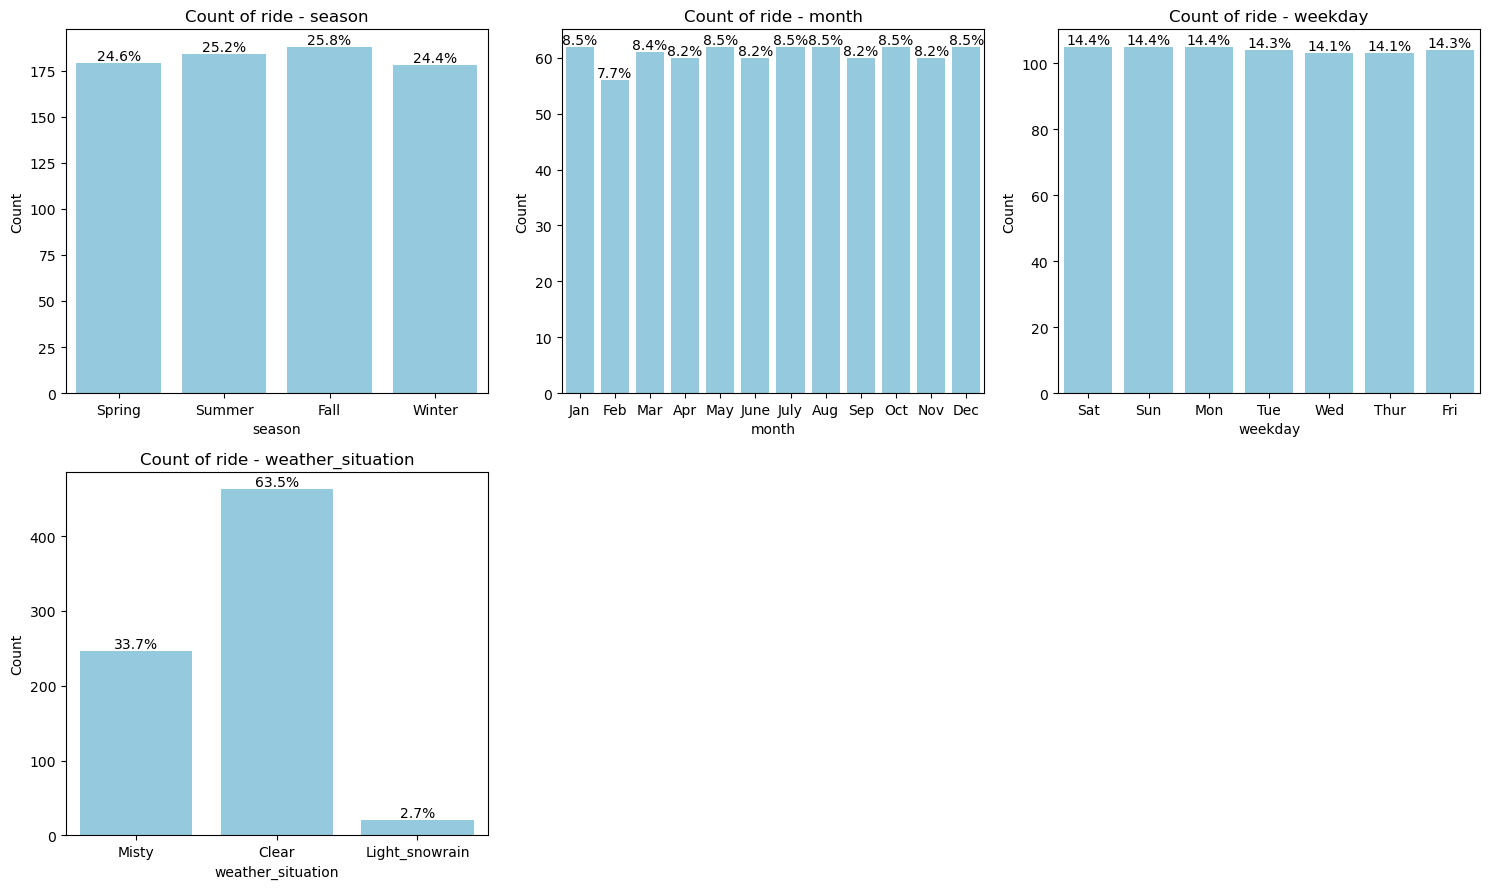

In [57]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(cat_col):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, color='skyblue')

    total = len(df[col])
    # Annotate each bar with the count
    for p in ax.patches:
        percentage = f'{p.get_height() / total * 100:.1f}%'  # Calculate percentage
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)
    ax.set_ylabel('Count')
    ax.set_title(f'Count of ride - {col}', fontsize=12)

axes[-1].set_visible(False)
axes[-2].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
  <b style="color: blue;">Observation:</b>
    <p><strong>Weekday</strong></p>
  <p>Uniform Distribution: The count very evenly distributed across all days of the week. There is no significant variation based on the day.</p>
    <p><strong>Month</strong></p>
  <p>Uniform Distribution: Mostly uniform but on feb there is drop it maybe due to shorter month.</p>
  <p><b>Weather Situation:</b></p>
  <ul>
    <li>clear Weather Situation: The vast majority of the data is of Clear Sky.</li>
    <li>Misty Weather Situation: Misty days still see a significant number of rides.</li>
  </ul>
</div>

<div style="background-color: lightgray; padding: 10px;">
    <h3 style="color: black;">Numerical Univariate Analysis</h3>
</div>

<div style="background-color: lightgray; padding: 10px;">
    <h4 style="color: black;">Continuous Numerical Columns</h4>
</div>

In [61]:
num_col

array(['year', 'holiday', 'workingday', 'temp', 'feels_like_temp',
       'humidity', 'windspeed', 'cnt'], dtype=object)

In [62]:
conti_numerical_cols =['temp','feels_like_temp','humidity','windspeed', 'cnt']

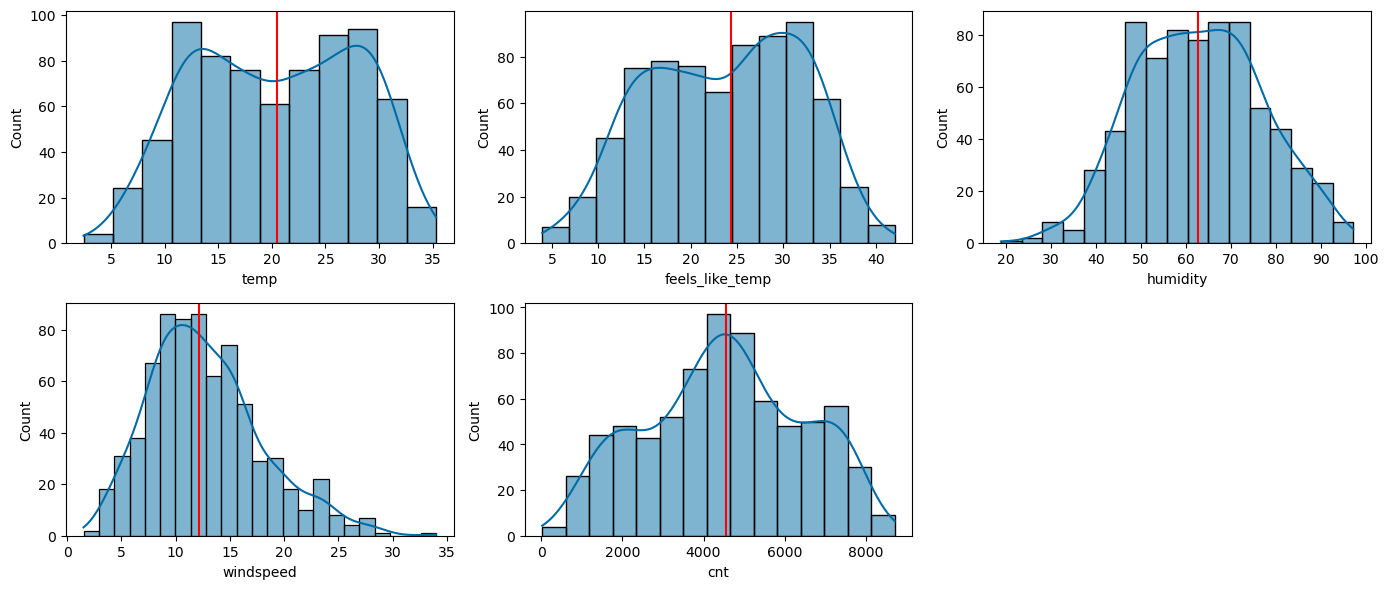

In [63]:
fig, axis = plt.subplots(2, 3, figsize=(14, 6))
axis = axis.flatten()  

idx = 0
for col in conti_numerical_cols:
    sns.histplot(df[col], ax=axis[idx], kde=True)
    axis[idx].axvline(x = df[col].median(), color='red')
    idx +=1

axis[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
  <b style="color: blue;">Observation:</b>
    <p><strong>Normality:</strong></p>
  <p>Several features show distributions that are close to a normal (Gaussian) distribution: <b>humidity, cnt</b>. This is generally good for linear regression as it assumes normality of the residuals (errors).</p>
    <p><strong>Bimodal Distibution:</strong></p>
  <p>Several features show Bimodal distributions that are: <b>temp, feels_like_temp</b>. Thee are not good for linear regression as Linear regression assumes a linear relationship between the independent and dependent variables. A bimodal distribution violates this assumption.</p>
  <p><b>Skewness:</b></p>
    <p><b>windspeed</b>: These is a slight right tail in it.</p>
</div>

<div style="background-color: lightgray; padding: 10px;">
    <h4 style="color: black;">Discrete Numerical Columns</h4>
</div>

In [66]:
disc_numerical_cols = list(set(num_col) - set(conti_numerical_cols))
print (f'The Discrete Numerical Columns are: \n{disc_numerical_cols}')

The Discrete Numerical Columns are: 
['holiday', 'year', 'workingday']


In [67]:
df[disc_numerical_cols].nunique()

holiday       2
year          2
workingday    2
dtype: int64

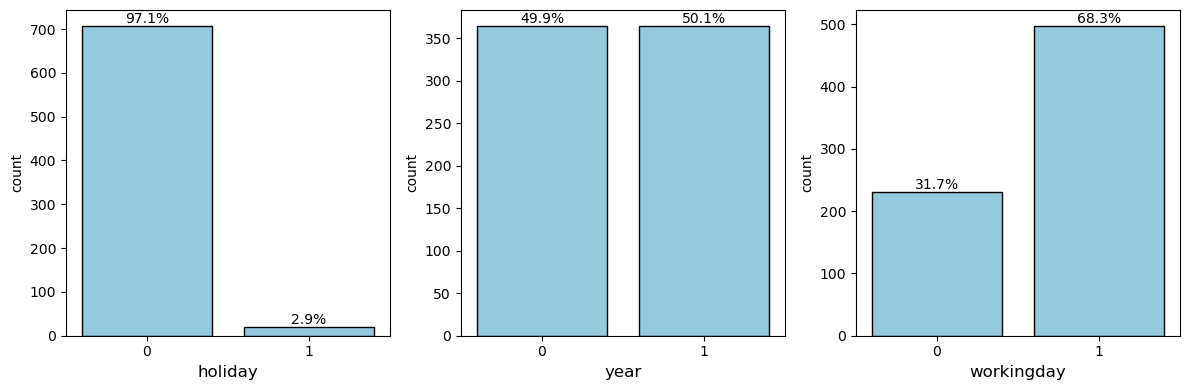

In [68]:
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(disc_numerical_cols):
    ax = axes[i]

    sns.countplot(x=col, data=df, ax=ax, color="skyblue", edgecolor='black', linewidth=1)

    ax.set_ylabel('count', fontsize=10)
    ax.set_xlabel(col, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    total = len(df[col])
    # Annotate each bar with the count
    for p in ax.patches:
        percentage = f'{p.get_height() / total * 100:.1f}%'  # Calculate percentage
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
  <b style="color: blue;">Observation:</b>
  <p>
  <ul>
      <li><b>holiday:</b> There is a notable drop in rentals on holidays, with only 2.9% of total rentals occurring on these days. This suggests that people are less likely to use shared bikes for commuting or daily errands during holidays. Including this feature in the model may not provide significant predictive value.</li>
      <li><b>workingday:</b> More rentals on working days, likely due to commuter use.</li>
      <li><b>year:</b> About the same number of rentals each year, suggesting year might not be a strong predictor on its own.</li>
  </ul>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Categorical vs Categorical Bivariate Analysis</h3>
</div>

In [71]:
cat_col

array(['season', 'month', 'weekday', 'weather_situation'], dtype=object)

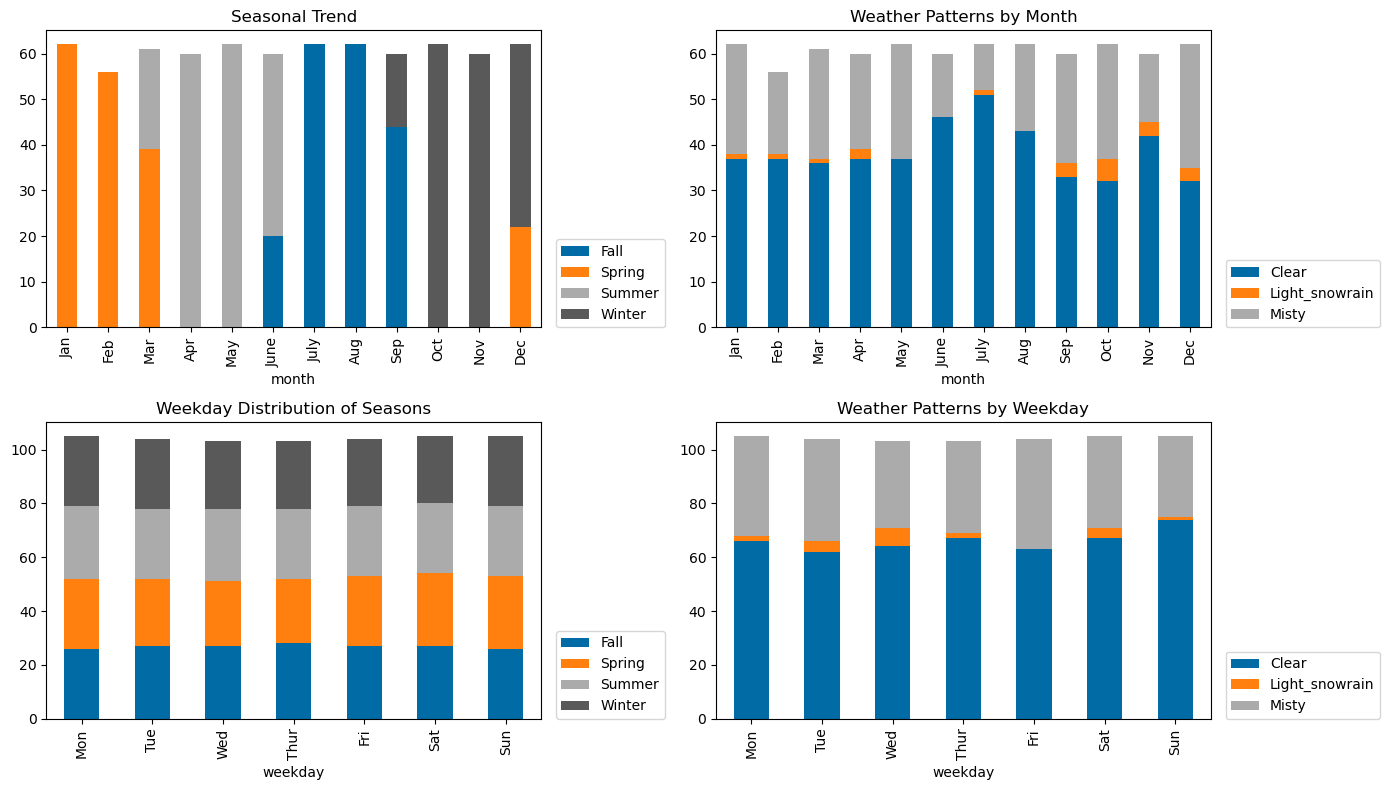

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten() 

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
week_order = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

# Plot 1
plot = 0
plot_stck = pd.crosstab(index=df['month'], columns=df['season']).reindex(month_order)
plot_stck.plot(kind='bar', stacked=True, ax=axes[plot])
axes[plot].legend(loc=(1.03,0))
axes[plot].set_title("Seasonal Trend")

# Plot 2
plot = 1
plot_stck = pd.crosstab(index=df['month'], columns=df['weather_situation']).reindex(month_order)
plot_stck.plot(kind='bar', stacked=True, ax=axes[plot])
axes[plot].legend(loc=(1.03,0))
axes[plot].set_title("Weather Patterns by Month")

# Plot 3
plot = 2
plot_stck = pd.crosstab(index=df['weekday'], columns=df['season']).reindex(week_order)
plot_stck.plot(kind='bar', stacked=True, ax=axes[plot])
axes[plot].legend(loc=(1.03,0))
axes[plot].set_title("Weekday Distribution of Seasons")

# Plot 4
plot = 3
plot_stck = pd.crosstab(index=df['weekday'], columns=df['weather_situation']).reindex(week_order)
plot_stck.plot(kind='bar', stacked=True, ax=axes[plot])
axes[plot].legend(loc=(1.03,0))
axes[plot].set_title("Weather Patterns by Weekday")


plt.tight_layout()
plt.show() 

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
    <b style="color: blue;">Observation:</b>
    <ul>
        <li><strong>Seasonal Trends:</strong> Summer is prominent in May through August, while Winter dominates December and January. Spring and Fall are seen intermittently, mainly in March and October.</li>
        <li><strong>Weather Patterns by Month:</strong> Clear weather is prevalent throughout the year. Light snow/rain is more frequent in the winter months, while mist appears evenly across the months, slightly increasing in summer.</li>
        <li><strong>Weekday Distribution of Seasons:</strong> Seasonal distribution is relatively consistent across weekdays, with Summer and Fall showing a slight dominance.</li>
        <li><strong>Weather Patterns by Weekday:</strong> Clear weather is the most frequent condition throughout the week. Mist is consistently present with a small increase on weekends, while light snow/rain shows minimal occurrence.</li>
    </ul>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Categorical vs Numerical Bivariate Analysis</h3>
</div>

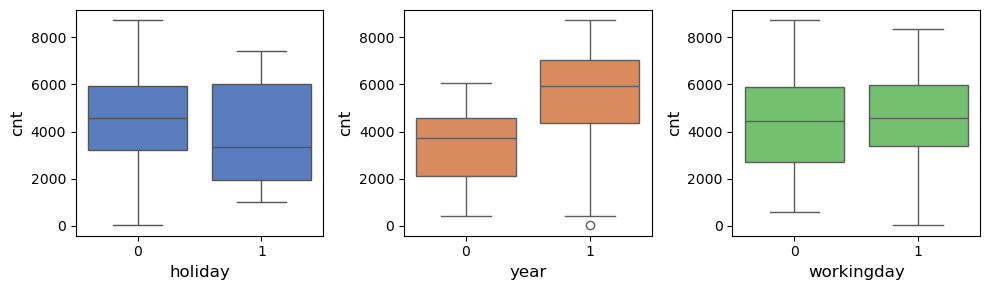

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes = axes.flatten()
idx = 0

for col in disc_numerical_cols:
    sns.boxplot(y=df['cnt'], x=df[col], ax=axes[idx], color=sns.color_palette("muted")[idx])
    axes[idx].set_xlabel(col, fontsize=12) 
    axes[idx].set_ylabel('cnt', fontsize=12)
    axes[idx].tick_params(axis='both', which='major', labelsize=10)
    idx += 1

plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
  <b style="color: blue;">Observation:</b>
    <ul>
<li><b>Year:</b> 2019 sees higher rental counts overall compared to 2018.</li    /li>
<li><b>Working Day vs Holiday:</b> Rental counts don't show a significant difference between working days and holi.    </li>
</ul>
</div>

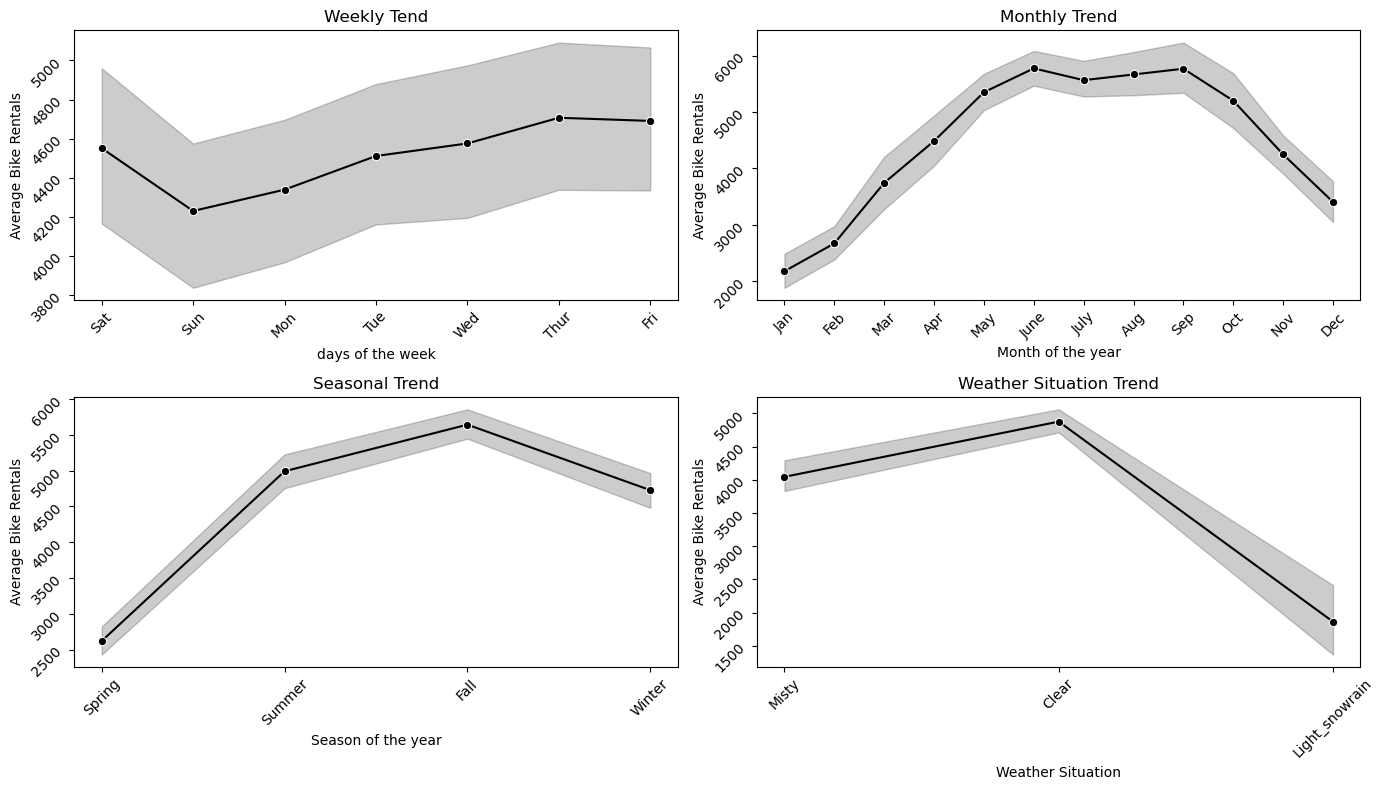

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten() 

# Plot 1: Weekday Trend
sns.lineplot(x=df['weekday'], y=df['cnt'], marker='o', color='k', ax=axes[0]) 
axes[0].set_ylabel("Average Bike Rentals", fontsize=10)
axes[0].set_xlabel("days of the week", fontsize=10)
axes[0].set_title('Weekly Tend', fontsize=12)
axes[0].tick_params(labelrotation=45)
# Plot 2: Monthly Trend
sns.lineplot(x=df['month'], y=df['cnt'], marker='o', color='k', ax=axes[1])
axes[1].set_ylabel("Average Bike Rentals", fontsize=10)
axes[1].set_xlabel("Month of the year", fontsize=10)
axes[1].set_title('Monthly Trend', fontsize=12)
axes[1].tick_params(labelrotation=45)
# Plot 3: Seasonal Trend
sns.lineplot(x=df['season'], y=df['cnt'], marker='o', color='k', ax=axes[2])
axes[2].set_ylabel("Average Bike Rentals", fontsize=10)
axes[2].set_xlabel("Season of the year", fontsize=10)
axes[2].set_title('Seasonal Trend', fontsize=12)
axes[2].tick_params(labelrotation=45)
# Plot 4: Weather Situation Trend
sns.lineplot(x=df['weather_situation'], y=df['cnt'], marker='o', color='k', ax=axes[3])
axes[3].set_ylabel("Average Bike Rentals", fontsize=10)
axes[3].set_xlabel("Weather Situation", fontsize=10)
axes[3].set_title('Weather Situation Trend', fontsize=12)
axes[3].tick_params(labelrotation=45)

plt.tight_layout()
plt.show() 

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
  <b style="color: blue;">Observation:</b>
    <ul>
        <li><b>Weekly Trend:</b> Bike rentals exhibit a clear weekly cyclical pattern.</li>
        <ul>
            <li>Rentals are lowest at the beginning of the week Sunday.</li>
            <li>They steadily increase towards a peak around midweek Thursday.</li>
        </ul>
    </ul>
    <ul>
        <li><b>Monthly Trend:</b> Bike rentals showcase a strong seasonal trend.</li>
        <ul>
            <li>Rentals are significantly lower during the Spring months (December-February).</li>
            <li>They rise sharply in Fall and peak during the summer months (June-August).</li>
            <li>A gradual decline follows throughout the winter, leading back into the winter low.</li>
        </ul>
    </ul>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Numerical vs Numerical Bivariate Analysis</h3>
</div>

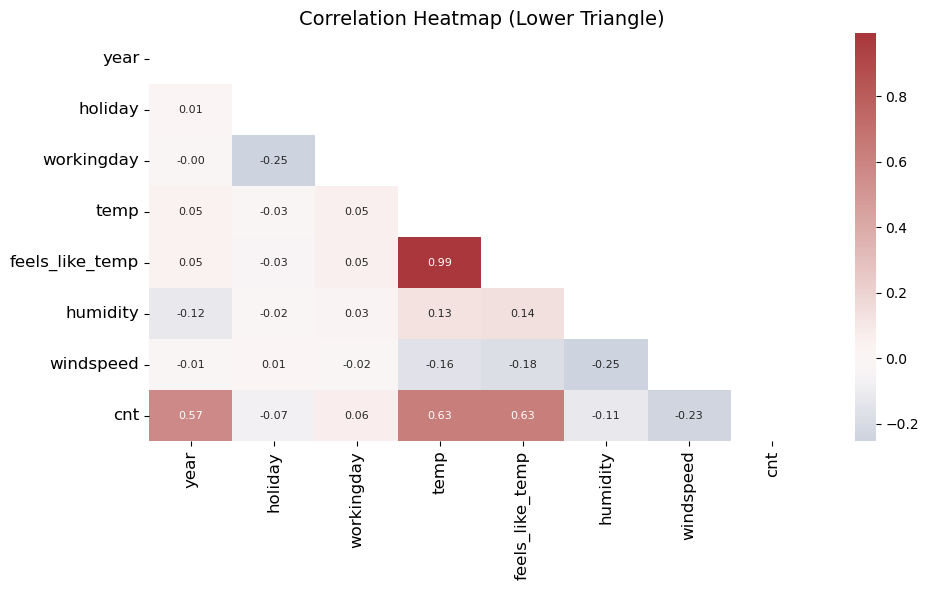

In [80]:
# Creating a correlation of numeric variable 
df_corr_mat = df.corr(numeric_only=True)

# Plotting it in heatmap
lower_tri = df_corr_mat.where(np.tril(np.ones(df_corr_mat.shape), k=-1).astype(bool))

plt.figure(figsize=(10, 6))
sns.heatmap(lower_tri, annot=True, cmap="vlag", fmt='.2f', annot_kws={"size": 8}, center=0)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Correlation Heatmap (Lower Triangle)", fontsize=14) 

plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 2px;">
  <b style="color: blue;">Observation:</b>
    <ul>
    <li><b>Strongest Positive Correlation:</b> cnt and registered(0.95), temp and feels_like_temp (0.99) and casual and workingday (-0.52)</li>
    </ul>
</div>

<Figure size 2000x2000 with 0 Axes>

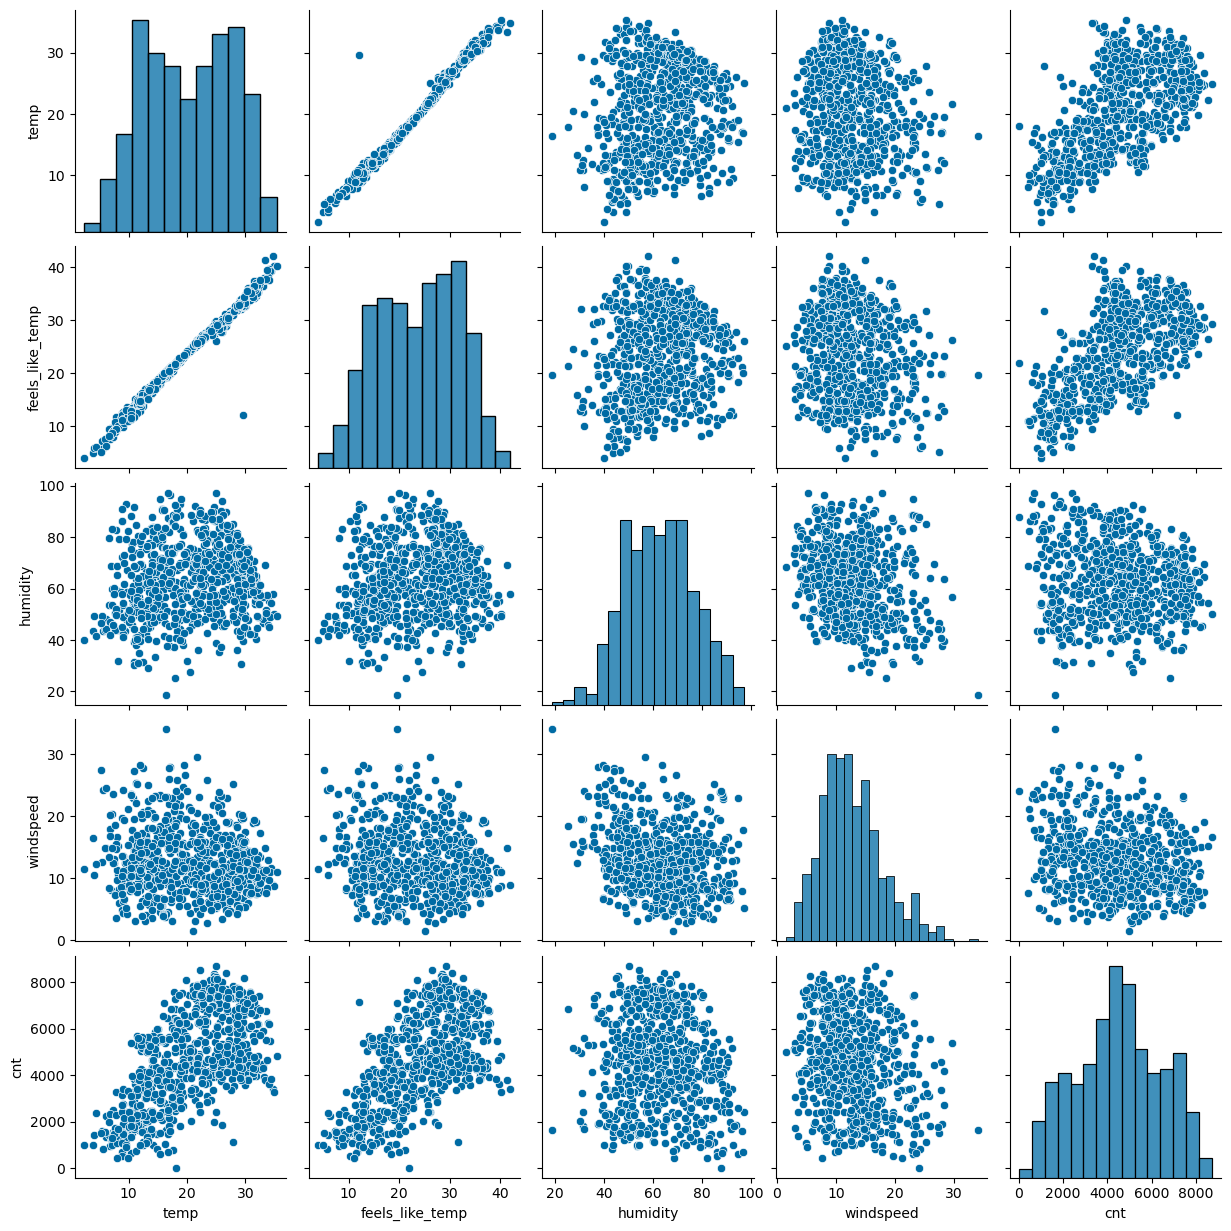

In [82]:
# Plotting pairplot
plt.figure(figsize=(20,20))
sns.pairplot(df[conti_numerical_cols])

plt.show()

<div style="background-color: offwhite; padding: 30px; border-radius: 2px;">
    <h2>Model Building Process</h2>
    <ol>
      <li><strong>Deriving Metrics</strong> <em>(Optional)</em></li>
      <li><strong>Creating Dummy Variables</strong>
        <ul>
          <li>One-hot encoding</li>
        </ul>
      </li>
      <li><strong>Model Building and Evaluation</strong>
        <ul>
          <li><strong>Data Preparation</strong>
            <ul>
              <li>Train-Test Split</li>
              <li>Feature Scaling (using MinMaxScaler)</li>
            </ul>
          </li>
          <li><strong>Feature Selection</strong>
            <ul>
              <li>Recursive Feature Elimination (RFE)</li>
            </ul>
          </li>
          <li><strong>Modeling and Iteration</strong>
            <ul>
              <li>Perform model iterations based on VIF (Variance Inflation Factor) and p-values (statistical significance)</li>
            </ul>
          </li>
            <li><strong>Evaluation</strong>
        <ul>
          <li>Checking Linearity</li>
          <li>Normality of Residuals</li>
            <ul>
                <li>Normal Distribution</li>
                <li>Q-Q Plot</li>
            </ul>
          <li>Independence of Residuals</li>
        </ul>
      </li>
      <li><strong>Making Predictions on Test Dataset</strong></li>
      <li><strong>Performance Metrics</strong>
        <ul>
          <li>Homoscedasticity Check</li>
          <li>R-squared (R²)</li>
          <li>Mean Squared Error (MSE)</li>
          <li>Root Mean Squared Error (RMSE)</li>
          <li>Breusch-Pagan Test (for heteroscedasticity)</li>
          <li>Observational Insights</li>
        </ul>
      </li>
    </ol>
</div>

In [393]:
# Importing all required packages before Linear Regression building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf #Independance check

import scipy.stats as stats  # QQ Plot

In [243]:
'''
Creating a function for dummy variable where 
i can maunally select the category to drop in a variable.
'''

def create_dummies(df, col):
    #printing the percentage of each category
    print(f"Percentage of each category in '{col}':")
    category_percentages = df[col].value_counts(normalize=True) * 100
    print(category_percentages)
    category_to_drop = input(f"\nEnter the category to drop from '{col}': ")   #getting input from the user
    #Generate dummy variables, dropping the specified category
    dummies = pd.get_dummies(df[col], prefix=col, dtype=int).drop(f'{col}_{category_to_drop}', axis=1)    
    df = pd.concat([df, dummies], axis=1).drop(columns=[col])
    print(f"\nDummy variables created for '{col}', excluding '{category_to_drop}'.")
    return df

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">MODEL 1</h2>
</div>

In [246]:
model = 1

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Dummy Variables (One-hot encoding)</h3>
</div>

In [249]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temp', 'feels_like_temp', 'humidity', 'windspeed',
       'cnt'],
      dtype='object')

In [251]:
dummy_df = df.copy()

In [253]:
dummy_df.head()

season  year month  holiday weekday  workingday weather_situation  \
0  Spring     0   Jan        0     Sat           0             Misty   
1  Spring     0   Jan        0     Sun           0             Misty   
2  Spring     0   Jan        0     Mon           1             Clear   
3  Spring     0   Jan        0     Tue           1             Clear   
4  Spring     0   Jan        0     Wed           1             Clear   

        temp  feels_like_temp  humidity  windspeed   cnt  
0  14.110847         18.18125   80.5833  10.749882   985  
1  14.902598         17.68695   69.6087  16.652113   801  
2   8.050924          9.47025   43.7273  16.636703  1349  
3   8.200000         10.60610   59.0435  10.739832  1562  
4   9.305237         11.46350   43.6957  12.522300  1600

In [255]:
# Creating a dummies for weather_situation and choosing which catogory to drop
# Clear
dummy_df = create_dummies(dummy_df, "weather_situation")

Percentage of each category in 'weather_situation':
weather_situation
Clear             63.511660
Misty             33.744856
Light_snowrain     2.743484
Name: proportion, dtype: float64



Enter the category to drop from 'weather_situation':  Clear



Dummy variables created for 'weather_situation', excluding 'Clear'.


In [257]:
# Creating a dummies for season and choosing which catogory to drop
# Fall
dummy_df = create_dummies(dummy_df, "season")

Percentage of each category in 'season':
season
Fall      25.788752
Summer    25.240055
Spring    24.554184
Winter    24.417010
Name: proportion, dtype: float64



Enter the category to drop from 'season':  Fall



Dummy variables created for 'season', excluding 'Fall'.


In [259]:
# Creating a dummies for month and choosing which catogory to drop
# Jan
dummy_df = create_dummies(dummy_df, "month")

Percentage of each category in 'month':
month
Jan     8.504801
May     8.504801
July    8.504801
Aug     8.504801
Oct     8.504801
Dec     8.504801
Mar     8.367627
Apr     8.230453
June    8.230453
Sep     8.230453
Nov     8.230453
Feb     7.681756
Name: proportion, dtype: float64



Enter the category to drop from 'month':  Jan



Dummy variables created for 'month', excluding 'Jan'.


In [261]:
# Creating a dummies for weekday and choosing which catogory to drop
# Sat
dummy_df = create_dummies(dummy_df, "weekday")

Percentage of each category in 'weekday':
weekday
Sat     14.403292
Sun     14.403292
Mon     14.403292
Tue     14.266118
Fri     14.266118
Wed     14.128944
Thur    14.128944
Name: proportion, dtype: float64



Enter the category to drop from 'weekday':  Sat



Dummy variables created for 'weekday', excluding 'Sat'.


In [263]:
dummy_df.head()

year  holiday  workingday       temp  feels_like_temp  humidity  windspeed  \
0     0        0           0  14.110847         18.18125   80.5833  10.749882   
1     0        0           0  14.902598         17.68695   69.6087  16.652113   
2     0        0           1   8.050924          9.47025   43.7273  16.636703   
3     0        0           1   8.200000         10.60610   59.0435  10.739832   
4     0        0           1   9.305237         11.46350   43.6957  12.522300   

    cnt  weather_situation_Light_snowrain  weather_situation_Misty  \
0   985                                 0                        1   
1   801                                 0                        1   
2  1349                                 0                        0   
3  1562                                 0                        0   
4  1600                                 0                        0   

   season_Spring  season_Summer  season_Winter  month_Apr  month_Aug  \
0              1              0              0          0          0   
1              1              0              0          0          0   
2              1              0              0          0          0   
3              1              0              0          0          0   
4              1              0              0          0          0   

   month_Dec  month_Feb  month_July  month_June  month_Mar  month_May  \
0          0          0           0           0          0          0   
1          0          0           0           0          0          0   
2          0          0           0           0          0          0   
3          0          0           0           0          0          0   
4          0          0           0           0          0          0   

   month_Nov  month_Oct  month_Sep  weekday_Fri  weekday_Mon  weekday_Sun  \
0          0          0          0            0            0            0   
1          0          0          0            0            0            1   
2          0          0          0            0            1            0   
3          0          0          0            0            0            0   
4          0          0          0            0            0            0   

   weekday_Thur  weekday_Tue  weekday_Wed  
0             0            0            0  
1             0            0            0  
2             0            0            0  
3             0            1            0  
4             0            0            1

In [265]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              729 non-null    int64  
 1   holiday                           729 non-null    int64  
 2   workingday                        729 non-null    int64  
 3   temp                              729 non-null    float64
 4   feels_like_temp                   729 non-null    float64
 5   humidity                          729 non-null    float64
 6   windspeed                         729 non-null    float64
 7   cnt                               729 non-null    int64  
 8   weather_situation_Light_snowrain  729 non-null    int32  
 9   weather_situation_Misty           729 non-null    int32  
 10  season_Spring                     729 non-null    int32  
 11  season_Summer                     729 non-null    int32  
 12  season_Winter

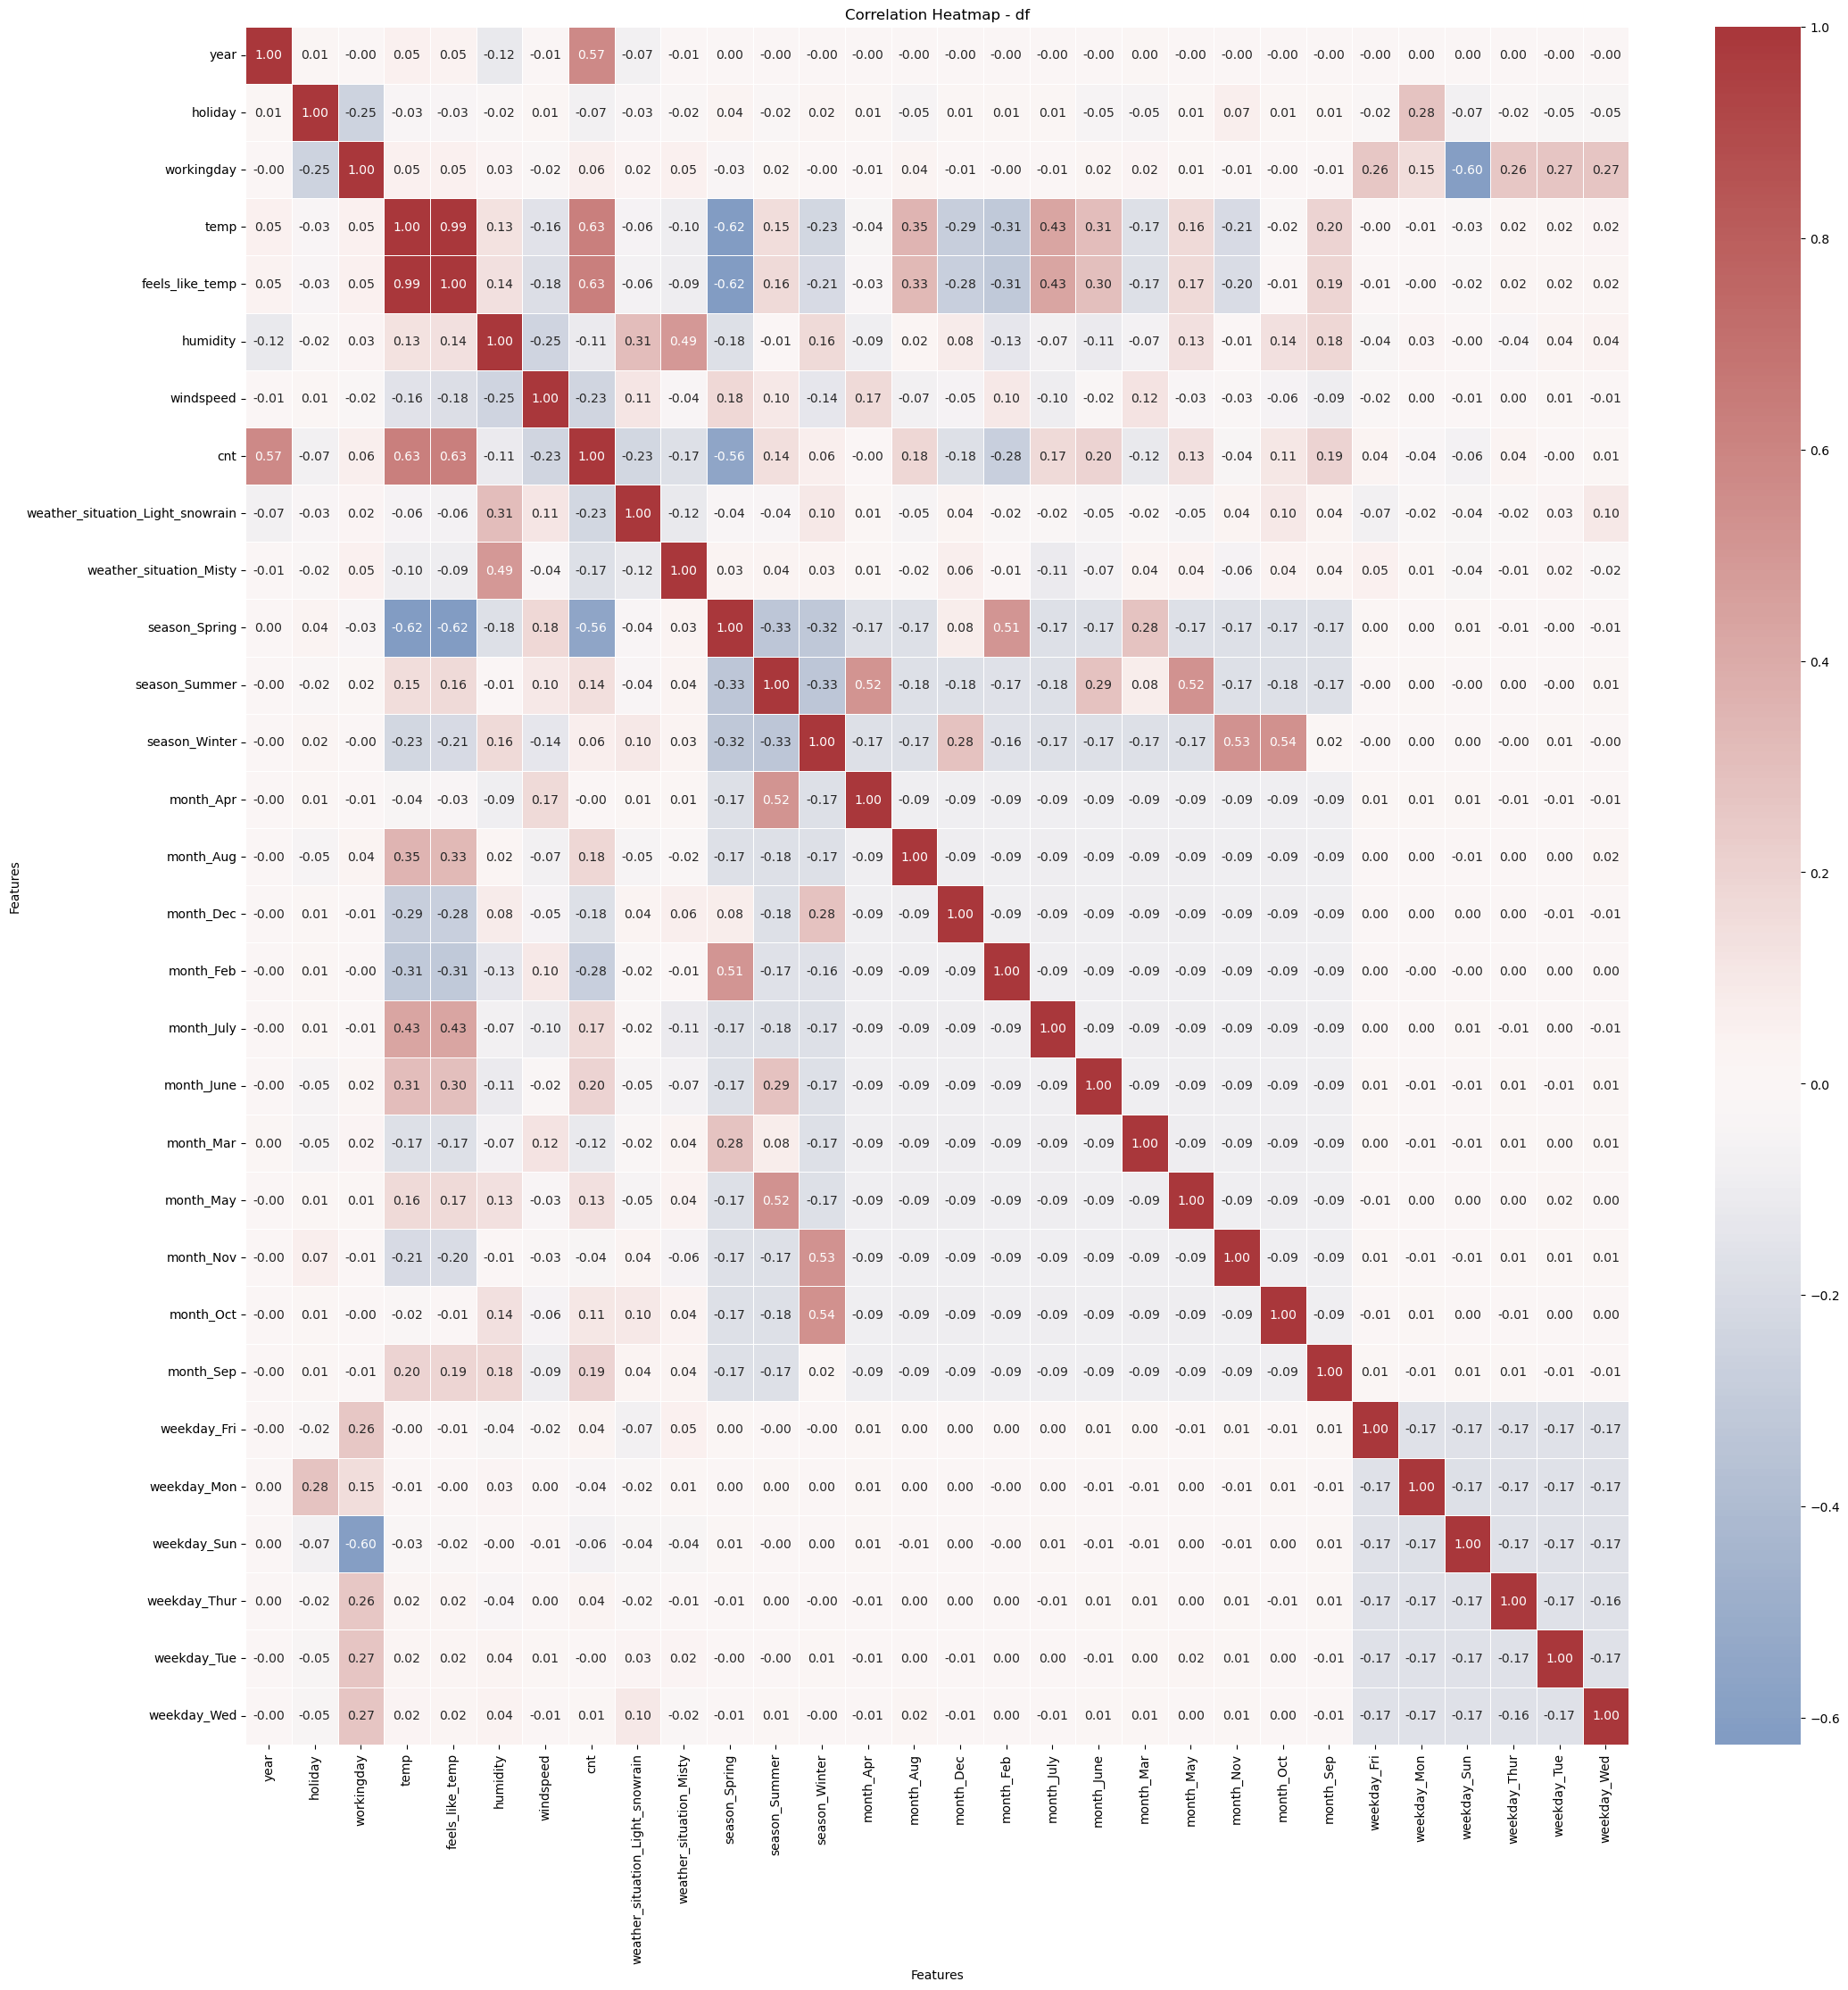

In [267]:
# Calculate the correlation matrix with all dummy variables
corr_matrix = dummy_df.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5, center=0)
# Set title and labels
plt.title('Correlation Heatmap - df')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

In [269]:
# Excluding few columns for this model
exclude_cols = ['feels_like_temp','holiday']
# Select columns not in `exclude_cols`
globals()[f'model{model}_df'] = dummy_df.loc[:, ~dummy_df.columns.isin(exclude_cols)]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Model Building and Evaluation</h3>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Train-Test Split</h4>
</div>

In [273]:
globals()[f'df_train{model}'],globals()[f'df_test{model}'] = train_test_split(eval(f'model{model}_df'), test_size=0.25, random_state=120)

In [275]:
print("Training dataset shape:", eval(f'df_train{model}').shape)
print("Testing dataset shape:", eval(f'df_test{model}').shape)

Training dataset shape: (546, 28)
Testing dataset shape: (183, 28)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Scaling</h4>
</div>

In [278]:
globals()[f'scaler{model}'] = MinMaxScaler()

globals()[f'df{model}_train_scale'] = eval(f'scaler{model}').fit_transform(eval(f'df_train{model}'))
# Use the same scaler fitted on the training data 
globals()[f'df{model}_test_scale']  = eval(f'scaler{model}').transform(eval(f'df_test{model}'))

In [280]:
# converting Array to dataframe
globals()[f'df{model}_train'] = pd.DataFrame(eval(f'df{model}_train_scale'),columns=eval(f'model{model}_df').columns)
globals()[f'df{model}_test'] = pd.DataFrame(eval(f'df{model}_test_scale'),columns=eval(f'model{model}_df').columns)

In [282]:
# Splitting the dependent variable and independent variable
# Train dataset
globals()[f'X{model}_train'] = eval(f'df{model}_train').drop('cnt',axis=1)
globals()[f'y{model}_train'] = eval(f'df{model}_train')['cnt']

# Test Dataset
globals()[f'X{model}_test'] = eval(f'df{model}_test').drop('cnt',axis=1)
globals()[f'y{model}_test'] = eval(f'df{model}_test')['cnt']

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Selection</h4>
</div>

In [285]:
len(eval(f'X{model}_train').columns)

27

In [287]:
# Considering 18 columns 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=18) #8-25

selector = selector.fit(eval(f'X{model}_train'), eval(f'y{model}_train'))

In [289]:
pd.DataFrame({
    'Feature': eval(f'X{model}_train').columns, 
    'Selected': selector.support_,
    'Rank': selector.ranking_
}).sort_values(by='Rank')

Feature  Selected  Rank
0                               year      True     1
24                      weekday_Thur      True     1
23                       weekday_Sun      True     1
22                       weekday_Mon      True     1
21                       weekday_Fri      True     1
20                         month_Sep      True     1
18                         month_Nov      True     1
25                       weekday_Tue      True     1
12                         month_Dec      True     1
26                       weekday_Wed      True     1
6            weather_situation_Misty      True     1
1                         workingday      True     1
2                               temp      True     1
7                      season_Spring      True     1
3                           humidity      True     1
4                          windspeed      True     1
9                      season_Winter      True     1
5   weather_situation_Light_snowrain      True     1
17                         month_May     False     2
16                         month_Mar     False     3
19                         month_Oct     False     4
10                         month_Apr     False     5
15                        month_June     False     6
11                         month_Aug     False     7
13                         month_Feb     False     8
14                        month_July     False     9
8                      season_Summer     False    10

In [291]:
# Selecting the columns which VIF selected for further model building.
selected_feature = eval(f'X{model}_train').columns[selector.support_]
print(selected_feature)

Index(['year', 'workingday', 'temp', 'humidity', 'windspeed',
       'weather_situation_Light_snowrain', 'weather_situation_Misty',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov', 'month_Sep',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')


In [293]:
# Selecting the feature based on RFE in training and testing dataset
globals()[f'X{model}_train'] = eval(f'X{model}_train')[selected_feature]
globals()[f'X{model}_test'] = eval(f'X{model}_test')[selected_feature]

In [295]:
print(eval(f'X{model}_train').shape)
print(eval(f'X{model}_test').shape)

(546, 18)
(183, 18)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Modeling</h4>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 1</b></h5>
</div>

In [299]:
iteration = 1

In [301]:
# Adding interseption (beta0) to the model 
globals()[f'X{model}_train_sm'] = sm.add_constant(eval(f'X{model}_train'))
globals()[f'X{model}_test_sm'] = sm.add_constant(eval(f'X{model}_test'))

In [303]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     152.8
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.13e-195
Time:                        16:18:22   Log-Likelihood:                 511.65
No. Observations:                 546   AIC:                            -985.3
Df Residuals:                     527   BIC:                            -903.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3548      0.030     11.766      0.000       0.296       0.414
year                                 0.2515      0.008     29.881      0.000       0.235       0.268
workingday                           0.0839      0.025      3.367      0.001       0.035       0.133
temp                                 0.3978      0.031     13.007      0.000       0.338       0.458
humidity                            -0.1144      0.030     -3.769      0.000      -0.174      -0.055
windspeed                           -0.1173      0.025     -4.786      0.000      -0.166      -0.069
weather_situation_Light_snowrain    -0.2449      0.030     -8.188      0.000      -0.304      -0.186
weather_situation_Misty             -0.0583      0.011     -5.187      0.000      -0.080      -0.036
season_Spring                       -0.1522      0.016     -9.694      0.000      -0.183      -0.121
season_Winter                        0.0897      0.015      6.103      0.000       0.061       0.119
month_Dec                           -0.0811      0.017     -4.660      0.000      -0.115      -0.047
month_Nov                           -0.0836      0.020     -4.267      0.000      -0.122      -0.045
month_Sep                            0.0534      0.016      3.325      0.001       0.022       0.085
weekday_Fri                         -0.1069      0.029     -3.675      0.000      -0.164      -0.050
weekday_Mon                         -0.1237      0.027     -4.617      0.000      -0.176      -0.071
weekday_Sun                         -0.0742      0.016     -4.662      0.000      -0.106      -0.043
weekday_Thur                        -0.1037      0.029     -3.572      0.000      -0.161      -0.047
weekday_Tue                         -0.1216      0.029     -4.148      0.000      -0.179      -0.064
weekday_Wed                         -0.1180      0.030     -3.997      0.000      -0.176      -0.060
==============================================================================
Omnibus:                       77.513   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.055
Skew:                          -0.712   Prob(JB):                     2.97e-45
Kurtosis:                       5.643   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  53.312546
2                         workingday   7.723740
16                      weekday_Thur   6.435590
13                       weekday_Fri   6.400362
17                       weekday_Tue   6.367396
18                       weekday_Wed   6.059848
14                       weekday_Mon   4.877446
3                               temp   2.883853
8                      season_Spring   2.691126
9                      season_Winter   2.298200
4                           humidity   2.006099
15                       weekday_Sun   1.898314
11                         month_Nov   1.702568
7            weather_situation_Misty   1.658320
6   weather_situation_Light_snowrain   1.402107
10                         month_Dec   1.342570
5                          windspeed   1.167751
12                         month_Sep   1.098065
1                               year   1.038140

In [307]:
# Dropping the column with high VIF and re-assigning it to the global variables
globals()[f'X{model}_train_sm'].drop("workingday", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("workingday", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 2</b></h5>
</div>

In [310]:
iteration = 2

In [312]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     158.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.34e-194
Time:                        16:18:35   Log-Likelihood:                 505.84
No. Observations:                 546   AIC:                            -975.7
Df Residuals:                     528   BIC:                            -898.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3563      0.030     11.704      0.000       0.296       0.416
year                                 0.2515      0.008     29.585      0.000       0.235       0.268
temp                                 0.3956      0.031     12.812      0.000       0.335       0.456
humidity                            -0.1130      0.031     -3.686      0.000      -0.173      -0.053
windspeed                           -0.1181      0.025     -4.773      0.000      -0.167      -0.070
weather_situation_Light_snowrain    -0.2447      0.030     -8.101      0.000      -0.304      -0.185
weather_situation_Misty             -0.0584      0.011     -5.146      0.000      -0.081      -0.036
season_Spring                       -0.1532      0.016     -9.665      0.000      -0.184      -0.122
season_Winter                        0.0909      0.015      6.127      0.000       0.062       0.120
month_Dec                           -0.0825      0.018     -4.695      0.000      -0.117      -0.048
month_Nov                           -0.0908      0.020     -4.617      0.000      -0.129      -0.052
month_Sep                            0.0515      0.016      3.175      0.002       0.020       0.083
weekday_Fri                         -0.0248      0.016     -1.550      0.122      -0.056       0.007
weekday_Mon                         -0.0523      0.017     -3.163      0.002      -0.085      -0.020
weekday_Sun                         -0.0742      0.016     -4.616      0.000      -0.106      -0.043
weekday_Thur                        -0.0217      0.016     -1.360      0.174      -0.053       0.010
weekday_Tue                         -0.0387      0.016     -2.409      0.016      -0.070      -0.007
weekday_Wed                         -0.0351      0.016     -2.134      0.033      -0.067      -0.003
==============================================================================
Omnibus:                       88.413   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.734
Skew:                          -0.804   Prob(JB):                     2.38e-52
Kurtosis:                       5.805   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  53.300338
2                               temp   2.882479
7                      season_Spring   2.690155
8                      season_Winter   2.296822
3                           humidity   2.005704
12                       weekday_Fri   1.904208
15                      weekday_Thur   1.900249
14                       weekday_Sun   1.898313
16                       weekday_Tue   1.875759
17                       weekday_Wed   1.840344
13                       weekday_Mon   1.823875
10                         month_Nov   1.682345
6            weather_situation_Misty   1.658308
5   weather_situation_Light_snowrain   1.402097
9                          month_Dec   1.341817
4                          windspeed   1.167640
11                         month_Sep   1.096639
1                               year   1.038133

In [316]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Thur", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Thur", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 3</b></h5>
</div>

In [319]:
iteration = 3

In [321]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     167.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          4.45e-195
Time:                        16:18:38   Log-Likelihood:                 504.89
No. Observations:                 546   AIC:                            -975.8
Df Residuals:                     529   BIC:                            -902.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3454      0.029     11.751      0.000       0.288       0.403
year                                 0.2515      0.009     29.570      0.000       0.235       0.268
temp                                 0.3947      0.031     12.775      0.000       0.334       0.455
humidity                            -0.1135      0.031     -3.699      0.000      -0.174      -0.053
windspeed                           -0.1192      0.025     -4.814      0.000      -0.168      -0.071
weather_situation_Light_snowrain    -0.2432      0.030     -8.049      0.000      -0.303      -0.184
weather_situation_Misty             -0.0582      0.011     -5.128      0.000      -0.081      -0.036
season_Spring                       -0.1531      0.016     -9.648      0.000      -0.184      -0.122
season_Winter                        0.0910      0.015      6.126      0.000       0.062       0.120
month_Dec                           -0.0830      0.018     -4.723      0.000      -0.118      -0.048
month_Nov                           -0.0915      0.020     -4.652      0.000      -0.130      -0.053
month_Sep                            0.0512      0.016      3.156      0.002       0.019       0.083
weekday_Fri                         -0.0128      0.013     -0.958      0.338      -0.039       0.013
weekday_Mon                         -0.0403      0.014     -2.880      0.004      -0.068      -0.013
weekday_Sun                         -0.0622      0.013     -4.625      0.000      -0.089      -0.036
weekday_Tue                         -0.0267      0.013     -1.988      0.047      -0.053      -0.000
weekday_Wed                         -0.0231      0.014     -1.663      0.097      -0.050       0.004
==============================================================================
Omnibus:                       86.968   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.991
Skew:                          -0.781   Prob(JB):                     4.67e-53
Kurtosis:                       5.856   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  49.617643
2                               temp   2.881151
7                      season_Spring   2.690028
8                      season_Winter   2.296802
3                           humidity   2.005433
10                         month_Nov   1.681102
6            weather_situation_Misty   1.658120
5   weather_situation_Light_snowrain   1.400183
9                          month_Dec   1.341148
14                       weekday_Sun   1.327426
12                       weekday_Fri   1.324485
16                       weekday_Wed   1.313106
15                       weekday_Tue   1.310205
13                       weekday_Mon   1.301235
4                          windspeed   1.166476
11                         month_Sep   1.096463
1                               year   1.038095

In [325]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Fri", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Fri", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 4</b></h5>
</div>

In [328]:
iteration = 4

In [330]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          5.17e-196
Time:                        16:18:41   Log-Likelihood:                 504.41
No. Observations:                 546   AIC:                            -976.8
Df Residuals:                     530   BIC:                            -908.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3412      0.029     11.742      0.000       0.284       0.398
year                                 0.2515      0.009     29.565      0.000       0.235       0.268
temp                                 0.3938      0.031     12.754      0.000       0.333       0.454
humidity                            -0.1128      0.031     -3.679      0.000      -0.173      -0.053
windspeed                           -0.1187      0.025     -4.794      0.000      -0.167      -0.070
weather_situation_Light_snowrain    -0.2419      0.030     -8.017      0.000      -0.301      -0.183
weather_situation_Misty             -0.0585      0.011     -5.158      0.000      -0.081      -0.036
season_Spring                       -0.1534      0.016     -9.670      0.000      -0.185      -0.122
season_Winter                        0.0904      0.015      6.093      0.000       0.061       0.120
month_Dec                           -0.0826      0.018     -4.704      0.000      -0.117      -0.048
month_Nov                           -0.0917      0.020     -4.661      0.000      -0.130      -0.053
month_Sep                            0.0507      0.016      3.125      0.002       0.019       0.083
weekday_Mon                         -0.0357      0.013     -2.716      0.007      -0.062      -0.010
weekday_Sun                         -0.0578      0.013     -4.577      0.000      -0.083      -0.033
weekday_Tue                         -0.0222      0.013     -1.764      0.078      -0.047       0.003
weekday_Wed                         -0.0187      0.013     -1.426      0.155      -0.044       0.007
==============================================================================
Omnibus:                       86.622   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.137
Skew:                          -0.778   Prob(JB):                     7.16e-53
Kurtosis:                       5.852   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  48.486200
2                               temp   2.878738
7                      season_Spring   2.689006
8                      season_Winter   2.292995
3                           humidity   2.004436
10                         month_Nov   1.680984
6            weather_situation_Misty   1.656758
5   weather_situation_Light_snowrain   1.397711
9                          month_Dec   1.340523
15                       weekday_Wed   1.167450
13                       weekday_Sun   1.166767
4                          windspeed   1.165895
12                       weekday_Mon   1.150549
14                       weekday_Tue   1.150435
11                         month_Sep   1.095154
1                               year   1.038025

In [334]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Wed", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Wed", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 5</b></h5>
</div>

In [337]:
iteration = 5

In [339]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.01e-196
Time:                        16:18:45   Log-Likelihood:                 503.37
No. Observations:                 546   AIC:                            -976.7
Df Residuals:                     531   BIC:                            -912.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3379      0.029     11.654      0.000       0.281       0.395
year                                 0.2517      0.009     29.568      0.000       0.235       0.268
temp                                 0.3923      0.031     12.699      0.000       0.332       0.453
humidity                            -0.1131      0.031     -3.685      0.000      -0.173      -0.053
windspeed                           -0.1190      0.025     -4.802      0.000      -0.168      -0.070
weather_situation_Light_snowrain    -0.2471      0.030     -8.238      0.000      -0.306      -0.188
weather_situation_Misty             -0.0583      0.011     -5.131      0.000      -0.081      -0.036
season_Spring                       -0.1534      0.016     -9.662      0.000      -0.185      -0.122
season_Winter                        0.0900      0.015      6.063      0.000       0.061       0.119
month_Dec                           -0.0826      0.018     -4.700      0.000      -0.117      -0.048
month_Nov                           -0.0923      0.020     -4.688      0.000      -0.131      -0.054
month_Sep                            0.0510      0.016      3.143      0.002       0.019       0.083
weekday_Mon                         -0.0314      0.013     -2.453      0.014      -0.057      -0.006
weekday_Sun                         -0.0534      0.012     -4.358      0.000      -0.077      -0.029
weekday_Tue                         -0.0178      0.012     -1.456      0.146      -0.042       0.006
==============================================================================
Omnibus:                       82.091   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.187
Skew:                          -0.743   Prob(JB):                     2.08e-49
Kurtosis:                       5.765   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  48.184606
2                               temp   2.875170
7                      season_Spring   2.689002
8                      season_Winter   2.292310
3                           humidity   2.004346
10                         month_Nov   1.680174
6            weather_situation_Misty   1.656333
5   weather_situation_Light_snowrain   1.377762
9                          month_Dec   1.340522
4                          windspeed   1.165815
13                       weekday_Sun   1.098607
11                         month_Sep   1.094922
12                       weekday_Mon   1.090601
14                       weekday_Tue   1.080267
1                               year   1.037665

In [343]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Tue", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Tue", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 6</b></h5>
</div>

In [346]:
iteration = 6

In [348]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.98e-197
Time:                        16:18:48   Log-Likelihood:                 502.28
No. Observations:                 546   AIC:                            -976.6
Df Residuals:                     532   BIC:                            -916.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3343      0.029     11.561      0.000       0.278       0.391
year                                 0.2516      0.009     29.524      0.000       0.235       0.268
temp                                 0.3939      0.031     12.744      0.000       0.333       0.455
humidity                            -0.1158      0.031     -3.776      0.000      -0.176      -0.056
windspeed                           -0.1194      0.025     -4.816      0.000      -0.168      -0.071
weather_situation_Light_snowrain    -0.2447      0.030     -8.161      0.000      -0.304      -0.186
weather_situation_Misty             -0.0576      0.011     -5.068      0.000      -0.080      -0.035
season_Spring                       -0.1528      0.016     -9.618      0.000      -0.184      -0.122
season_Winter                        0.0905      0.015      6.090      0.000       0.061       0.120
month_Dec                           -0.0822      0.018     -4.671      0.000      -0.117      -0.048
month_Nov                           -0.0918      0.020     -4.659      0.000      -0.131      -0.053
month_Sep                            0.0512      0.016      3.155      0.002       0.019       0.083
weekday_Mon                         -0.0276      0.013     -2.200      0.028      -0.052      -0.003
weekday_Sun                         -0.0496      0.012     -4.138      0.000      -0.073      -0.026
==============================================================================
Omnibus:                       82.617   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.392
Skew:                          -0.735   Prob(JB):                     1.27e-51
Kurtosis:                       5.854   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  47.839807
2                               temp   2.871664
7                      season_Spring   2.687250
8                      season_Winter   2.291214
3                           humidity   1.997008
10                         month_Nov   1.679662
6            weather_situation_Misty   1.653275
5   weather_situation_Light_snowrain   1.373534
9                          month_Dec   1.340138
4                          windspeed   1.165613
11                         month_Sep   1.094804
13                       weekday_Sun   1.047919
12                       weekday_Mon   1.045251
1                               year   1.037567

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Residual Analysis (Linearity)</h4>
</div>

In [396]:
# Predicting the known Y values in the training dataset using the model.
globals()[f'y{model}_train_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_train_sm'))

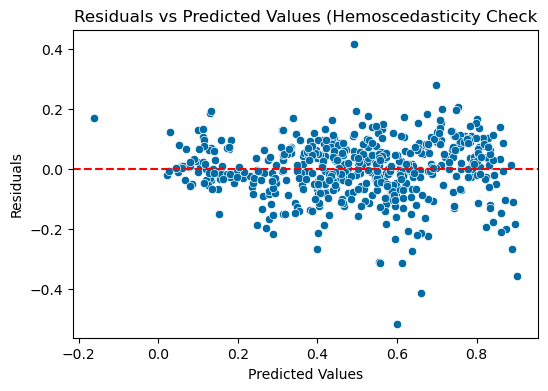

In [390]:
# Plot residuals vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Hemoscedasticity Check")
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Normality of Residuals</h4>
</div>

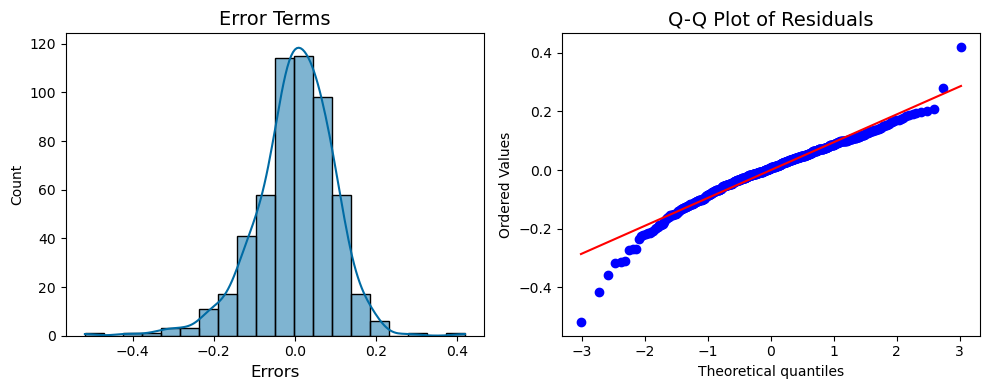

In [372]:
# Calculating the residual
residual_train = eval(f'y{model}_train') - eval(f'y{model}_train_pred')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

# Plot 1: Histogram of error terms
sns.histplot(residual_train, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Error Terms', fontsize=14)    
axes[0].set_xlabel('Errors', fontsize=12) 

#plot 2: Q-Q Plot
stats.probplot(residual_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals', fontsize=14) 

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Validating homoscedasticity on Training Set</h4>
</div>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

# Plot 1: Residuals vs. predicted values
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train, ax=axes[0])
axes[0].set_title('Residuals vs. Predicted Values (Training Set)', fontsize=14)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].axhline(y=0, color='r', linestyle='--')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Checking Independence of Reiduals</h4>
</div>

<Figure size 500x400 with 0 Axes>

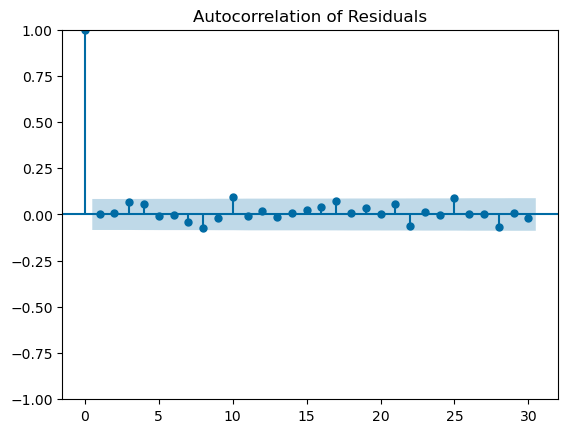

In [381]:
# Autocorrelation plot of residuals
plt.figure(figsize=(5, 4))
plot_acf(residual_train, lags=30)
plt.title("Autocorrelation of Residuals")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Making Prediction</h4>
</div>

In [400]:
# Making prediction on the test dataset using the model with last iteration
globals()[f'y{model}_test_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_test_sm'))

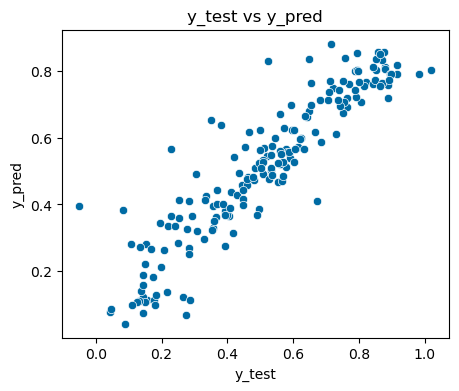

In [402]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test'), y=eval(f'y{model}_test_pred'))
fig.suptitle('y_test vs y_pred', fontsize = 10) 
plt.xlabel('y_test')                      
plt.ylabel('y_pred') 
plt.title('y_test vs y_pred')
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Performance Metrics</h4>
</div>

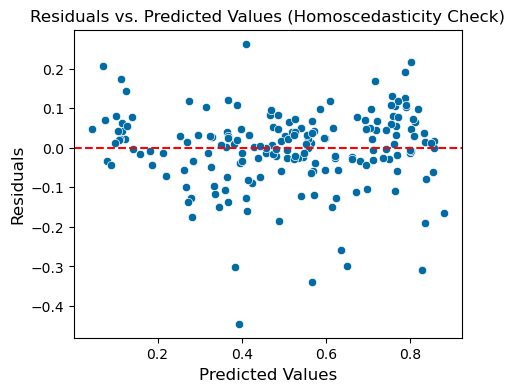

In [405]:
# Calculate residuals (errors):
residual_test = eval(f'y{model}_test') - eval(f'y{model}_test_pred')

# Plot residuals vs. predicted values
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test_pred'), y=residual_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values', fontdict={'fontsize': 12})
plt.ylabel('Residuals', fontdict={'fontsize': 12})
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

In [407]:
# Checking MSE, RMSE and R-Square values of both training and test set
# Training set:
mse_train = mean_squared_error(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))

# Test set:
mse_test = mean_squared_error(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))

print("Training Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, R-squared: {r2_train}")
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R-squared: {r2_test}")

Training Set Metrics:
MSE: 0.009300041894833319, RMSE: 0.09643672482427697, R-squared: 0.8336066951957259
Test Set Metrics:
MSE: 0.009613129600140635, RMSE: 0.09804656852812665, R-squared: 0.8346715458324503


In [409]:
# Checking the Breusch-Pagan test to statiscally check the homoscedasticity
bp_test = het_breuschpagan(residual_test, eval(f'X{model}_test_sm'))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 32.738310616517616, 'LM-Test p-value': 0.001865019423751083, 'F-Statistic': 2.8323788968494927, 'F-Test p-value': 0.001057275199435243}


In [411]:
eval(f'res{iteration}').params.sort_values(ascending=False)

temp                                0.393854
const                               0.334318
year                                0.251564
season_Winter                       0.090495
month_Sep                           0.051237
weekday_Mon                        -0.027637
weekday_Sun                        -0.049570
weather_situation_Misty            -0.057559
month_Dec                          -0.082211
month_Nov                          -0.091800
humidity                           -0.115821
windspeed                          -0.119448
season_Spring                      -0.152799
weather_situation_Light_snowrain   -0.244666
dtype: float64

## Observation:
The inital variables give a pretty good R-square value of 83.3% and i find that there is a bit of Homoscedasticity in the model.
Lets try with added Heat_index as the variable in the model and see how it respond.

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">MODEL 2</h2>
</div>

In [415]:
model = 2

In [417]:
model2_df = df.copy()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Feature Engineering</h3>
</div>

<div style="background-color: lightyellow; padding: 5px; border-radius: 2px;">
  <h4 style="color: black;">Heat_index:</h4> 
    <p>Calculates the Heat Index based on Celsius temperature and relative humidity. This will can be a alternate index of feels_like_temperature.</p>
    <h4 style="color: black;">Steadman formula for heat index:</h4>
</div>

$$ HI = c_1 + c_2T + c_3R + c_4TR + c_5T^2 + c_6R^2 + c_7T^2R + c_8TR^2 + c_9T^2R^2 $$
$Where,$

$c_1 =	-42.379$  ,  $c_2=	-2.04901523$  ,  $ c_3	= -10.14333127$

$c_4	-0.22475541$  ,  $c_5 =	-6.83783 \times 10^{−3}$ , $c_6	= -5.481717 \times 10^{−2}$

$c_7	-1.22874 \times 10^{−3}$ , $c_8	= 8.5282 \times 10^{−4}$ , $c_9	= -1.99 \times 10^{−6}$

In [422]:
def heat_index(temp_celsius, relative_humidity):
    temp_f = (temp_celsius * 9/5) + 32 
    
    # Heat index is typically only calculated for temperatures above 80°F
    if temp_f < 80:
        return temp_f # for temprature below 80°F returning the actual °F
    
    # Heat Index Calculation
    HI = (-42.379 
          + 2.04901523 * temp_f 
          + 10.14333127 * relative_humidity 
          - 0.22475541 * temp_f * relative_humidity 
          - 6.83783e-3 * temp_f**2 
          - 5.481717e-2 * relative_humidity**2 
          + 1.22874e-3 * temp_f**2 * relative_humidity 
          + 8.5282e-4 * temp_f * relative_humidity**2 
          - 1.99e-6 * temp_f**2 * relative_humidity**2)
    return HI

In [424]:
# Applying the heat_index function to create a variable
model2_df['heat_index'] = model2_df.apply(lambda x: heat_index(x['temp'], x['humidity']), axis=1)

In [426]:
model2_df.head()

season  year month  holiday weekday  workingday weather_situation  \
0  Spring     0   Jan        0     Sat           0             Misty   
1  Spring     0   Jan        0     Sun           0             Misty   
2  Spring     0   Jan        0     Mon           1             Clear   
3  Spring     0   Jan        0     Tue           1             Clear   
4  Spring     0   Jan        0     Wed           1             Clear   

        temp  feels_like_temp  humidity  windspeed   cnt  heat_index  
0  14.110847         18.18125   80.5833  10.749882   985   57.399525  
1  14.902598         17.68695   69.6087  16.652113   801   58.824676  
2   8.050924          9.47025   43.7273  16.636703  1349   46.491663  
3   8.200000         10.60610   59.0435  10.739832  1562   46.760000  
4   9.305237         11.46350   43.6957  12.522300  1600   48.749427

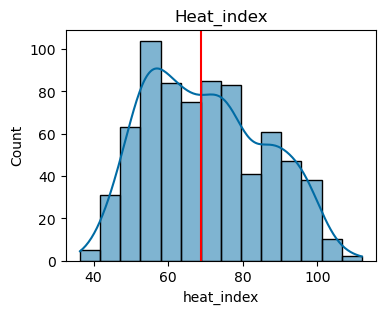

In [428]:
# Checking the distribution of Heat_index
plt.figure(figsize=(4,3))
sns.histplot(model2_df['heat_index'], kde=True)
plt.axvline(x = model2_df['heat_index'].median(), color='red')
plt.title("Heat_index")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Dummy Variables (One-hot encoding)</h3>
</div>

In [431]:
model2_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temp', 'feels_like_temp', 'humidity', 'windspeed',
       'cnt', 'heat_index'],
      dtype='object')

In [433]:
dummy_df = model2_df.copy()

In [435]:
dummy_df.head()

season  year month  holiday weekday  workingday weather_situation  \
0  Spring     0   Jan        0     Sat           0             Misty   
1  Spring     0   Jan        0     Sun           0             Misty   
2  Spring     0   Jan        0     Mon           1             Clear   
3  Spring     0   Jan        0     Tue           1             Clear   
4  Spring     0   Jan        0     Wed           1             Clear   

        temp  feels_like_temp  humidity  windspeed   cnt  heat_index  
0  14.110847         18.18125   80.5833  10.749882   985   57.399525  
1  14.902598         17.68695   69.6087  16.652113   801   58.824676  
2   8.050924          9.47025   43.7273  16.636703  1349   46.491663  
3   8.200000         10.60610   59.0435  10.739832  1562   46.760000  
4   9.305237         11.46350   43.6957  12.522300  1600   48.749427

In [437]:
# Creating a dummies for weather_situation and choosing which catogory to drop
# Clear
dummy_df = create_dummies(dummy_df, "weather_situation")

Percentage of each category in 'weather_situation':
weather_situation
Clear             63.511660
Misty             33.744856
Light_snowrain     2.743484
Name: proportion, dtype: float64



Enter the category to drop from 'weather_situation':  Clear



Dummy variables created for 'weather_situation', excluding 'Clear'.


In [439]:
# Creating a dummies for season and choosing which catogory to drop
# Fall
dummy_df = create_dummies(dummy_df, "season")

Percentage of each category in 'season':
season
Fall      25.788752
Summer    25.240055
Spring    24.554184
Winter    24.417010
Name: proportion, dtype: float64



Enter the category to drop from 'season':  Fall



Dummy variables created for 'season', excluding 'Fall'.


In [441]:
# Creating a dummies for month and choosing which catogory to drop
# Jan
dummy_df = create_dummies(dummy_df, "month")

Percentage of each category in 'month':
month
Jan     8.504801
May     8.504801
July    8.504801
Aug     8.504801
Oct     8.504801
Dec     8.504801
Mar     8.367627
Apr     8.230453
June    8.230453
Sep     8.230453
Nov     8.230453
Feb     7.681756
Name: proportion, dtype: float64



Enter the category to drop from 'month':  Jan



Dummy variables created for 'month', excluding 'Jan'.


In [443]:
# Creating a dummies for weekday and choosing which catogory to drop
# Sat
dummy_df = create_dummies(dummy_df, "weekday")

Percentage of each category in 'weekday':
weekday
Sat     14.403292
Sun     14.403292
Mon     14.403292
Tue     14.266118
Fri     14.266118
Wed     14.128944
Thur    14.128944
Name: proportion, dtype: float64



Enter the category to drop from 'weekday':  Sat



Dummy variables created for 'weekday', excluding 'Sat'.


In [445]:
dummy_df.head()

year  holiday  workingday       temp  feels_like_temp  humidity  windspeed  \
0     0        0           0  14.110847         18.18125   80.5833  10.749882   
1     0        0           0  14.902598         17.68695   69.6087  16.652113   
2     0        0           1   8.050924          9.47025   43.7273  16.636703   
3     0        0           1   8.200000         10.60610   59.0435  10.739832   
4     0        0           1   9.305237         11.46350   43.6957  12.522300   

    cnt  heat_index  weather_situation_Light_snowrain  \
0   985   57.399525                                 0   
1   801   58.824676                                 0   
2  1349   46.491663                                 0   
3  1562   46.760000                                 0   
4  1600   48.749427                                 0   

   weather_situation_Misty  season_Spring  season_Summer  season_Winter  \
0                        1              1              0              0   
1                        1              1              0              0   
2                        0              1              0              0   
3                        0              1              0              0   
4                        0              1              0              0   

   month_Apr  month_Aug  month_Dec  month_Feb  month_July  month_June  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Fri  \
0          0          0          0          0          0            0   
1          0          0          0          0          0            0   
2          0          0          0          0          0            0   
3          0          0          0          0          0            0   
4          0          0          0          0          0            0   

   weekday_Mon  weekday_Sun  weekday_Thur  weekday_Tue  weekday_Wed  
0            0            0             0            0            0  
1            0            1             0            0            0  
2            1            0             0            0            0  
3            0            0             0            1            0  
4            0            0             0            0            1

In [447]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              729 non-null    int64  
 1   holiday                           729 non-null    int64  
 2   workingday                        729 non-null    int64  
 3   temp                              729 non-null    float64
 4   feels_like_temp                   729 non-null    float64
 5   humidity                          729 non-null    float64
 6   windspeed                         729 non-null    float64
 7   cnt                               729 non-null    int64  
 8   heat_index                        729 non-null    float64
 9   weather_situation_Light_snowrain  729 non-null    int32  
 10  weather_situation_Misty           729 non-null    int32  
 11  season_Spring                     729 non-null    int32  
 12  season_Summer

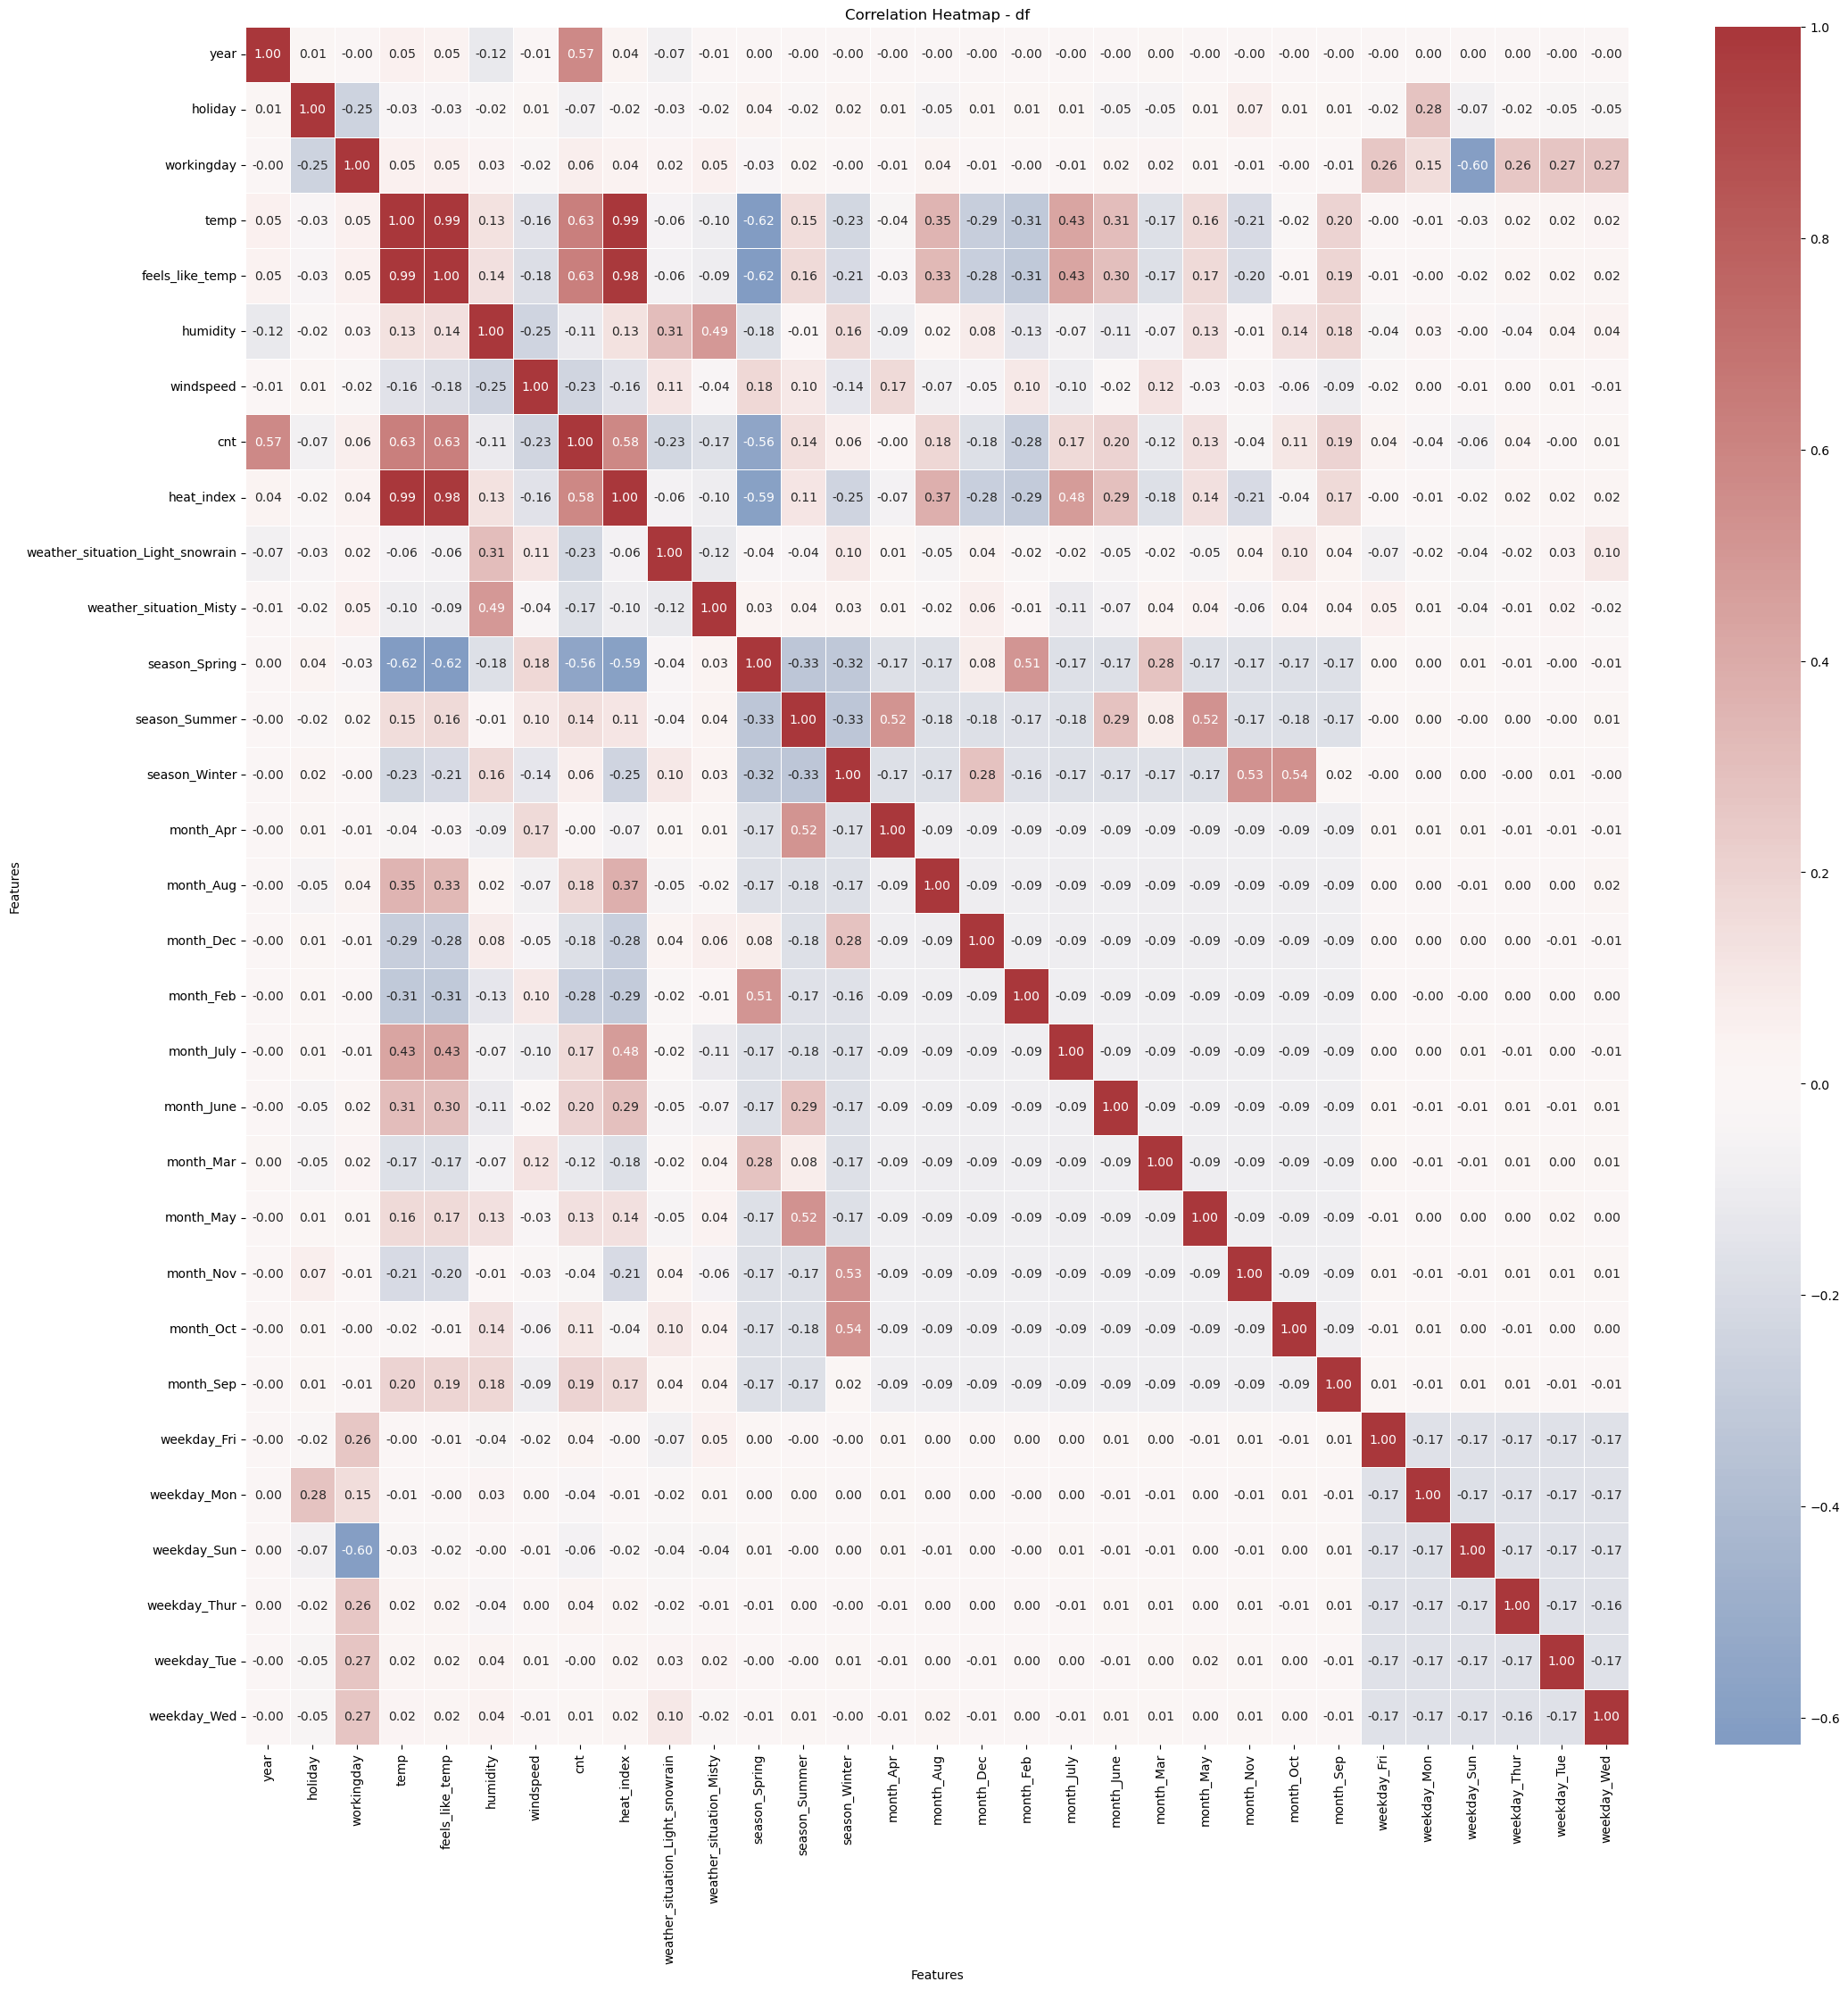

In [449]:
# Calculate the correlation matrix with all dummy variables
corr_matrix = dummy_df.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5, center=0)
# Set title and labels
plt.title('Correlation Heatmap - df')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

In [451]:
# Excluding few columns for this model
exclude_cols = ['feels_like_temp','holiday','temp']
# Select columns not in `exclude_cols`
globals()[f'model{model}_df'] = dummy_df.loc[:, ~dummy_df.columns.isin(exclude_cols)]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Model Building and Evaluation</h3>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Train-Test Split</h4>
</div>

In [455]:
globals()[f'df_train{model}'],globals()[f'df_test{model}'] = train_test_split(eval(f'model{model}_df'), test_size=0.25, random_state=120)

In [457]:
print("Training dataset shape:", eval(f'df_train{model}').shape)
print("Testing dataset shape:", eval(f'df_test{model}').shape)

Training dataset shape: (546, 28)
Testing dataset shape: (183, 28)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Scaling</h4>
</div>

In [460]:
globals()[f'scaler{model}'] = MinMaxScaler()

globals()[f'df{model}_train_scale'] = eval(f'scaler{model}').fit_transform(eval(f'df_train{model}'))
# Use the same scaler fitted on the training data 
globals()[f'df{model}_test_scale']  = eval(f'scaler{model}').transform(eval(f'df_test{model}'))

In [462]:
# converting Array to dataframe
globals()[f'df{model}_train'] = pd.DataFrame(eval(f'df{model}_train_scale'),columns=eval(f'model{model}_df').columns)
globals()[f'df{model}_test'] = pd.DataFrame(eval(f'df{model}_test_scale'),columns=eval(f'model{model}_df').columns)

In [473]:
# Splitting the dependent variable and independent variable
# Train dataset
globals()[f'X{model}_train'] = eval(f'df{model}_train').drop('cnt',axis=1)
globals()[f'y{model}_train'] = eval(f'df{model}_train')['cnt']

# Test Dataset
globals()[f'X{model}_test'] = eval(f'df{model}_test').drop('cnt',axis=1)
globals()[f'y{model}_test'] = eval(f'df{model}_test')['cnt']

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Selection</h4>
</div>

In [476]:
len(eval(f'X{model}_train').columns)

27

In [478]:
# Considering 18 columns 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=18) #8-25

selector = selector.fit(eval(f'X{model}_train'), eval(f'y{model}_train'))

In [480]:
pd.DataFrame({
    'Feature': eval(f'X{model}_train').columns, 
    'Selected': selector.support_,
    'Rank': selector.ranking_
}).sort_values(by='Rank')

Feature  Selected  Rank
0                               year      True     1
24                      weekday_Thur      True     1
23                       weekday_Sun      True     1
22                       weekday_Mon      True     1
21                       weekday_Fri      True     1
20                         month_Sep      True     1
19                         month_Oct      True     1
17                         month_May      True     1
16                         month_Mar      True     1
25                       weekday_Tue      True     1
26                       weekday_Wed      True     1
9                      season_Winter      True     1
7                      season_Spring      True     1
5   weather_situation_Light_snowrain      True     1
4                         heat_index      True     1
3                          windspeed      True     1
2                           humidity      True     1
1                         workingday      True     1
10                         month_Apr     False     2
15                        month_June     False     3
11                         month_Aug     False     4
14                        month_July     False     5
6            weather_situation_Misty     False     6
13                         month_Feb     False     7
12                         month_Dec     False     8
18                         month_Nov     False     9
8                      season_Summer     False    10

In [482]:
# Selecting the columns which VIF selected for further model building.
selected_feature = eval(f'X{model}_train').columns[selector.support_]
print(selected_feature)

Index(['year', 'workingday', 'humidity', 'windspeed', 'heat_index',
       'weather_situation_Light_snowrain', 'season_Spring', 'season_Winter',
       'month_Mar', 'month_May', 'month_Oct', 'month_Sep', 'weekday_Fri',
       'weekday_Mon', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')


In [484]:
# Selecting the feature based on RFE in training and testing dataset
globals()[f'X{model}_train'] = eval(f'X{model}_train')[selected_feature]
globals()[f'X{model}_test'] = eval(f'X{model}_test')[selected_feature]

In [486]:
print(eval(f'X{model}_train').shape)
print(eval(f'X{model}_test').shape)

(546, 18)
(183, 18)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Modeling</h4>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 1</b></h5>
</div>

In [490]:
iteration = 1

In [492]:
# Adding interseption (beta0) to the model 
globals()[f'X{model}_train_sm'] = sm.add_constant(eval(f'X{model}_train'))
globals()[f'X{model}_test_sm'] = sm.add_constant(eval(f'X{model}_test'))

In [494]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     133.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          6.05e-183
Time:                        16:59:13   Log-Likelihood:                 481.10
No. Observations:                 546   AIC:                            -924.2
Df Residuals:                     527   BIC:                            -842.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4196      0.030     14.046      0.000       0.361       0.478
year                                 0.2482      0.009     28.051      0.000       0.231       0.266
workingday                           0.0967      0.026      3.687      0.000       0.045       0.148
humidity                            -0.2436      0.026     -9.335      0.000      -0.295      -0.192
windspeed                           -0.1495      0.026     -5.838      0.000      -0.200      -0.099
heat_index                           0.4251      0.033     12.888      0.000       0.360       0.490
weather_situation_Light_snowrain    -0.1823      0.030     -6.175      0.000      -0.240      -0.124
season_Spring                       -0.1692      0.017    -10.198      0.000      -0.202      -0.137
season_Winter                        0.0286      0.016      1.763      0.079      -0.003       0.060
month_Mar                            0.0611      0.017      3.665      0.000       0.028       0.094
month_May                            0.0716      0.017      4.205      0.000       0.038       0.105
month_Oct                            0.0965      0.020      4.941      0.000       0.058       0.135
month_Sep                            0.1025      0.017      5.959      0.000       0.069       0.136
weekday_Fri                         -0.1165      0.031     -3.795      0.000      -0.177      -0.056
weekday_Mon                         -0.1280      0.028     -4.523      0.000      -0.184      -0.072
weekday_Sun                         -0.0656      0.017     -3.898      0.000      -0.099      -0.033
weekday_Thur                        -0.1144      0.031     -3.736      0.000      -0.175      -0.054
weekday_Tue                         -0.1291      0.031     -4.175      0.000      -0.190      -0.068
weekday_Wed                         -0.1222      0.031     -3.921      0.000      -0.183      -0.061
==============================================================================
Omnibus:                       81.994   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.272
Skew:                          -0.817   Prob(JB):                     1.18e-39
Kurtosis:                       5.282   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  46.792593
2                         workingday   7.663293
16                      weekday_Thur   6.399109
13                       weekday_Fri   6.369594
17                       weekday_Tue   6.332363
18                       weekday_Wed   6.035202
14                       weekday_Mon   4.866833
7                      season_Spring   2.685590
5                         heat_index   2.517925
8                      season_Winter   2.503666
15                       weekday_Sun   1.897180
11                         month_Oct   1.481826
3                           humidity   1.324834
6   weather_situation_Light_snowrain   1.220680
10                         month_May   1.195939
4                          windspeed   1.139106
9                          month_Mar   1.125985
12                         month_Sep   1.124978
1                               year   1.025681

In [498]:
# Dropping the column with high VIF and re-assigning it to the global variables
globals()[f'X{model}_train_sm'].drop("workingday", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("workingday", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 2</b></h5>
</div>

In [501]:
iteration = 2

In [503]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     137.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.98e-181
Time:                        16:59:19   Log-Likelihood:                 474.15
No. Observations:                 546   AIC:                            -912.3
Df Residuals:                     528   BIC:                            -834.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4217      0.030     13.955      0.000       0.362       0.481
year                                 0.2482      0.009     27.727      0.000       0.231       0.266
humidity                            -0.2413      0.026     -9.141      0.000      -0.293      -0.189
windspeed                           -0.1509      0.026     -5.823      0.000      -0.202      -0.100
heat_index                           0.4209      0.033     12.619      0.000       0.355       0.486
weather_situation_Light_snowrain    -0.1821      0.030     -6.098      0.000      -0.241      -0.123
season_Spring                       -0.1715      0.017    -10.223      0.000      -0.204      -0.139
season_Winter                        0.0254      0.016      1.551      0.122      -0.007       0.058
month_Mar                            0.0636      0.017      3.772      0.000       0.030       0.097
month_May                            0.0700      0.017      4.066      0.000       0.036       0.104
month_Oct                            0.0990      0.020      5.011      0.000       0.060       0.138
month_Sep                            0.1012      0.017      5.816      0.000       0.067       0.135
weekday_Fri                         -0.0217      0.017     -1.280      0.201      -0.055       0.012
weekday_Mon                         -0.0456      0.018     -2.596      0.010      -0.080      -0.011
weekday_Sun                         -0.0654      0.017     -3.841      0.000      -0.099      -0.032
weekday_Thur                        -0.0198      0.017     -1.169      0.243      -0.053       0.013
weekday_Tue                         -0.0334      0.017     -1.964      0.050      -0.067    2.18e-06
weekday_Wed                         -0.0265      0.017     -1.519      0.129      -0.061       0.008
==============================================================================
Omnibus:                       93.997   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.460
Skew:                          -0.919   Prob(JB):                     3.28e-46
Kurtosis:                       5.414   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [505]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  46.774724
6                      season_Spring   2.681799
4                         heat_index   2.514894
7                      season_Winter   2.496605
12                       weekday_Fri   1.905588
15                      weekday_Thur   1.902156
14                       weekday_Sun   1.897159
16                       weekday_Tue   1.874657
17                       weekday_Wed   1.846886
13                       weekday_Mon   1.829650
10                         month_Oct   1.480075
2                           humidity   1.324073
5   weather_situation_Light_snowrain   1.220678
9                          month_May   1.195180
3                          windspeed   1.138866
11                         month_Sep   1.124505
8                          month_Mar   1.124153
1                               year   1.025680

In [507]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Thur", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Thur", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 3</b></h5>
</div>

In [510]:
iteration = 3

In [512]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     145.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          6.40e-182
Time:                        16:59:23   Log-Likelihood:                 473.44
No. Observations:                 546   AIC:                            -912.9
Df Residuals:                     529   BIC:                            -839.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4117      0.029     14.203      0.000       0.355       0.469
year                                 0.2483      0.009     27.725      0.000       0.231       0.266
humidity                            -0.2414      0.026     -9.144      0.000      -0.293      -0.190
windspeed                           -0.1518      0.026     -5.858      0.000      -0.203      -0.101
heat_index                           0.4199      0.033     12.590      0.000       0.354       0.485
weather_situation_Light_snowrain    -0.1810      0.030     -6.063      0.000      -0.240      -0.122
season_Spring                       -0.1714      0.017    -10.216      0.000      -0.204      -0.138
season_Winter                        0.0247      0.016      1.509      0.132      -0.007       0.057
month_Mar                            0.0636      0.017      3.770      0.000       0.030       0.097
month_May                            0.0697      0.017      4.045      0.000       0.036       0.104
month_Oct                            0.1000      0.020      5.065      0.000       0.061       0.139
month_Sep                            0.1010      0.017      5.807      0.000       0.067       0.135
weekday_Fri                         -0.0108      0.014     -0.760      0.448      -0.039       0.017
weekday_Mon                         -0.0346      0.015     -2.331      0.020      -0.064      -0.005
weekday_Sun                         -0.0545      0.014     -3.828      0.000      -0.082      -0.027
weekday_Tue                         -0.0225      0.014     -1.581      0.114      -0.050       0.005
weekday_Wed                         -0.0156      0.015     -1.057      0.291      -0.045       0.013
==============================================================================
Omnibus:                       92.027   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.495
Skew:                          -0.895   Prob(JB):                     5.32e-46
Kurtosis:                       5.441   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [514]:
# Checking the VIF
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  43.010130
6                      season_Spring   2.681783
4                         heat_index   2.513411
7                      season_Winter   2.493323
10                         month_Oct   1.477304
2                           humidity   1.324032
12                       weekday_Fri   1.323087
14                       weekday_Sun   1.322216
16                       weekday_Wed   1.318292
15                       weekday_Tue   1.308464
13                       weekday_Mon   1.305387
5   weather_situation_Light_snowrain   1.219501
9                          month_May   1.194846
3                          windspeed   1.137878
11                         month_Sep   1.124465
8                          month_Mar   1.124153
1                               year   1.025639

In [516]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Fri", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Fri", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 4</b></h5>
</div>

In [519]:
iteration = 4

In [521]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     155.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          6.72e-183
Time:                        16:59:33   Log-Likelihood:                 473.15
No. Observations:                 546   AIC:                            -914.3
Df Residuals:                     530   BIC:                            -845.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4082      0.029     14.270      0.000       0.352       0.464
year                                 0.2482      0.009     27.729      0.000       0.231       0.266
humidity                            -0.2413      0.026     -9.143      0.000      -0.293      -0.189
windspeed                           -0.1515      0.026     -5.850      0.000      -0.202      -0.101
heat_index                           0.4193      0.033     12.579      0.000       0.354       0.485
weather_situation_Light_snowrain    -0.1798      0.030     -6.032      0.000      -0.238      -0.121
season_Spring                       -0.1716      0.017    -10.236      0.000      -0.205      -0.139
season_Winter                        0.0242      0.016      1.479      0.140      -0.008       0.056
month_Mar                            0.0638      0.017      3.786      0.000       0.031       0.097
month_May                            0.0696      0.017      4.041      0.000       0.036       0.103
month_Oct                            0.1002      0.020      5.080      0.000       0.061       0.139
month_Sep                            0.1006      0.017      5.786      0.000       0.066       0.135
weekday_Mon                         -0.0308      0.014     -2.205      0.028      -0.058      -0.003
weekday_Sun                         -0.0506      0.013     -3.806      0.000      -0.077      -0.025
weekday_Tue                         -0.0187      0.013     -1.405      0.161      -0.045       0.007
weekday_Wed                         -0.0118      0.014     -0.853      0.394      -0.039       0.015
==============================================================================
Omnibus:                       91.105   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.663
Skew:                          -0.888   Prob(JB):                     2.19e-45
Kurtosis:                       5.426   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [523]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  41.915139
6                      season_Spring   2.680952
4                         heat_index   2.511764
7                      season_Winter   2.488968
10                         month_Oct   1.476878
2                           humidity   1.323962
5   weather_situation_Light_snowrain   1.215798
9                          month_May   1.194786
15                       weekday_Wed   1.171835
13                       weekday_Sun   1.157365
12                       weekday_Mon   1.153775
14                       weekday_Tue   1.147956
3                          windspeed   1.137616
8                          month_Mar   1.123778
11                         month_Sep   1.123167
1                               year   1.025502

In [525]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Wed", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Wed", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 5</b></h5>
</div>

In [528]:
iteration = 5

In [530]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     166.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          7.33e-184
Time:                        16:59:37   Log-Likelihood:                 472.77
No. Observations:                 546   AIC:                            -915.5
Df Residuals:                     531   BIC:                            -851.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4060      0.028     14.255      0.000       0.350       0.462
year                                 0.2484      0.009     27.756      0.000       0.231       0.266
humidity                            -0.2414      0.026     -9.150      0.000      -0.293      -0.190
windspeed                           -0.1517      0.026     -5.861      0.000      -0.203      -0.101
heat_index                           0.4182      0.033     12.559      0.000       0.353       0.484
weather_situation_Light_snowrain    -0.1832      0.030     -6.202      0.000      -0.241      -0.125
season_Spring                       -0.1716      0.017    -10.238      0.000      -0.205      -0.139
season_Winter                        0.0238      0.016      1.454      0.147      -0.008       0.056
month_Mar                            0.0645      0.017      3.830      0.000       0.031       0.098
month_May                            0.0701      0.017      4.078      0.000       0.036       0.104
month_Oct                            0.1008      0.020      5.112      0.000       0.062       0.139
month_Sep                            0.1010      0.017      5.814      0.000       0.067       0.135
weekday_Mon                         -0.0280      0.014     -2.065      0.039      -0.055      -0.001
weekday_Sun                         -0.0479      0.013     -3.711      0.000      -0.073      -0.023
weekday_Tue                         -0.0159      0.013     -1.233      0.218      -0.041       0.009
==============================================================================
Omnibus:                       89.279   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.491
Skew:                          -0.875   Prob(JB):                     4.80e-44
Kurtosis:                       5.388   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [532]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  41.565911
6                      season_Spring   2.680952
4                         heat_index   2.508019
7                      season_Winter   2.486612
10                         month_Oct   1.475304
2                           humidity   1.323926
5   weather_situation_Light_snowrain   1.194321
9                          month_May   1.193089
3                          windspeed   1.137485
11                         month_Sep   1.122318
8                          month_Mar   1.121458
12                       weekday_Mon   1.093180
13                       weekday_Sun   1.088034
14                       weekday_Tue   1.078045
1                               year   1.025180

In [534]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Tue", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Tue", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 6</b></h5>
</div>

In [537]:
iteration = 6

In [539]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.14e-184
Time:                        16:59:42   Log-Likelihood:                 471.99
No. Observations:                 546   AIC:                            -916.0
Df Residuals:                     532   BIC:                            -855.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4028      0.028     14.195      0.000       0.347       0.459
year                                 0.2483      0.009     27.737      0.000       0.231       0.266
humidity                            -0.2428      0.026     -9.206      0.000      -0.295      -0.191
windspeed                           -0.1519      0.026     -5.866      0.000      -0.203      -0.101
heat_index                           0.4190      0.033     12.582      0.000       0.354       0.484
weather_situation_Light_snowrain    -0.1816      0.030     -6.152      0.000      -0.240      -0.124
season_Spring                       -0.1712      0.017    -10.211      0.000      -0.204      -0.138
season_Winter                        0.0244      0.016      1.492      0.136      -0.008       0.057
month_Mar                            0.0644      0.017      3.820      0.000       0.031       0.097
month_May                            0.0702      0.017      4.082      0.000       0.036       0.104
month_Oct                            0.1005      0.020      5.094      0.000       0.062       0.139
month_Sep                            0.1012      0.017      5.820      0.000       0.067       0.135
weekday_Mon                         -0.0246      0.013     -1.853      0.064      -0.051       0.001
weekday_Sun                         -0.0445      0.013     -3.529      0.000      -0.069      -0.020
==============================================================================
Omnibus:                       90.721   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.337
Skew:                          -0.877   Prob(JB):                     3.49e-46
Kurtosis:                       5.475   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [541]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  41.230480
6                      season_Spring   2.679960
4                         heat_index   2.506853
7                      season_Winter   2.484239
10                         month_Oct   1.475061
2                           humidity   1.321550
9                          month_May   1.193061
5   weather_situation_Light_snowrain   1.192157
3                          windspeed   1.137437
11                         month_Sep   1.122261
8                          month_Mar   1.121411
12                       weekday_Mon   1.048403
13                       weekday_Sun   1.039810
1                               year   1.025160

In [543]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("season_Winter", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("season_Winter", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 7</b></h5>
</div>

In [546]:
iteration = 7

In [548]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     193.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.43e-185
Time:                        16:59:48   Log-Likelihood:                 470.85
No. Observations:                 546   AIC:                            -915.7
Df Residuals:                     533   BIC:                            -859.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4243      0.024     17.334      0.000       0.376       0.472
year                                 0.2491      0.009     27.845      0.000       0.232       0.267
humidity                            -0.2382      0.026     -9.083      0.000      -0.290      -0.187
windspeed                           -0.1563      0.026     -6.067      0.000      -0.207      -0.106
heat_index                           0.3895      0.027     14.537      0.000       0.337       0.442
weather_situation_Light_snowrain    -0.1851      0.029     -6.281      0.000      -0.243      -0.127
season_Spring                       -0.1857      0.014    -13.544      0.000      -0.213      -0.159
month_Mar                            0.0619      0.017      3.688      0.000       0.029       0.095
month_May                            0.0633      0.017      3.816      0.000       0.031       0.096
month_Oct                            0.1143      0.017      6.569      0.000       0.080       0.149
month_Sep                            0.1009      0.017      5.799      0.000       0.067       0.135
weekday_Mon                         -0.0250      0.013     -1.877      0.061      -0.051       0.001
weekday_Sun                         -0.0448      0.013     -3.551      0.000      -0.070      -0.020
==============================================================================
Omnibus:                       90.558   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.714
Skew:                          -0.879   Prob(JB):                     1.30e-45
Kurtosis:                       5.448   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [550]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  30.606303
6                      season_Spring   1.787102
4                         heat_index   1.618512
2                           humidity   1.303569
5   weather_situation_Light_snowrain   1.184864
9                          month_Oct   1.146674
3                          windspeed   1.122875
10                         month_Sep   1.122159
7                          month_Mar   1.110813
8                          month_May   1.105984
11                       weekday_Mon   1.048105
12                       weekday_Sun   1.039518
1                               year   1.021452

In [552]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Mon", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Mon", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 8</b></h5>
</div>

In [555]:
iteration = 8

In [557]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     209.8
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          9.39e-186
Time:                        16:59:52   Log-Likelihood:                 469.05
No. Observations:                 546   AIC:                            -914.1
Df Residuals:                     534   BIC:                            -862.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4233      0.025     17.257      0.000       0.375       0.472
year                                 0.2482      0.009     27.720      0.000       0.231       0.266
humidity                            -0.2420      0.026     -9.234      0.000      -0.293      -0.191
windspeed                           -0.1589      0.026     -6.163      0.000      -0.210      -0.108
heat_index                           0.3904      0.027     14.539      0.000       0.338       0.443
weather_situation_Light_snowrain    -0.1796      0.029     -6.112      0.000      -0.237      -0.122
season_Spring                       -0.1859      0.014    -13.531      0.000      -0.213      -0.159
month_Mar                            0.0635      0.017      3.781      0.000       0.031       0.097
month_May                            0.0626      0.017      3.767      0.000       0.030       0.095
month_Oct                            0.1145      0.017      6.562      0.000       0.080       0.149
month_Sep                            0.1002      0.017      5.745      0.000       0.066       0.134
weekday_Sun                         -0.0408      0.012     -3.273      0.001      -0.065      -0.016
==============================================================================
Omnibus:                       87.124   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.715
Skew:                          -0.854   Prob(JB):                     3.17e-43
Kurtosis:                       5.384   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [559]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  30.591591
6                      season_Spring   1.786924
4                         heat_index   1.617980
2                           humidity   1.295828
5   weather_situation_Light_snowrain   1.173376
9                          month_Oct   1.146646
10                         month_Sep   1.121591
3                          windspeed   1.119589
7                          month_Mar   1.107852
8                          month_May   1.105447
1                               year   1.018659
11                       weekday_Sun   1.009696

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Residual Analysis (Linearity)</h4>
</di>


In [562]:
# Predicting the known Y values in the training dataset using the model.
globals()[f'y{model}_train_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_train_sm'))

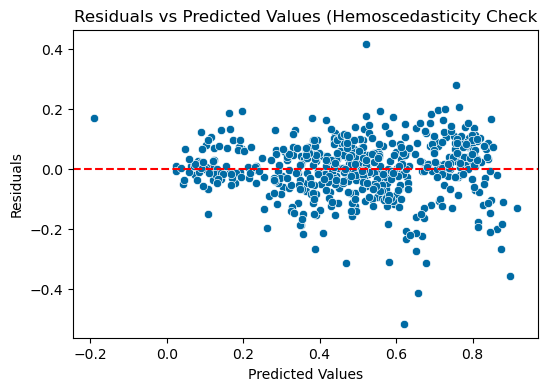

In [564]:
# Plot residuals vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Hemoscedasticity Check")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Normality of Residuals</h4>
</di>


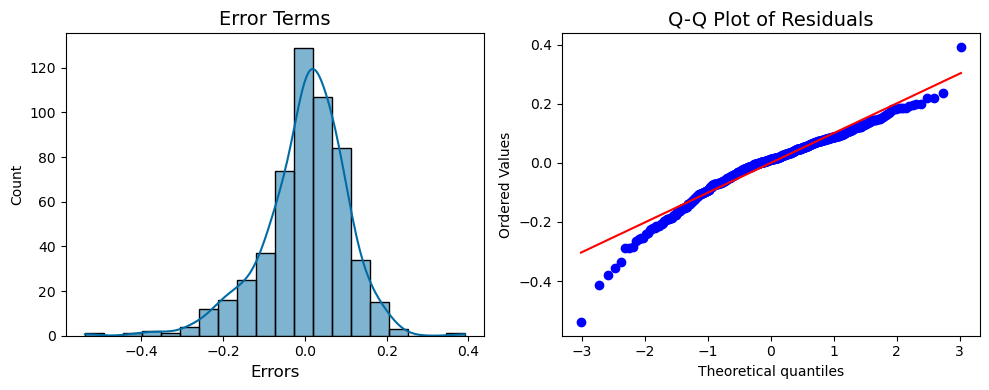

In [567]:
# Calculating the residual
residual_train = eval(f'y{model}_train') - eval(f'y{model}_train_pred')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

# Plot 1: Histogram of error terms
sns.histplot(residual_train, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Error Terms', fontsize=14)    
axes[0].set_xlabel('Errors', fontsize=12) 

#plot 2: Q-Q Plot
stats.probplot(residual_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals', fontsize=14) 

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Validating homoscedasticity on Training Set</h4>
</div>

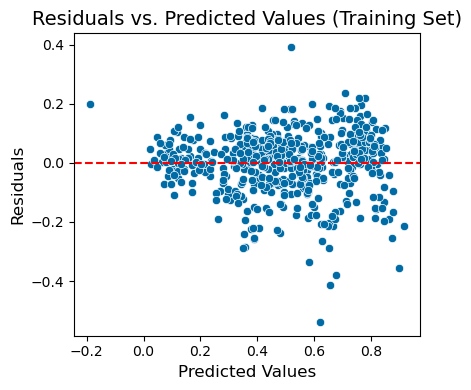

In [570]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

# Plot 1: Residuals vs. predicted values
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train, ax=axes[0])
axes[0].set_title('Residuals vs. Predicted Values (Training Set)', fontsize=14)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].axhline(y=0, color='r', linestyle='--')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Checking Independence of Reiduals</h4>
</di>


<Figure size 500x400 with 0 Axes>

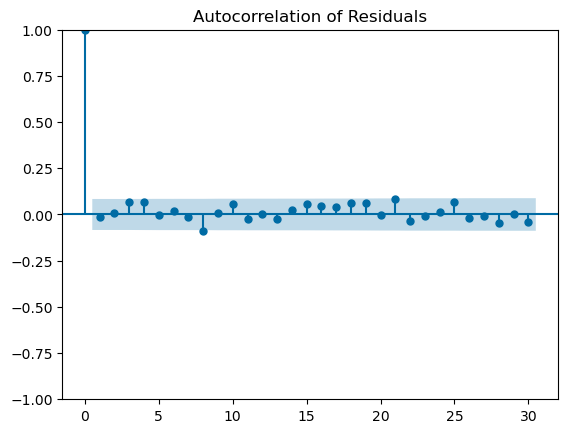

In [573]:
# Autocorrelation plot of residuals
plt.figure(figsize=(5, 4))
plot_acf(residual_train, lags=30)
plt.title("Autocorrelation of Residuals")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Making Prediction</h4>
</div>

In [576]:
# Making prediction on the test dataset using the model with last iteration
globals()[f'y{model}_test_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_test_sm'))

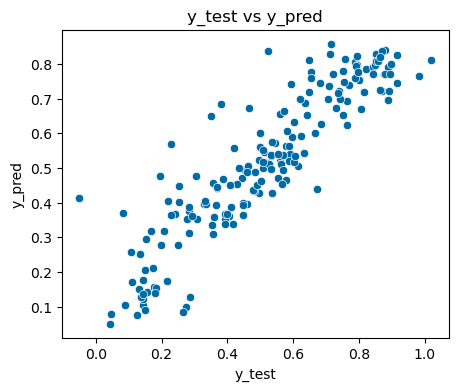

In [578]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test'), y=eval(f'y{model}_test_pred'))
fig.suptitle('y_test vs y_pred', fontsize = 10) 
plt.xlabel('y_test')                      
plt.ylabel('y_pred') 
plt.title('y_test vs y_pred')
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Performance Metrics</h4>
</div>

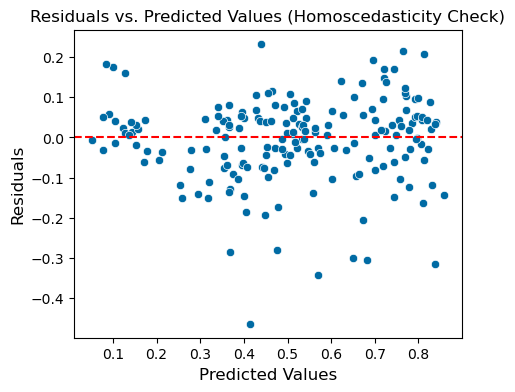

In [581]:
# Calculate residuals (errors):
residual_test = eval(f'y{model}_test') - eval(f'y{model}_test_pred')

# Plot residuals vs. predicted values
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test_pred'), y=residual_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values', fontdict={'fontsize': 12})
plt.ylabel('Residuals', fontdict={'fontsize': 12})
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

In [583]:
# Checking MSE, RMSE and R-Square values of both training and test set
# Training set:
mse_train = mean_squared_error(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))

# Test set:
mse_test = mean_squared_error(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))

print("Training Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, R-squared: {r2_train}")
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R-squared: {r2_test}")

Training Set Metrics:
MSE: 0.010503790266761612, RMSE: 0.10248800059890724, R-squared: 0.8120696234252011
Test Set Metrics:
MSE: 0.011215079596382339, RMSE: 0.10590127287423103, R-squared: 0.8071209012922499


In [585]:
# Checking the Breusch-Pagan test to statiscally check the homoscedasticity
bp_test = het_breuschpagan(residual_test, eval(f'X{model}_test_sm'))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 35.888698420392004, 'LM-Test p-value': 0.00017660010133100387, 'F-Statistic': 3.7924083601953873, 'F-Test p-value': 6.996802879684846e-05}


In [587]:
eval(f'res{iteration}').params.sort_values(ascending=False)

const                               0.423314
heat_index                          0.390379
year                                0.248243
month_Oct                           0.114499
month_Sep                           0.100177
month_Mar                           0.063548
month_May                           0.062624
weekday_Sun                        -0.040823
windspeed                          -0.158903
weather_situation_Light_snowrain   -0.179627
season_Spring                      -0.185949
humidity                           -0.241992
dtype: float64

## Observation:
This product the R-square lesser than the previous model and degree of freedom is also low. but i see there is some in-consistance in the coefficient where month_oct has a higher coeff than month_sep. if we analysis based on the EDA it should be other way around.

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">MODEL 3</h2>
</div>

## Approach
Since there is some inconsistance in the month variables in both model. so, I which to check if the EDA is matching with the model building using Month alone as the independent variable.

In [592]:
model = 3

In [594]:
# selecting month and cnt in this model
globals()[f'model{model}_df'] = df[['month','cnt']]

In [596]:
# create dummy for month
# Jan
globals()[f'model{model}_df']= create_dummies(eval(f'model{model}_df'), "month")

Percentage of each category in 'month':
month
Jan     8.504801
May     8.504801
July    8.504801
Aug     8.504801
Oct     8.504801
Dec     8.504801
Mar     8.367627
Apr     8.230453
June    8.230453
Sep     8.230453
Nov     8.230453
Feb     7.681756
Name: proportion, dtype: float64



Enter the category to drop from 'month':  Jan



Dummy variables created for 'month', excluding 'Jan'.


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Model Building and Evaluation</h3>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Train-Test Split</h4>
</div>

In [600]:
globals()[f'df_train{model}'],globals()[f'df_test{model}'] = train_test_split(eval(f'model{model}_df'), test_size=0.25, random_state=120)

In [602]:
print("Training dataset shape:", eval(f'df_train{model}').shape)
print("Testing dataset shape:", eval(f'df_test{model}').shape)

Training dataset shape: (546, 12)
Testing dataset shape: (183, 12)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Scaling</h4>
</div>

In [605]:
globals()[f'scaler{model}'] = MinMaxScaler()

globals()[f'df{model}_train_scale'] = eval(f'scaler{model}').fit_transform(eval(f'df_train{model}'))
# Use the same scaler fitted on the training data 
globals()[f'df{model}_test_scale']  = eval(f'scaler{model}').transform(eval(f'df_test{model}'))

In [607]:
# converting Array to dataframe
globals()[f'df{model}_train'] = pd.DataFrame(eval(f'df{model}_train_scale'),columns=eval(f'model{model}_df').columns)
globals()[f'df{model}_test'] = pd.DataFrame(eval(f'df{model}_test_scale'),columns=eval(f'model{model}_df').columns)

In [609]:
# Splitting the dependent variable and independent variable
# Train dataset
globals()[f'X{model}_train'] = eval(f'df{model}_train').drop('cnt',axis=1)
globals()[f'y{model}_train'] = eval(f'df{model}_train')['cnt']

# Test Dataset
globals()[f'X{model}_test'] = eval(f'df{model}_test').drop('cnt',axis=1)
globals()[f'y{model}_test'] = eval(f'df{model}_test')['cnt']

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Selection</h4>
</div>

In [612]:
len(eval(f'X{model}_train').columns)

11

In [614]:
# Considering 18 columns 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=18) #8-25

selector = selector.fit(eval(f'X{model}_train'), eval(f'y{model}_train'))

In [616]:
pd.DataFrame({
    'Feature': eval(f'X{model}_train').columns, 
    'Selected': selector.support_,
    'Rank': selector.ranking_
}).sort_values(by='Rank')

Feature  Selected  Rank
0    month_Apr      True     1
1    month_Aug      True     1
2    month_Dec      True     1
3    month_Feb      True     1
4   month_July      True     1
5   month_June      True     1
6    month_Mar      True     1
7    month_May      True     1
8    month_Nov      True     1
9    month_Oct      True     1
10   month_Sep      True     1

In [618]:
# Selecting the columns which VIF selected for further model building.
selected_feature = eval(f'X{model}_train').columns[selector.support_]
print(selected_feature)

Index(['month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep'],
      dtype='object')


In [620]:
# Selecting the feature based on RFE in training and testing dataset
globals()[f'X{model}_train'] = eval(f'X{model}_train')[selected_feature]
globals()[f'X{model}_test'] = eval(f'X{model}_test')[selected_feature]

In [622]:
print(eval(f'X{model}_train').shape)
print(eval(f'X{model}_test').shape)

(546, 11)
(183, 11)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Modeling</h4>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 1</b></h5>
</div>

In [626]:
iteration = 1

In [628]:
# Adding interseption (beta0) to the model 
globals()[f'X{model}_train_sm'] = sm.add_constant(eval(f'X{model}_train'))
globals()[f'X{model}_test_sm'] = sm.add_constant(eval(f'X{model}_test'))

In [630]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     30.14
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           2.24e-49
Time:                        17:04:18   Log-Likelihood:                 144.54
No. Observations:                 546   AIC:                            -265.1
Df Residuals:                     534   BIC:                            -213.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2134      0.026      8.115      0.000       0.162       0.265
month_Apr      0.2817      0.039      7.292      0.000       0.206       0.358
month_Aug      0.4303      0.037     11.514      0.000       0.357       0.504
month_Dec      0.1592      0.038      4.146      0.000       0.084       0.235
month_Feb      0.0548      0.040      1.373      0.170      -0.024       0.133
month_July     0.4272      0.038     11.313      0.000       0.353       0.501
month_June     0.4263      0.039     11.033      0.000       0.350       0.502
month_Mar      0.2176      0.038      5.699      0.000       0.143       0.293
month_May      0.3829      0.038     10.084      0.000       0.308       0.457
month_Nov      0.2498      0.038      6.504      0.000       0.174       0.325
month_Oct      0.3933      0.039     10.180      0.000       0.317       0.469
month_Sep      0.4066      0.039     10.460      0.000       0.330       0.483
==============================================================================
Omnibus:                       17.178   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.710
Skew:                           0.063   Prob(JB):                       0.0128
Kurtosis:                       2.394   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [632]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0        const  10.705882
2    month_Aug   1.799038
5   month_July   1.770524
8    month_May   1.756159
7    month_Mar   1.741722
3    month_Dec   1.727214
9    month_Nov   1.727214
6   month_June   1.712634
1    month_Apr   1.712634
10   month_Oct   1.712634
11   month_Sep   1.697982
4    month_Feb   1.638655

In [634]:
# Dropping the column with high VIF and re-assigning it to the global variables
globals()[f'X{model}_train_sm'].drop("month_Feb", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("month_Feb", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 2</b></h5>
</div>

In [637]:
iteration = 2

In [639]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     32.91
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           9.50e-50
Time:                        17:04:25   Log-Likelihood:                 143.58
No. Observations:                 546   AIC:                            -265.2
Df Residuals:                     535   BIC:                            -217.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2371      0.020     11.970      0.000       0.198       0.276
month_Apr      0.2580      0.035      7.462      0.000       0.190       0.326
month_Aug      0.4065      0.033     12.264      0.000       0.341       0.472
month_Dec      0.1355      0.034      3.948      0.000       0.068       0.203
month_July     0.4034      0.034     12.011      0.000       0.337       0.469
month_June     0.4025      0.035     11.643      0.000       0.335       0.470
month_Mar      0.1938      0.034      5.690      0.000       0.127       0.261
month_May      0.3591      0.034     10.618      0.000       0.293       0.426
month_Nov      0.2260      0.034      6.587      0.000       0.159       0.293
month_Oct      0.3695      0.035     10.690      0.000       0.302       0.437
month_Sep      0.3829      0.035     10.990      0.000       0.314       0.451
==============================================================================
Omnibus:                       17.658   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.850
Skew:                           0.062   Prob(JB):                       0.0120
Kurtosis:                       2.389   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [641]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature       VIF
0        const  6.066667
2    month_Aug  1.413105
4   month_July  1.398535
7    month_May  1.391188
6    month_Mar  1.383801
8    month_Nov  1.376374
3    month_Dec  1.376374
1    month_Apr  1.368905
9    month_Oct  1.368905
5   month_June  1.368905
10   month_Sep  1.361396

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Residual Analysis (Linearity)</h4>
</div>

In [644]:
# Predicting the known Y values in the training dataset using the model.
globals()[f'y{model}_train_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_train_sm'))

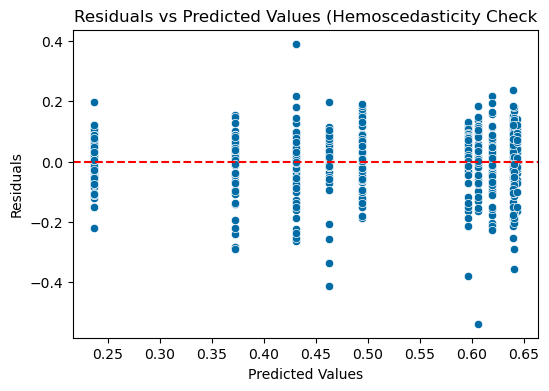

In [646]:
# Plot residuals vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Hemoscedasticity Check")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Normality of Residuals</h4>
</di>


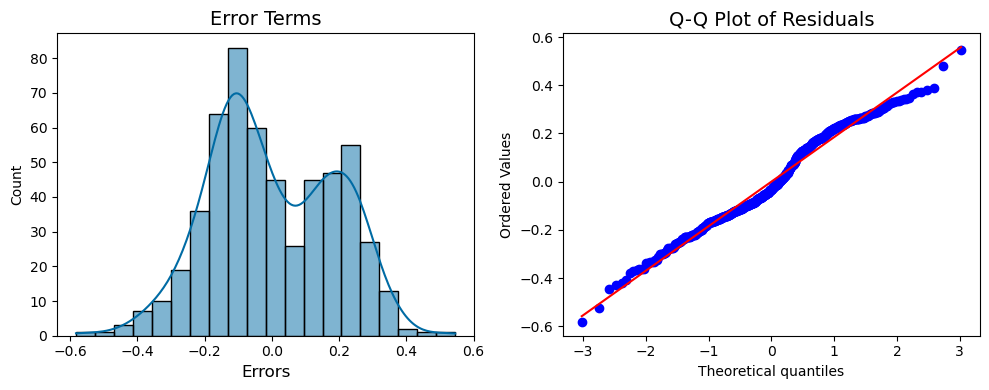

In [649]:
# Calculating the residual
residual_train = eval(f'y{model}_train') - eval(f'y{model}_train_pred')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

# Plot 1: Histogram of error terms
sns.histplot(residual_train, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Error Terms', fontsize=14)    
axes[0].set_xlabel('Errors', fontsize=12) 

#plot 2: Q-Q Plot
stats.probplot(residual_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals', fontsize=14) 

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Validating homoscedasticity on Training Set</h4>
</di>


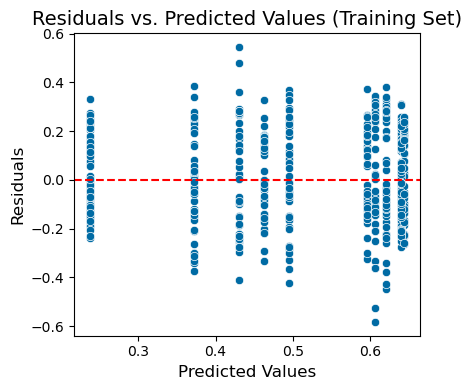

In [652]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

# Plot 1: Residuals vs. predicted values
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train, ax=axes[0])
axes[0].set_title('Residuals vs. Predicted Values (Training Set)', fontsize=14)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].axhline(y=0, color='r', linestyle='--')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Checking Independence of Reiduals</h4>
</div>

<Figure size 500x400 with 0 Axes>

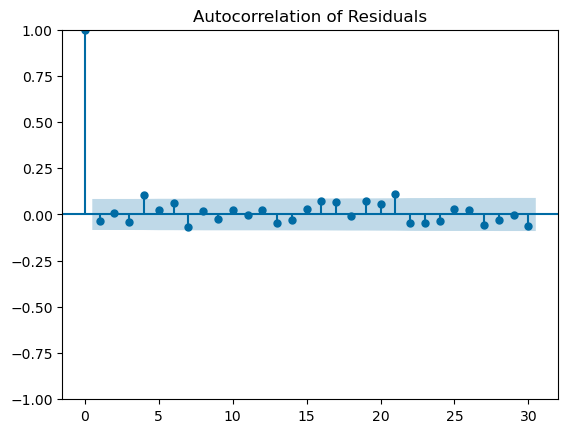

In [655]:
# Autocorrelation plot of residuals
plt.figure(figsize=(5, 4))
plot_acf(residual_train, lags=30)
plt.title("Autocorrelation of Residuals")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Making Prediction</h4>
</div>

In [658]:
# Making prediction on the test dataset using the model with last iteration
globals()[f'y{model}_test_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_test_sm'))

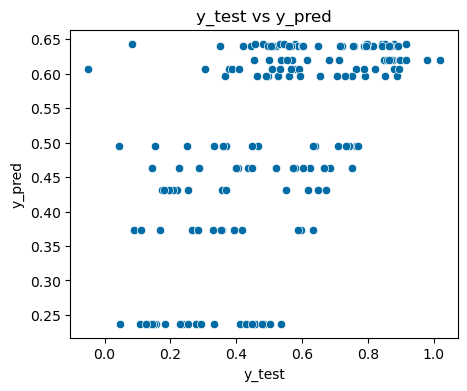

In [660]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test'), y=eval(f'y{model}_test_pred'))
fig.suptitle('y_test vs y_pred', fontsize = 10) 
plt.xlabel('y_test')                      
plt.ylabel('y_pred') 
plt.title('y_test vs y_pred')
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Performance Metrics</h4>
</div>

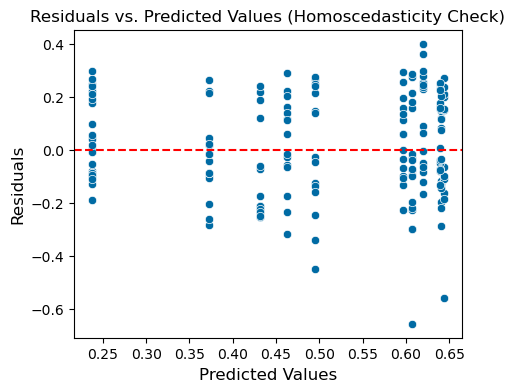

In [663]:
# Calculate residuals (errors):
residual_test = eval(f'y{model}_test') - eval(f'y{model}_test_pred')

# Plot residuals vs. predicted values
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test_pred'), y=residual_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values', fontdict={'fontsize': 12})
plt.ylabel('Residuals', fontdict={'fontsize': 12})
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

In [665]:
# Checking MSE, RMSE and R-Square values of both training and test set
# Training set:
mse_train = mean_squared_error(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))

# Test set:
mse_test = mean_squared_error(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))

print("Training Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, R-squared: {r2_train}")
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R-squared: {r2_test}")

Training Set Metrics:
MSE: 0.034603462378035195, RMSE: 0.1860200590743783, R-squared: 0.3808861800987793
Test Set Metrics:
MSE: 0.03569388028079789, RMSE: 0.18892824108850928, R-squared: 0.3861297729742903


In [667]:
# Checking the Breusch-Pagan test to statiscally check the homoscedasticity
bp_test = het_breuschpagan(residual_test, eval(f'X{model}_test_sm'))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 15.932276910108044, 'LM-Test p-value': 0.10158753236851342, 'F-Statistic': 1.64026394677332, 'F-Test p-value': 0.09887751721556162}


In [669]:
eval(f'res{iteration}').params.sort_values(ascending=False)

month_Aug     0.406506
month_July    0.403412
month_June    0.402497
month_Sep     0.382857
month_Oct     0.369533
month_May     0.359103
month_Apr     0.257950
const         0.237120
month_Nov     0.225998
month_Mar     0.193817
month_Dec     0.135463
dtype: float64

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">MODEL 4</h2>
</div>

In [672]:
model = 4

In [674]:
model4_df = df.copy()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Feature Engineering</h3>
</div>

In [677]:
# Calculate previous_day_diff
model4_df['previous_day_diff'] = model4_df['cnt'].diff()

In [679]:
model4_df['previous_day_diff'].iloc[0] = 0

In [681]:
model4_df

season  year month  holiday weekday  workingday weather_situation  \
0    Spring     0   Jan        0     Sat           0             Misty   
1    Spring     0   Jan        0     Sun           0             Misty   
2    Spring     0   Jan        0     Mon           1             Clear   
3    Spring     0   Jan        0     Tue           1             Clear   
4    Spring     0   Jan        0     Wed           1             Clear   
..      ...   ...   ...      ...     ...         ...               ...   
725  Spring     1   Dec        0    Thur           1             Misty   
726  Spring     1   Dec        0     Fri           1             Misty   
727  Spring     1   Dec        0     Sat           0             Misty   
728  Spring     1   Dec        0     Sun           0             Clear   
729  Spring     1   Dec        0     Mon           1             Misty   

          temp  feels_like_temp  humidity  windspeed   cnt  previous_day_diff  
0    14.110847         18.18125   80.5833  10.749882   985                0.0  
1    14.902598         17.68695   69.6087  16.652113   801             -184.0  
2     8.050924          9.47025   43.7273  16.636703  1349              548.0  
3     8.200000         10.60610   59.0435  10.739832  1562              213.0  
4     9.305237         11.46350   43.6957  12.522300  1600               38.0  
..         ...              ...       ...        ...   ...                ...  
725  10.420847         11.33210   65.2917  23.458911  2114             1673.0  
726  10.386653         12.75230   59.0000  10.416557  3095              981.0  
727  10.386653         12.12000   75.2917   8.333661  1341            -1754.0  
728  10.489153         11.58500   48.3333  23.500518  1796              455.0  
729   8.849153         11.17435   57.7500  10.374682  2729              933.0  

[729 rows x 13 columns]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Dummy Variables (One-hot encoding)</h3>
</div>

In [684]:
model4_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temp', 'feels_like_temp', 'humidity', 'windspeed',
       'cnt', 'previous_day_diff'],
      dtype='object')

In [686]:
dummy_df = model4_df.copy()

In [688]:
dummy_df.head()

season  year month  holiday weekday  workingday weather_situation  \
0  Spring     0   Jan        0     Sat           0             Misty   
1  Spring     0   Jan        0     Sun           0             Misty   
2  Spring     0   Jan        0     Mon           1             Clear   
3  Spring     0   Jan        0     Tue           1             Clear   
4  Spring     0   Jan        0     Wed           1             Clear   

        temp  feels_like_temp  humidity  windspeed   cnt  previous_day_diff  
0  14.110847         18.18125   80.5833  10.749882   985                0.0  
1  14.902598         17.68695   69.6087  16.652113   801             -184.0  
2   8.050924          9.47025   43.7273  16.636703  1349              548.0  
3   8.200000         10.60610   59.0435  10.739832  1562              213.0  
4   9.305237         11.46350   43.6957  12.522300  1600               38.0

In [690]:
# Creating a dummies for weather_situation and choosing which catogory to drop
# Clear
dummy_df = create_dummies(dummy_df, "weather_situation")

Percentage of each category in 'weather_situation':
weather_situation
Clear             63.511660
Misty             33.744856
Light_snowrain     2.743484
Name: proportion, dtype: float64



Enter the category to drop from 'weather_situation':  Clear



Dummy variables created for 'weather_situation', excluding 'Clear'.


In [692]:
# Creating a dummies for season and choosing which catogory to drop
# Fall
dummy_df = create_dummies(dummy_df, "season")

Percentage of each category in 'season':
season
Fall      25.788752
Summer    25.240055
Spring    24.554184
Winter    24.417010
Name: proportion, dtype: float64



Enter the category to drop from 'season':  Fall



Dummy variables created for 'season', excluding 'Fall'.


In [694]:
# Creating a dummies for month and choosing which catogory to drop
# Jan
dummy_df = create_dummies(dummy_df, "month")

Percentage of each category in 'month':
month
Jan     8.504801
May     8.504801
July    8.504801
Aug     8.504801
Oct     8.504801
Dec     8.504801
Mar     8.367627
Apr     8.230453
June    8.230453
Sep     8.230453
Nov     8.230453
Feb     7.681756
Name: proportion, dtype: float64



Enter the category to drop from 'month':  Jan



Dummy variables created for 'month', excluding 'Jan'.


In [696]:
# Creating a dummies for weekday and choosing which catogory to drop
# Sat
dummy_df = create_dummies(dummy_df, "weekday")

Percentage of each category in 'weekday':
weekday
Sat     14.403292
Sun     14.403292
Mon     14.403292
Tue     14.266118
Fri     14.266118
Wed     14.128944
Thur    14.128944
Name: proportion, dtype: float64



Enter the category to drop from 'weekday':  Sat



Dummy variables created for 'weekday', excluding 'Sat'.


In [698]:
dummy_df.head()

year  holiday  workingday       temp  feels_like_temp  humidity  windspeed  \
0     0        0           0  14.110847         18.18125   80.5833  10.749882   
1     0        0           0  14.902598         17.68695   69.6087  16.652113   
2     0        0           1   8.050924          9.47025   43.7273  16.636703   
3     0        0           1   8.200000         10.60610   59.0435  10.739832   
4     0        0           1   9.305237         11.46350   43.6957  12.522300   

    cnt  previous_day_diff  weather_situation_Light_snowrain  \
0   985                0.0                                 0   
1   801             -184.0                                 0   
2  1349              548.0                                 0   
3  1562              213.0                                 0   
4  1600               38.0                                 0   

   weather_situation_Misty  season_Spring  season_Summer  season_Winter  \
0                        1              1              0              0   
1                        1              1              0              0   
2                        0              1              0              0   
3                        0              1              0              0   
4                        0              1              0              0   

   month_Apr  month_Aug  month_Dec  month_Feb  month_July  month_June  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Fri  \
0          0          0          0          0          0            0   
1          0          0          0          0          0            0   
2          0          0          0          0          0            0   
3          0          0          0          0          0            0   
4          0          0          0          0          0            0   

   weekday_Mon  weekday_Sun  weekday_Thur  weekday_Tue  weekday_Wed  
0            0            0             0            0            0  
1            0            1             0            0            0  
2            1            0             0            0            0  
3            0            0             0            1            0  
4            0            0             0            0            1

In [700]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              729 non-null    int64  
 1   holiday                           729 non-null    int64  
 2   workingday                        729 non-null    int64  
 3   temp                              729 non-null    float64
 4   feels_like_temp                   729 non-null    float64
 5   humidity                          729 non-null    float64
 6   windspeed                         729 non-null    float64
 7   cnt                               729 non-null    int64  
 8   previous_day_diff                 729 non-null    float64
 9   weather_situation_Light_snowrain  729 non-null    int32  
 10  weather_situation_Misty           729 non-null    int32  
 11  season_Spring                     729 non-null    int32  
 12  season_Summer

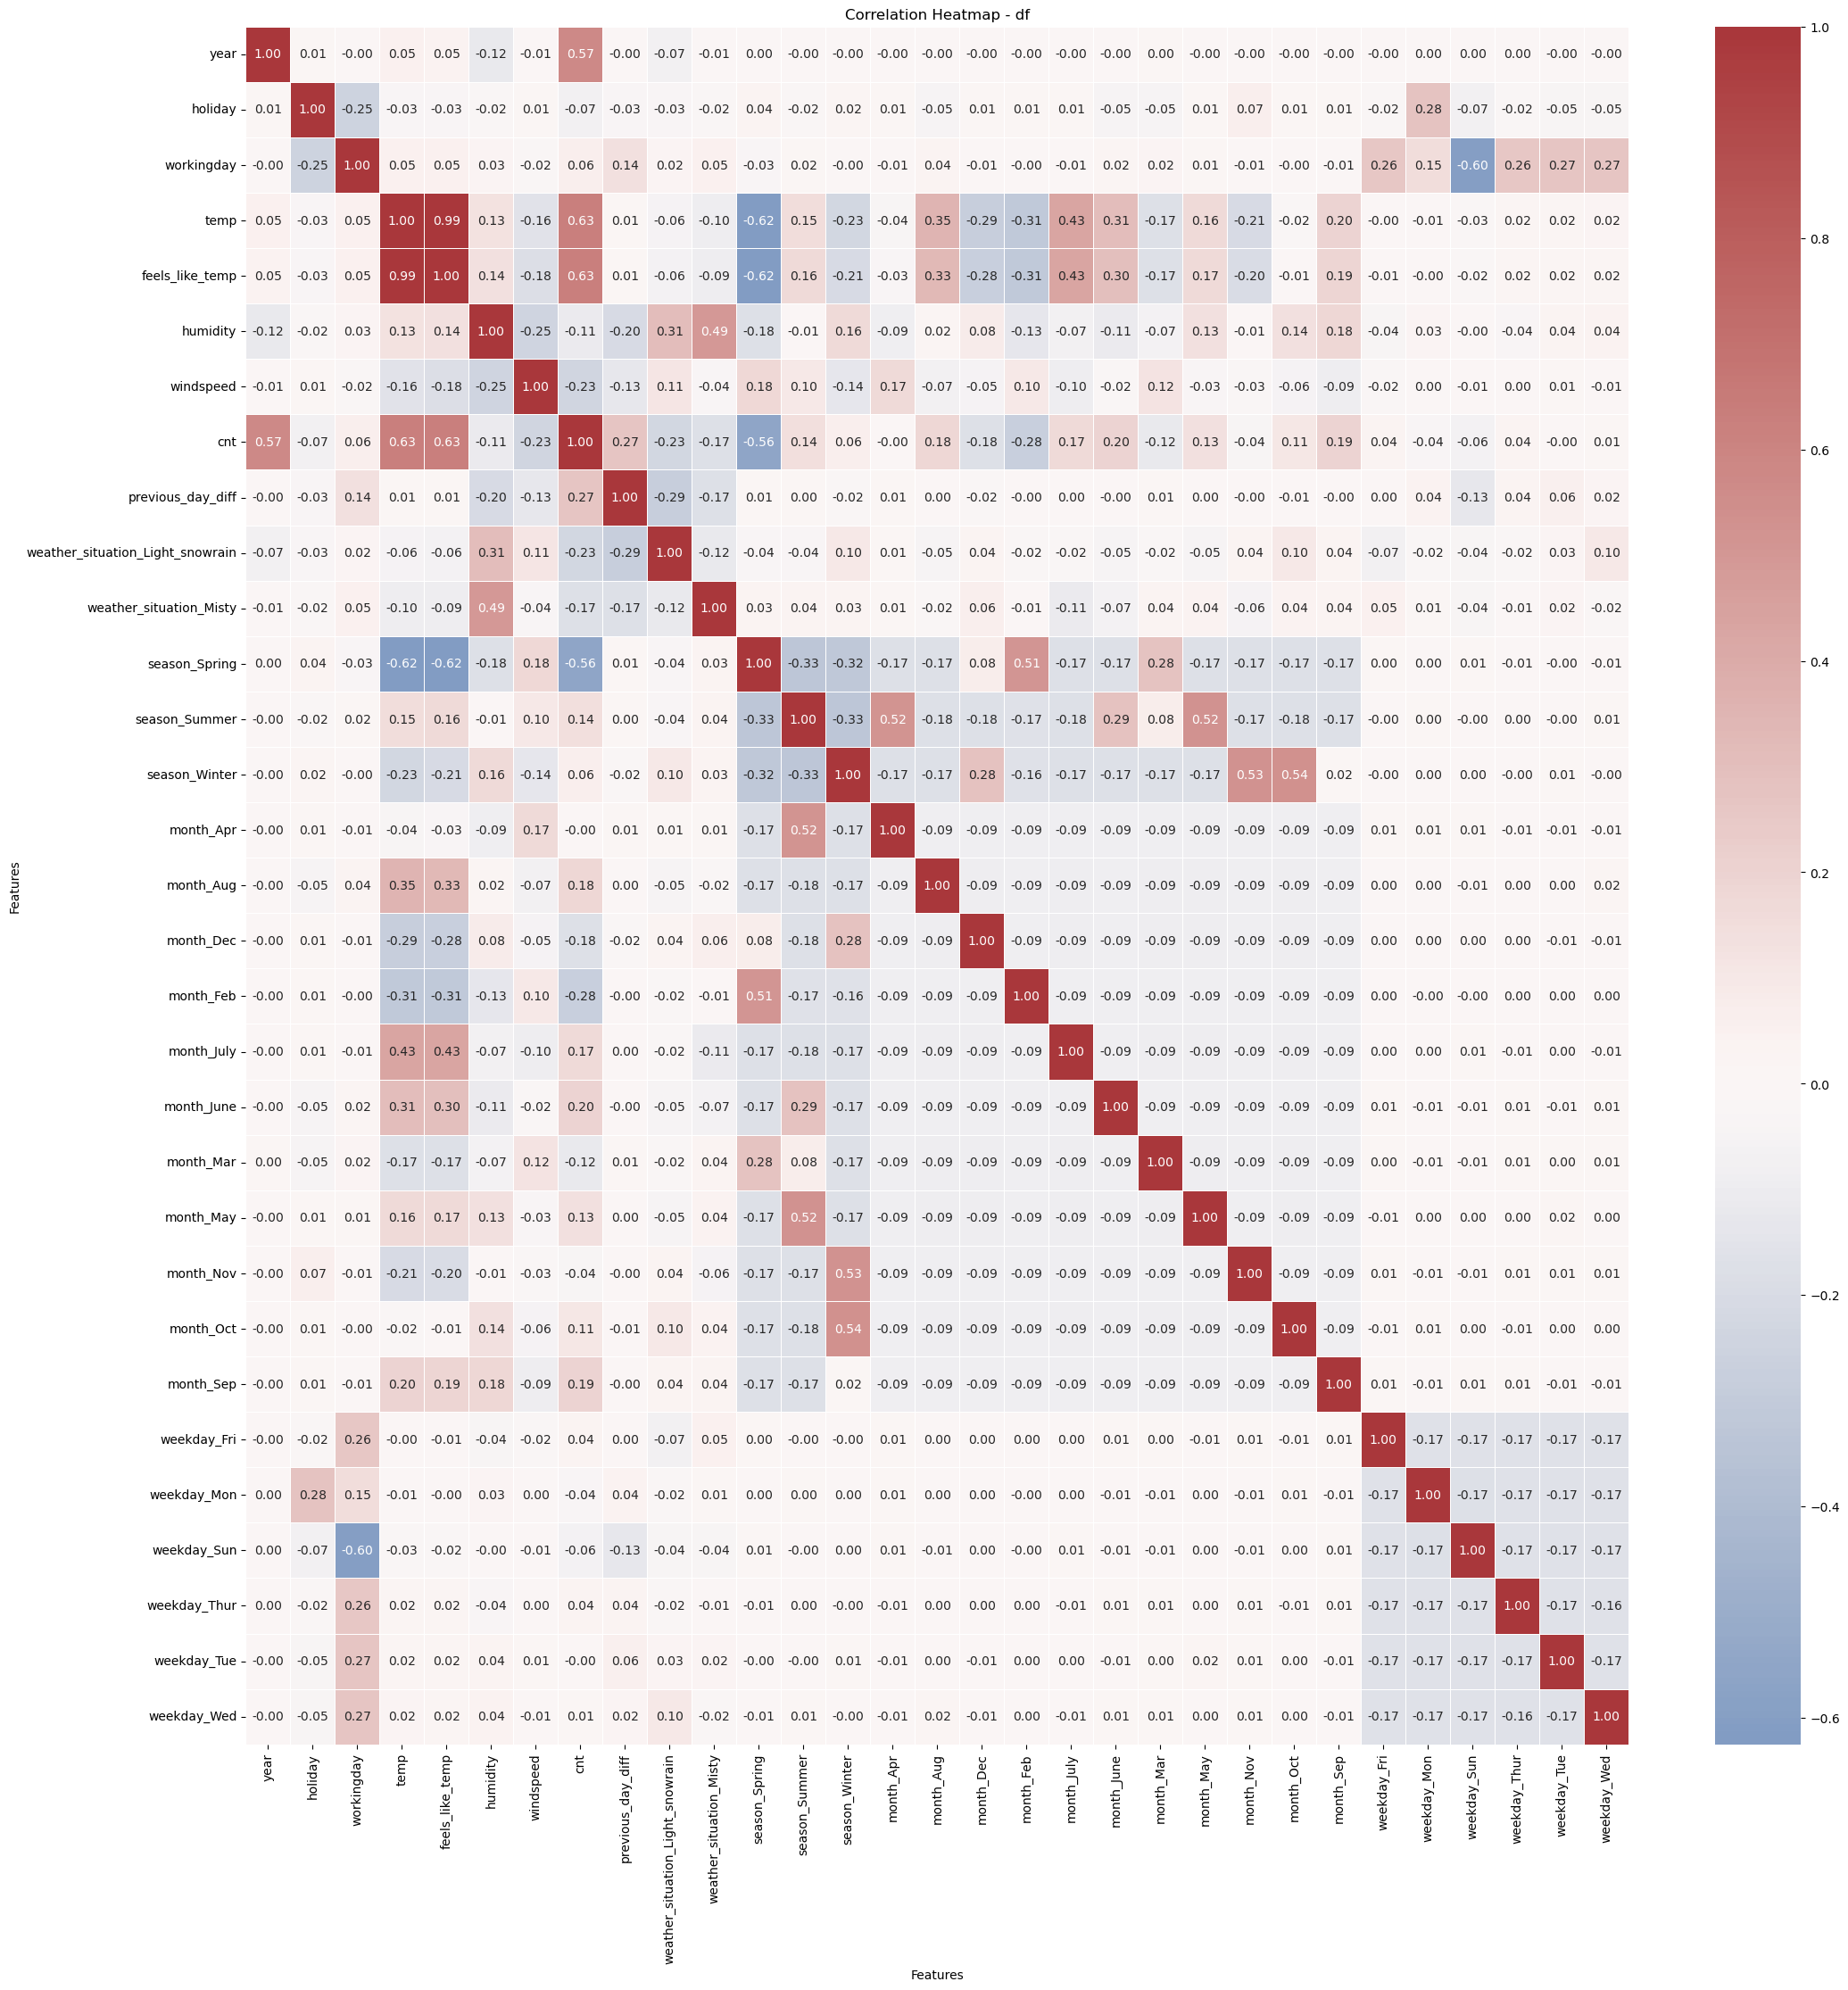

In [702]:
# Calculate the correlation matrix with all dummy variables
corr_matrix = dummy_df.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5, center=0)
# Set title and labels
plt.title('Correlation Heatmap - df')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

In [704]:
# Excluding few columns for this model
exclude_cols = ['feels_like_temp','holiday']
# Select columns not in `exclude_cols`
globals()[f'model{model}_df'] = dummy_df.loc[:, ~dummy_df.columns.isin(exclude_cols)]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Model Building and Evaluation</h3>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Train-Test Split</h4>
</div>

In [708]:
globals()[f'df_train{model}'],globals()[f'df_test{model}'] = train_test_split(eval(f'model{model}_df'), test_size=0.25, random_state=120)

In [710]:
print("Training dataset shape:", eval(f'df_train{model}').shape)
print("Testing dataset shape:", eval(f'df_test{model}').shape)

Training dataset shape: (546, 29)
Testing dataset shape: (183, 29)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Scaling</h4>
</div>

In [713]:
globals()[f'scaler{model}'] = MinMaxScaler()

globals()[f'df{model}_train_scale'] = eval(f'scaler{model}').fit_transform(eval(f'df_train{model}'))
# Use the same scaler fitted on the training data 
globals()[f'df{model}_test_scale']  = eval(f'scaler{model}').transform(eval(f'df_test{model}'))

In [715]:
# converting Array to dataframe
globals()[f'df{model}_train'] = pd.DataFrame(eval(f'df{model}_train_scale'),columns=eval(f'model{model}_df').columns)
globals()[f'df{model}_test'] = pd.DataFrame(eval(f'df{model}_test_scale'),columns=eval(f'model{model}_df').columns)

In [717]:
# Splitting the dependent variable and independent variable
# Train dataset
globals()[f'X{model}_train'] = eval(f'df{model}_train').drop('cnt',axis=1)
globals()[f'y{model}_train'] = eval(f'df{model}_train')['cnt']

# Test Dataset
globals()[f'X{model}_test'] = eval(f'df{model}_test').drop('cnt',axis=1)
globals()[f'y{model}_test'] = eval(f'df{model}_test')['cnt']

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Selection</h4>
</div>

In [720]:
len(eval(f'X{model}_train').columns)

28

In [722]:
# Considering 18 columns 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=18) #8-25

selector = selector.fit(eval(f'X{model}_train'), eval(f'y{model}_train'))

In [724]:
pd.DataFrame({
    'Feature': eval(f'X{model}_train').columns, 
    'Selected': selector.support_,
    'Rank': selector.ranking_
}).sort_values(by='Rank')

Feature  Selected  Rank
0                               year      True     1
25                      weekday_Thur      True     1
24                       weekday_Sun      True     1
23                       weekday_Mon      True     1
22                       weekday_Fri      True     1
21                         month_Sep      True     1
19                         month_Nov      True     1
26                       weekday_Tue      True     1
10                     season_Winter      True     1
13                         month_Dec      True     1
8                      season_Spring      True     1
1                         workingday      True     1
2                               temp      True     1
3                           humidity      True     1
4                          windspeed      True     1
5                  previous_day_diff      True     1
6   weather_situation_Light_snowrain      True     1
27                       weekday_Wed      True     1
18                         month_May     False     2
17                         month_Mar     False     3
7            weather_situation_Misty     False     4
11                         month_Apr     False     5
16                        month_June     False     6
12                         month_Aug     False     7
20                         month_Oct     False     8
14                         month_Feb     False     9
15                        month_July     False    10
9                      season_Summer     False    11

In [726]:
# Selecting the columns which VIF selected for further model building.
selected_feature = eval(f'X{model}_train').columns[selector.support_]
print(selected_feature)

Index(['year', 'workingday', 'temp', 'humidity', 'windspeed',
       'previous_day_diff', 'weather_situation_Light_snowrain',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov', 'month_Sep',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')


In [728]:
# Selecting the feature based on RFE in training and testing dataset
globals()[f'X{model}_train'] = eval(f'X{model}_train')[selected_feature]
globals()[f'X{model}_test'] = eval(f'X{model}_test')[selected_feature]

In [730]:
print(eval(f'X{model}_train').shape)
print(eval(f'X{model}_test').shape)

(546, 18)
(183, 18)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Modeling</h4>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 1</b></h5>
</div>

In [734]:
iteration = 1

In [736]:
# Adding interseption (beta0) to the model 
globals()[f'X{model}_train_sm'] = sm.add_constant(eval(f'X{model}_train'))
globals()[f'X{model}_test_sm'] = sm.add_constant(eval(f'X{model}_test'))

In [738]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     195.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.18e-219
Time:                        17:09:13   Log-Likelihood:                 568.52
No. Observations:                 546   AIC:                            -1099.
Df Residuals:                     527   BIC:                            -1017.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0496      0.037      1.332      0.183      -0.024       0.123
year                                 0.2479      0.008     32.831      0.000       0.233       0.263
workingday                           0.0654      0.022      2.909      0.004       0.021       0.110
temp                                 0.4544      0.027     16.861      0.000       0.401       0.507
humidity                            -0.1658      0.022     -7.515      0.000      -0.209      -0.122
windspeed                           -0.1013      0.022     -4.608      0.000      -0.144      -0.058
previous_day_diff                    0.4796      0.038     12.458      0.000       0.404       0.555
weather_situation_Light_snowrain    -0.1157      0.026     -4.524      0.000      -0.166      -0.065
season_Spring                       -0.1372      0.014     -9.757      0.000      -0.165      -0.110
season_Winter                        0.0960      0.013      7.277      0.000       0.070       0.122
month_Dec                           -0.0679      0.016     -4.327      0.000      -0.099      -0.037
month_Nov                           -0.0704      0.018     -4.000      0.000      -0.105      -0.036
month_Sep                            0.0477      0.014      3.292      0.001       0.019       0.076
weekday_Fri                         -0.0881      0.026     -3.355      0.001      -0.140      -0.037
weekday_Mon                         -0.1111      0.024     -4.597      0.000      -0.159      -0.064
weekday_Sun                         -0.0555      0.014     -3.871      0.000      -0.084      -0.027
weekday_Thur                        -0.0909      0.026     -3.472      0.001      -0.142      -0.039
weekday_Tue                         -0.1122      0.026     -4.249      0.000      -0.164      -0.060
weekday_Wed                         -0.1061      0.027     -3.984      0.000      -0.158      -0.054
==============================================================================
Omnibus:                      117.221   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.892
Skew:                          -0.996   Prob(JB):                     1.07e-81
Kurtosis:                       6.524   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [740]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature         VIF
0                              const  100.294265
2                         workingday    7.758507
16                      weekday_Thur    6.444656
13                       weekday_Fri    6.424992
17                       weekday_Tue    6.368672
18                       weekday_Wed    6.066983
14                       weekday_Mon    4.884442
3                               temp    2.757726
8                      season_Spring    2.657733
9                      season_Winter    2.281681
15                       weekday_Sun    1.897982
11                         month_Nov    1.694410
10                         month_Dec    1.344361
4                           humidity    1.305500
7   weather_situation_Light_snowrain    1.262005
6                  previous_day_diff    1.162745
5                          windspeed    1.156217
12                         month_Sep    1.099438
1                               year    1.028810

In [742]:
# Dropping the column with high VIF and re-assigning it to the global variables
globals()[f'X{model}_train_sm'].drop("workingday", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("workingday", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 2</b></h5>
</div>

In [745]:
iteration = 2

In [747]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          9.82e-219
Time:                        17:09:19   Log-Likelihood:                 564.17
No. Observations:                 546   AIC:                            -1092.
Df Residuals:                     528   BIC:                            -1015.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0459      0.038      1.223      0.222      -0.028       0.120
year                                 0.2478      0.008     32.595      0.000       0.233       0.263
temp                                 0.4531      0.027     16.695      0.000       0.400       0.506
humidity                            -0.1642      0.022     -7.390      0.000      -0.208      -0.121
windspeed                           -0.1014      0.022     -4.579      0.000      -0.145      -0.058
previous_day_diff                    0.4871      0.039     12.592      0.000       0.411       0.563
weather_situation_Light_snowrain    -0.1143      0.026     -4.440      0.000      -0.165      -0.064
season_Spring                       -0.1379      0.014     -9.739      0.000      -0.166      -0.110
season_Winter                        0.0970      0.013      7.300      0.000       0.071       0.123
month_Dec                           -0.0688      0.016     -4.356      0.000      -0.100      -0.038
month_Nov                           -0.0759      0.018     -4.306      0.000      -0.111      -0.041
month_Sep                            0.0461      0.015      3.160      0.002       0.017       0.075
weekday_Fri                         -0.0240      0.014     -1.669      0.096      -0.052       0.004
weekday_Mon                         -0.0554      0.015     -3.729      0.000      -0.085      -0.026
weekday_Sun                         -0.0553      0.014     -3.829      0.000      -0.084      -0.027
weekday_Thur                        -0.0270      0.014     -1.883      0.060      -0.055       0.001
weekday_Tue                         -0.0477      0.014     -3.302      0.001      -0.076      -0.019
weekday_Wed                         -0.0414      0.015     -2.804      0.005      -0.070      -0.012
==============================================================================
Omnibus:                      120.064   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.947
Skew:                          -1.026   Prob(JB):                     2.31e-82
Kurtosis:                       6.509   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [749]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature         VIF
0                              const  100.172260
2                               temp    2.756901
7                      season_Spring    2.656999
8                      season_Winter    2.280290
12                       weekday_Fri    1.903894
15                      weekday_Thur    1.902267
14                       weekday_Sun    1.897930
16                       weekday_Tue    1.881571
17                       weekday_Wed    1.842946
13                       weekday_Mon    1.824463
10                         month_Nov    1.674984
9                          month_Dec    1.343818
3                           humidity    1.304617
6   weather_situation_Light_snowrain    1.261567
5                  previous_day_diff    1.157526
4                          windspeed    1.156216
11                         month_Sep    1.097817
1                               year    1.028804

In [751]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Fri", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Fri", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 3</b></h5>
</div>

In [754]:
iteration = 3

In [756]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     214.9
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.63e-219
Time:                        17:09:22   Log-Likelihood:                 562.74
No. Observations:                 546   AIC:                            -1091.
Df Residuals:                     529   BIC:                            -1018.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0332      0.037      0.903      0.367      -0.039       0.105
year                                 0.2478      0.008     32.532      0.000       0.233       0.263
temp                                 0.4516      0.027     16.622      0.000       0.398       0.505
humidity                            -0.1640      0.022     -7.371      0.000      -0.208      -0.120
windspeed                           -0.1014      0.022     -4.572      0.000      -0.145      -0.058
previous_day_diff                    0.4879      0.039     12.593      0.000       0.412       0.564
weather_situation_Light_snowrain    -0.1114      0.026     -4.328      0.000      -0.162      -0.061
season_Spring                       -0.1381      0.014     -9.739      0.000      -0.166      -0.110
season_Winter                        0.0963      0.013      7.240      0.000       0.070       0.122
month_Dec                           -0.0686      0.016     -4.337      0.000      -0.100      -0.038
month_Nov                           -0.0765      0.018     -4.333      0.000      -0.111      -0.042
month_Sep                            0.0452      0.015      3.097      0.002       0.017       0.074
weekday_Mon                         -0.0422      0.013     -3.351      0.001      -0.067      -0.017
weekday_Sun                         -0.0421      0.012     -3.478      0.001      -0.066      -0.018
weekday_Thur                        -0.0138      0.012     -1.152      0.250      -0.037       0.010
weekday_Tue                         -0.0346      0.012     -2.849      0.005      -0.058      -0.011
weekday_Wed                         -0.0284      0.013     -2.261      0.024      -0.053      -0.004
==============================================================================
Omnibus:                      121.040   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.595
Skew:                          -1.037   Prob(JB):                     1.67e-82
Kurtosis:                       6.500   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [758]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  96.085950
2                               temp   2.754093
7                      season_Spring   2.656732
8                      season_Winter   2.278106
10                         month_Nov   1.674295
9                          month_Dec   1.343752
13                       weekday_Sun   1.328988
16                       weekday_Wed   1.326589
14                      weekday_Thur   1.324164
15                       weekday_Tue   1.321975
3                           humidity   1.304601
12                       weekday_Mon   1.302215
6   weather_situation_Light_snowrain   1.255661
5                  previous_day_diff   1.157340
4                          windspeed   1.156216
11                         month_Sep   1.096392
1                               year   1.028777

In [760]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Thur", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Thur", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 4</b></h5>
</div>

In [763]:
iteration = 4

In [765]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.30e-220
Time:                        17:09:28   Log-Likelihood:                 562.05
No. Observations:                 546   AIC:                            -1092.
Df Residuals:                     530   BIC:                            -1023.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0302      0.037      0.823      0.411      -0.042       0.102
year                                 0.2479      0.008     32.537      0.000       0.233       0.263
temp                                 0.4513      0.027     16.606      0.000       0.398       0.505
humidity                            -0.1645      0.022     -7.389      0.000      -0.208      -0.121
windspeed                           -0.1024      0.022     -4.622      0.000      -0.146      -0.059
previous_day_diff                    0.4857      0.039     12.548      0.000       0.410       0.562
weather_situation_Light_snowrain    -0.1118      0.026     -4.342      0.000      -0.162      -0.061
season_Spring                       -0.1379      0.014     -9.723      0.000      -0.166      -0.110
season_Winter                        0.0966      0.013      7.266      0.000       0.071       0.123
month_Dec                           -0.0692      0.016     -4.377      0.000      -0.100      -0.038
month_Nov                           -0.0770      0.018     -4.358      0.000      -0.112      -0.042
month_Sep                            0.0454      0.015      3.108      0.002       0.017       0.074
weekday_Mon                         -0.0372      0.012     -3.146      0.002      -0.060      -0.014
weekday_Sun                         -0.0373      0.011     -3.281      0.001      -0.060      -0.015
weekday_Tue                         -0.0296      0.011     -2.608      0.009      -0.052      -0.007
weekday_Wed                         -0.0234      0.012     -1.984      0.048      -0.047      -0.000
==============================================================================
Omnibus:                      119.599   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.600
Skew:                          -1.027   Prob(JB):                     5.53e-81
Kurtosis:                       6.468   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [767]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  95.611097
2                               temp   2.753772
7                      season_Spring   2.656346
8                      season_Winter   2.276900
10                         month_Nov   1.673517
9                          month_Dec   1.342203
3                           humidity   1.304243
6   weather_situation_Light_snowrain   1.255458
15                       weekday_Wed   1.168953
13                       weekday_Sun   1.167822
5                  previous_day_diff   1.154510
4                          windspeed   1.154234
14                       weekday_Tue   1.154138
12                       weekday_Mon   1.150436
11                         month_Sep   1.096284
1                               year   1.028636

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Residual Analysis (Linearity)</h4>
</div>

In [770]:
# Predicting the known Y values in the training dataset using the model.
globals()[f'y{model}_train_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_train_sm'))

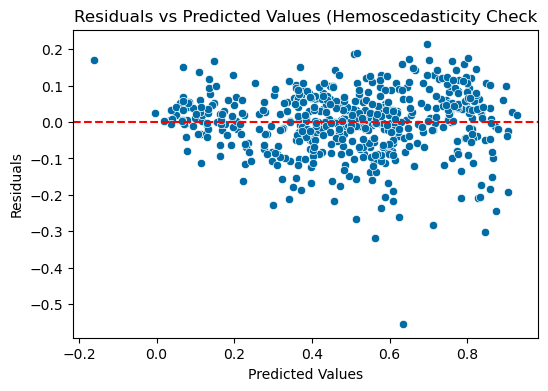

In [779]:
# Plot residuals vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Hemoscedasticity Check")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Normality of Residuals</h4>
</div>

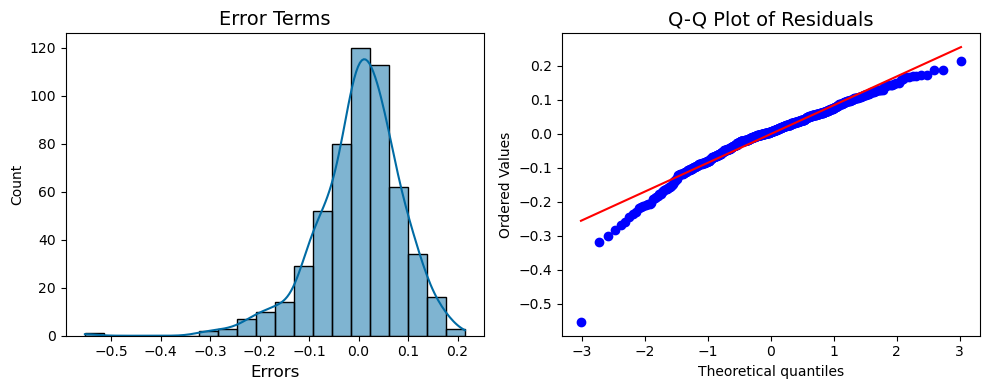

In [782]:
# Calculating the residual
residual_train = eval(f'y{model}_train') - eval(f'y{model}_train_pred')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

# Plot 1: Histogram of error terms
sns.histplot(residual_train, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Error Terms', fontsize=14)    
axes[0].set_xlabel('Errors', fontsize=12) 

#plot 2: Q-Q Plot
stats.probplot(residual_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals', fontsize=14) 

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Validating homoscedasticity on Training Set</h4>
</di>


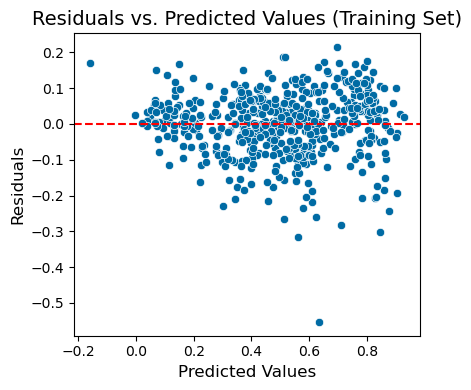

In [785]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

# Plot 1: Residuals vs. predicted values
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train, ax=axes[0])
axes[0].set_title('Residuals vs. Predicted Values (Training Set)', fontsize=14)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].axhline(y=0, color='r', linestyle='--')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Checking Independence of Reiduals</h4>
</div>

<Figure size 500x400 with 0 Axes>

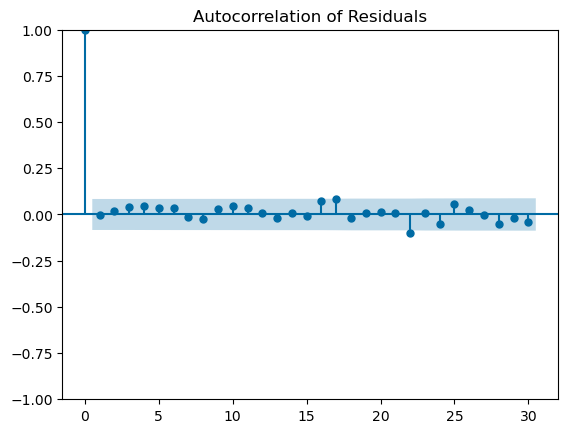

In [788]:
# Autocorrelation plot of residuals
plt.figure(figsize=(5, 4))
plot_acf(residual_train, lags=30)
plt.title("Autocorrelation of Residuals")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Making Prediction</h4>
</div>

In [791]:
# Making prediction on the test dataset using the model with last iteration
globals()[f'y{model}_test_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_test_sm'))

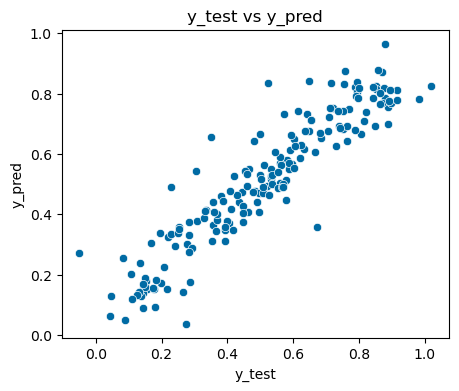

In [793]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test'), y=eval(f'y{model}_test_pred'))
fig.suptitle('y_test vs y_pred', fontsize = 10) 
plt.xlabel('y_test')                      
plt.ylabel('y_pred') 
plt.title('y_test vs y_pred')
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Performance Metrics</h4>
</div>

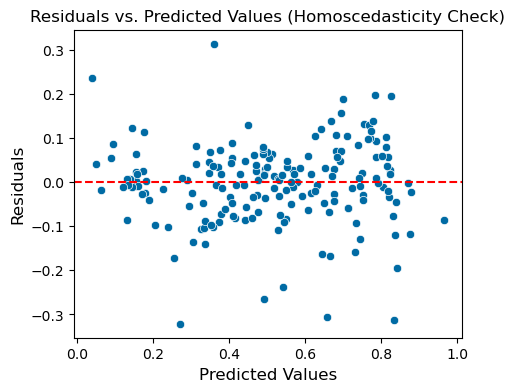

In [796]:
# Calculate residuals (errors):
residual_test = eval(f'y{model}_test') - eval(f'y{model}_test_pred')

# Plot residuals vs. predicted values
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test_pred'), y=residual_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values', fontdict={'fontsize': 12})
plt.ylabel('Residuals', fontdict={'fontsize': 12})
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

In [798]:
# Checking MSE, RMSE and R-Square values of both training and test set
# Training set:
mse_train = mean_squared_error(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))

# Test set:
mse_test = mean_squared_error(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))

print("Training Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, R-squared: {r2_train}")
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R-squared: {r2_test}")

Training Set Metrics:
MSE: 0.007471367022284504, RMSE: 0.08643706972291751, R-squared: 0.8663247473181551
Test Set Metrics:
MSE: 0.00840107263390177, RMSE: 0.0916573654099973, R-squared: 0.8555167349567444


In [800]:
# Checking the Breusch-Pagan test to statiscally check the homoscedasticity
bp_test = het_breuschpagan(residual_test, eval(f'X{model}_test_sm'))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 29.62221425798529, 'LM-Test p-value': 0.013359076560435897, 'F-Statistic': 2.1502069795184777, 'F-Test p-value': 0.009900124948410347}


In [802]:
eval(f'res{iteration}').params.sort_values(ascending=False)

previous_day_diff                   0.485728
temp                                0.451279
year                                0.247884
season_Winter                       0.096648
month_Sep                           0.045356
const                               0.030231
weekday_Wed                        -0.023402
weekday_Tue                        -0.029601
weekday_Mon                        -0.037221
weekday_Sun                        -0.037265
month_Dec                          -0.069238
month_Nov                          -0.076966
windspeed                          -0.102430
weather_situation_Light_snowrain   -0.111753
season_Spring                      -0.137918
humidity                           -0.164472
dtype: float64

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">MODEL 5</h2>
</div>

In [805]:
model = 5

In [807]:
model5_df = df.copy()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Feature Engineering</h3>
</div>

In [810]:
# Applying the heat_index function to create a variable
model5_df['heat_index'] = model5_df.apply(lambda x: heat_index(x['temp'], x['humidity']), axis=1)

In [812]:
# Calculate previous_day_diff
model5_df['previous_day_diff'] = model5_df['cnt'].diff()

In [814]:
model5_df['previous_day_diff'].iloc[0] = 0

In [816]:
model5_df

season  year month  holiday weekday  workingday weather_situation  \
0    Spring     0   Jan        0     Sat           0             Misty   
1    Spring     0   Jan        0     Sun           0             Misty   
2    Spring     0   Jan        0     Mon           1             Clear   
3    Spring     0   Jan        0     Tue           1             Clear   
4    Spring     0   Jan        0     Wed           1             Clear   
..      ...   ...   ...      ...     ...         ...               ...   
725  Spring     1   Dec        0    Thur           1             Misty   
726  Spring     1   Dec        0     Fri           1             Misty   
727  Spring     1   Dec        0     Sat           0             Misty   
728  Spring     1   Dec        0     Sun           0             Clear   
729  Spring     1   Dec        0     Mon           1             Misty   

          temp  feels_like_temp  humidity  windspeed   cnt  heat_index  \
0    14.110847         18.18125   80.5833  10.749882   985   57.399525   
1    14.902598         17.68695   69.6087  16.652113   801   58.824676   
2     8.050924          9.47025   43.7273  16.636703  1349   46.491663   
3     8.200000         10.60610   59.0435  10.739832  1562   46.760000   
4     9.305237         11.46350   43.6957  12.522300  1600   48.749427   
..         ...              ...       ...        ...   ...         ...   
725  10.420847         11.33210   65.2917  23.458911  2114   50.757525   
726  10.386653         12.75230   59.0000  10.416557  3095   50.695975   
727  10.386653         12.12000   75.2917   8.333661  1341   50.695975   
728  10.489153         11.58500   48.3333  23.500518  1796   50.880475   
729   8.849153         11.17435   57.7500  10.374682  2729   47.928475   

     previous_day_diff  
0                  0.0  
1               -184.0  
2                548.0  
3                213.0  
4                 38.0  
..                 ...  
725             1673.0  
726              981.0  
727            -1754.0  
728              455.0  
729              933.0  

[729 rows x 14 columns]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Dummy Variables (One-hot encoding)</h3>
</div>

In [819]:
model5_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temp', 'feels_like_temp', 'humidity', 'windspeed',
       'cnt', 'heat_index', 'previous_day_diff'],
      dtype='object')

In [821]:
dummy_df = model5_df.copy()

In [823]:
dummy_df.head()

season  year month  holiday weekday  workingday weather_situation  \
0  Spring     0   Jan        0     Sat           0             Misty   
1  Spring     0   Jan        0     Sun           0             Misty   
2  Spring     0   Jan        0     Mon           1             Clear   
3  Spring     0   Jan        0     Tue           1             Clear   
4  Spring     0   Jan        0     Wed           1             Clear   

        temp  feels_like_temp  humidity  windspeed   cnt  heat_index  \
0  14.110847         18.18125   80.5833  10.749882   985   57.399525   
1  14.902598         17.68695   69.6087  16.652113   801   58.824676   
2   8.050924          9.47025   43.7273  16.636703  1349   46.491663   
3   8.200000         10.60610   59.0435  10.739832  1562   46.760000   
4   9.305237         11.46350   43.6957  12.522300  1600   48.749427   

   previous_day_diff  
0                0.0  
1             -184.0  
2              548.0  
3              213.0  
4               38.0

In [825]:
# Creating a dummies for weather_situation and choosing which catogory to drop
# Clear
dummy_df = create_dummies(dummy_df, "weather_situation")

Percentage of each category in 'weather_situation':
weather_situation
Clear             63.511660
Misty             33.744856
Light_snowrain     2.743484
Name: proportion, dtype: float64



Enter the category to drop from 'weather_situation':  Clear



Dummy variables created for 'weather_situation', excluding 'Clear'.


In [827]:
# Creating a dummies for season and choosing which catogory to drop
# Fall
dummy_df = create_dummies(dummy_df, "season")

Percentage of each category in 'season':
season
Fall      25.788752
Summer    25.240055
Spring    24.554184
Winter    24.417010
Name: proportion, dtype: float64



Enter the category to drop from 'season':  Fall



Dummy variables created for 'season', excluding 'Fall'.


In [829]:
# Creating a dummies for month and choosing which catogory to drop
# Jan
dummy_df = create_dummies(dummy_df, "month")

Percentage of each category in 'month':
month
Jan     8.504801
May     8.504801
July    8.504801
Aug     8.504801
Oct     8.504801
Dec     8.504801
Mar     8.367627
Apr     8.230453
June    8.230453
Sep     8.230453
Nov     8.230453
Feb     7.681756
Name: proportion, dtype: float64



Enter the category to drop from 'month':  Jan



Dummy variables created for 'month', excluding 'Jan'.


In [831]:
# Creating a dummies for weekday and choosing which catogory to drop
# Sat
dummy_df = create_dummies(dummy_df, "weekday")

Percentage of each category in 'weekday':
weekday
Sat     14.403292
Sun     14.403292
Mon     14.403292
Tue     14.266118
Fri     14.266118
Wed     14.128944
Thur    14.128944
Name: proportion, dtype: float64



Enter the category to drop from 'weekday':  Sat



Dummy variables created for 'weekday', excluding 'Sat'.


In [833]:
dummy_df.head()

year  holiday  workingday       temp  feels_like_temp  humidity  windspeed  \
0     0        0           0  14.110847         18.18125   80.5833  10.749882   
1     0        0           0  14.902598         17.68695   69.6087  16.652113   
2     0        0           1   8.050924          9.47025   43.7273  16.636703   
3     0        0           1   8.200000         10.60610   59.0435  10.739832   
4     0        0           1   9.305237         11.46350   43.6957  12.522300   

    cnt  heat_index  previous_day_diff  weather_situation_Light_snowrain  \
0   985   57.399525                0.0                                 0   
1   801   58.824676             -184.0                                 0   
2  1349   46.491663              548.0                                 0   
3  1562   46.760000              213.0                                 0   
4  1600   48.749427               38.0                                 0   

   weather_situation_Misty  season_Spring  season_Summer  season_Winter  \
0                        1              1              0              0   
1                        1              1              0              0   
2                        0              1              0              0   
3                        0              1              0              0   
4                        0              1              0              0   

   month_Apr  month_Aug  month_Dec  month_Feb  month_July  month_June  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Fri  \
0          0          0          0          0          0            0   
1          0          0          0          0          0            0   
2          0          0          0          0          0            0   
3          0          0          0          0          0            0   
4          0          0          0          0          0            0   

   weekday_Mon  weekday_Sun  weekday_Thur  weekday_Tue  weekday_Wed  
0            0            0             0            0            0  
1            0            1             0            0            0  
2            1            0             0            0            0  
3            0            0             0            1            0  
4            0            0             0            0            1

In [835]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              729 non-null    int64  
 1   holiday                           729 non-null    int64  
 2   workingday                        729 non-null    int64  
 3   temp                              729 non-null    float64
 4   feels_like_temp                   729 non-null    float64
 5   humidity                          729 non-null    float64
 6   windspeed                         729 non-null    float64
 7   cnt                               729 non-null    int64  
 8   heat_index                        729 non-null    float64
 9   previous_day_diff                 729 non-null    float64
 10  weather_situation_Light_snowrain  729 non-null    int32  
 11  weather_situation_Misty           729 non-null    int32  
 12  season_Spring

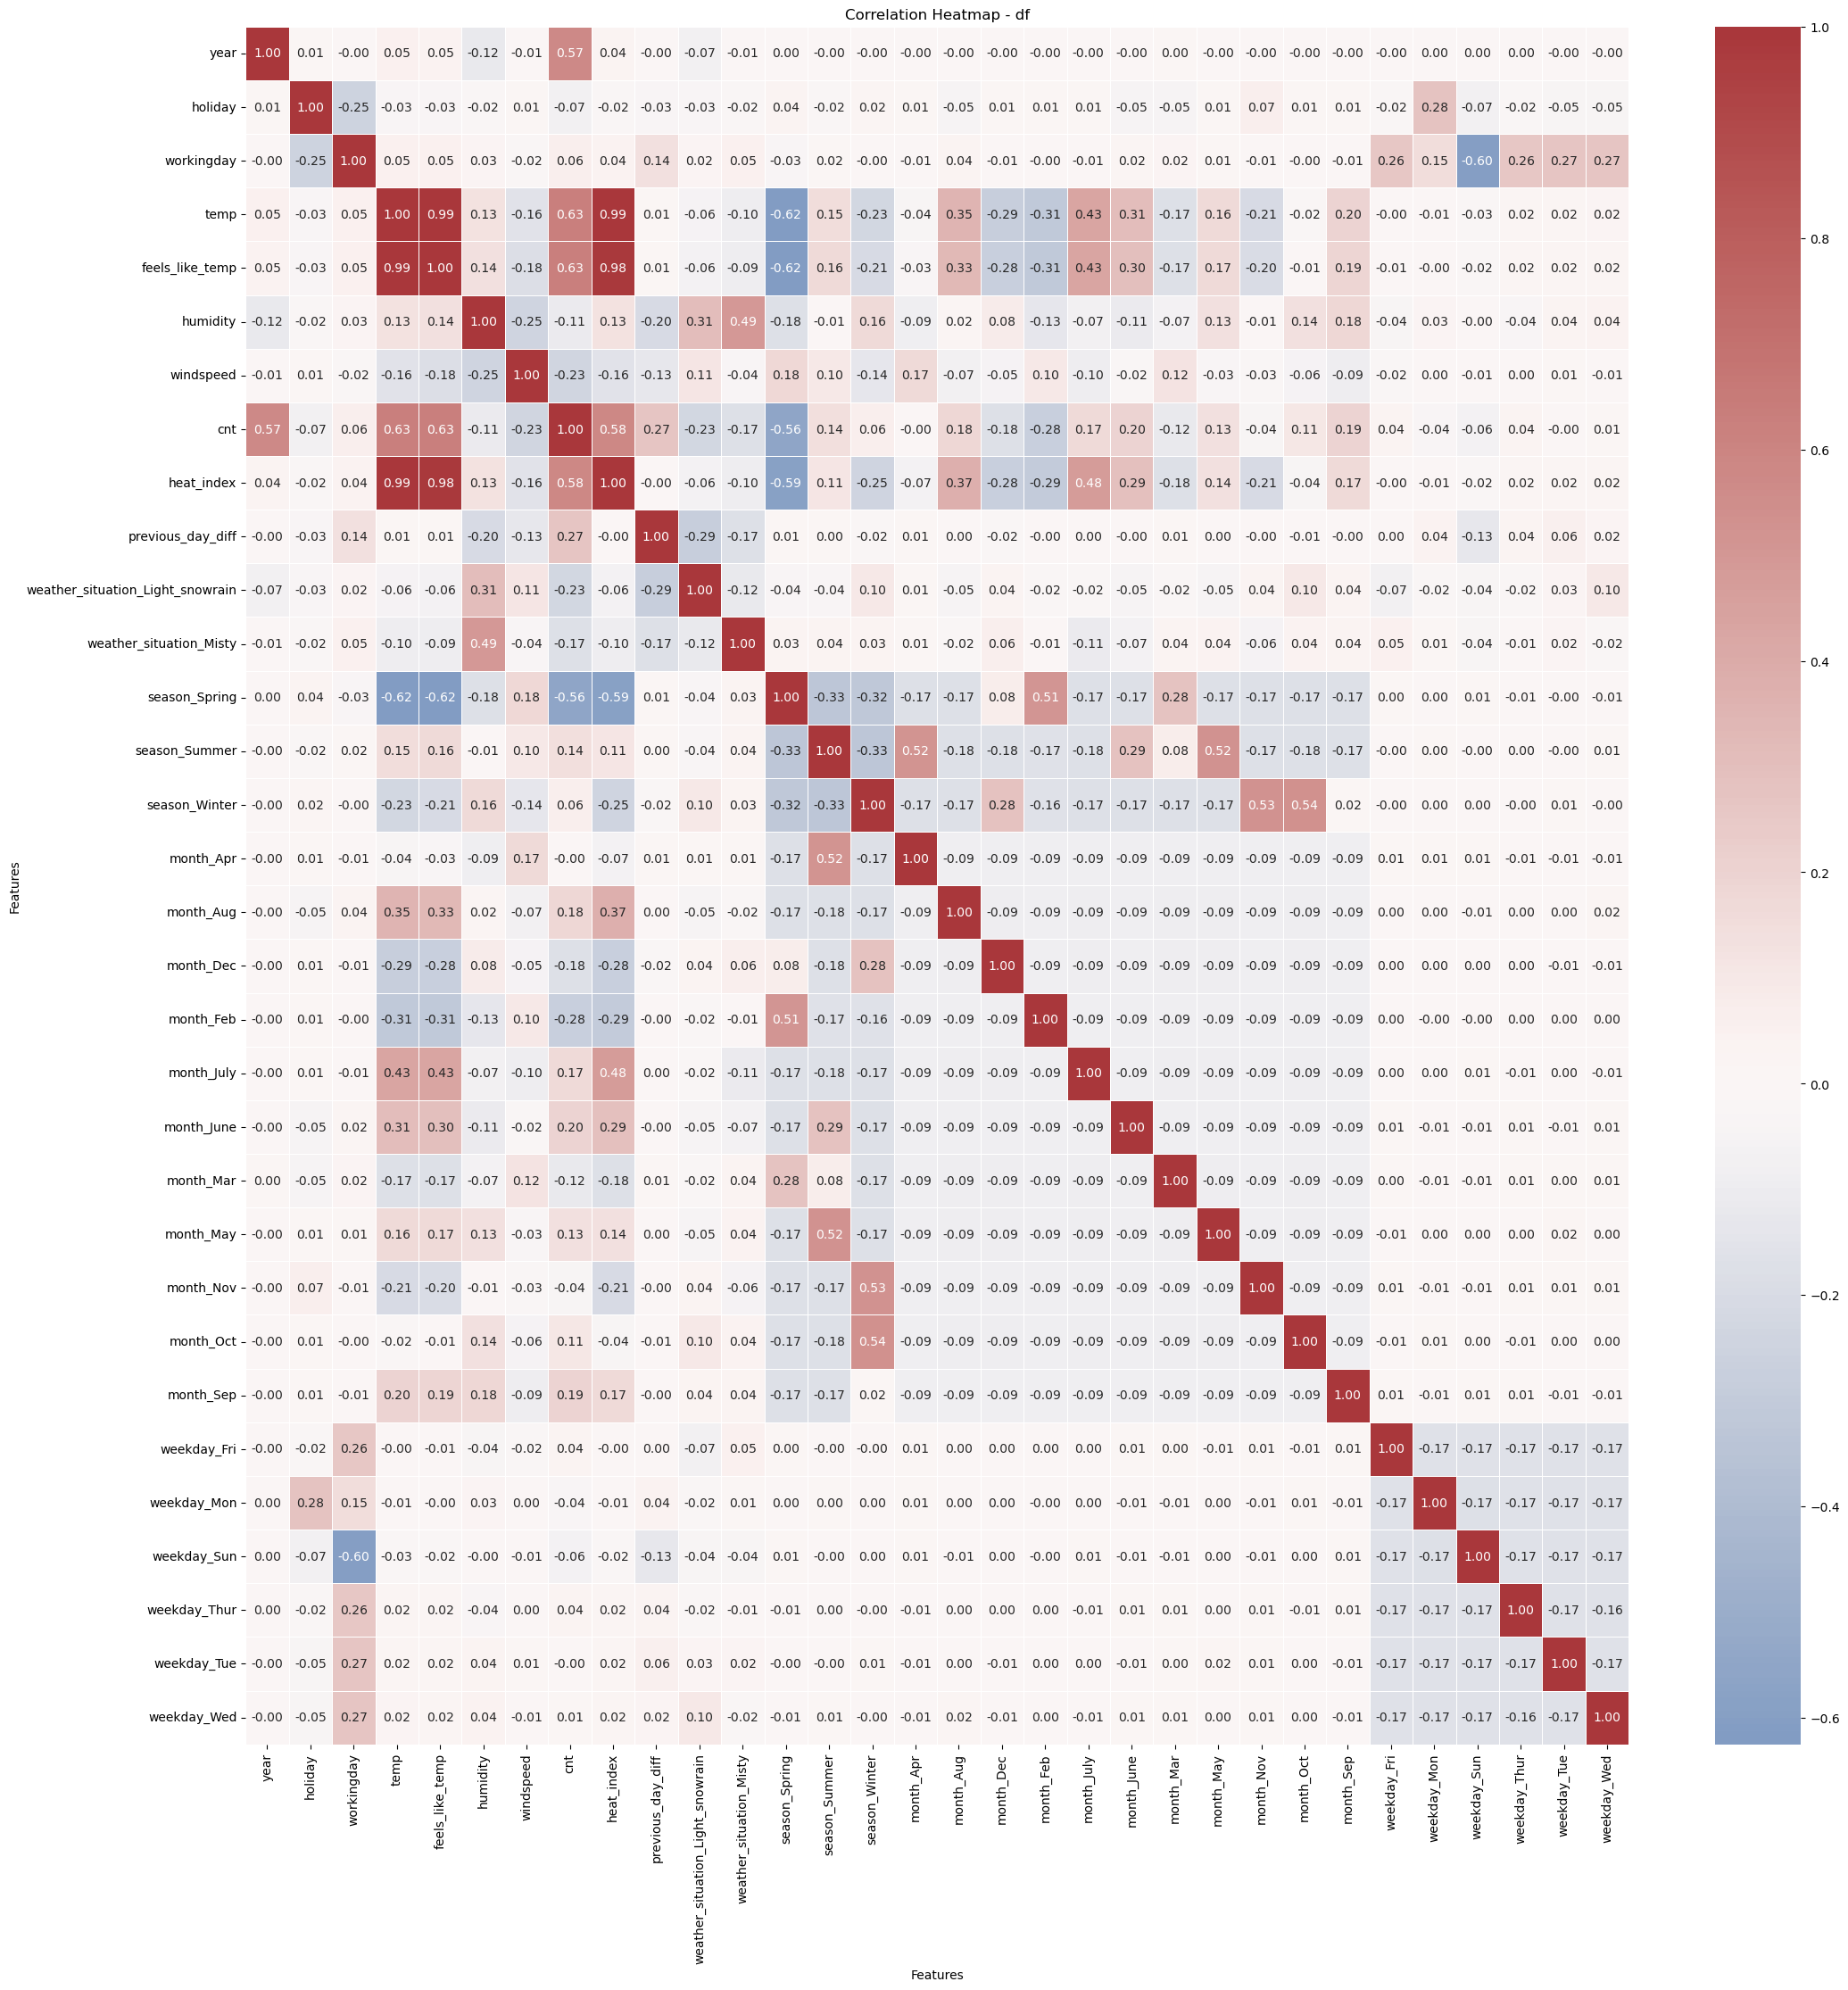

In [837]:
# Calculate the correlation matrix with all dummy variables
corr_matrix = dummy_df.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5, center=0)
# Set title and labels
plt.title('Correlation Heatmap - df')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

In [839]:
# Excluding few columns for this model
exclude_cols = ['feels_like_temp','holiday','temp']
# Select columns not in `exclude_cols`
globals()[f'model{model}_df'] = dummy_df.loc[:, ~dummy_df.columns.isin(exclude_cols)]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Model Building and Evaluation</h3>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Train-Test Split</h4>
</div>

In [843]:
globals()[f'df_train{model}'],globals()[f'df_test{model}'] = train_test_split(eval(f'model{model}_df'), test_size=0.25, random_state=120)

In [845]:
print("Training dataset shape:", eval(f'df_train{model}').shape)
print("Testing dataset shape:", eval(f'df_test{model}').shape)

Training dataset shape: (546, 29)
Testing dataset shape: (183, 29)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Scaling</h4>
</div>

In [848]:
globals()[f'scaler{model}'] = MinMaxScaler()

globals()[f'df{model}_train_scale'] = eval(f'scaler{model}').fit_transform(eval(f'df_train{model}'))
# Use the same scaler fitted on the training data 
globals()[f'df{model}_test_scale']  = eval(f'scaler{model}').transform(eval(f'df_test{model}'))

In [850]:
# converting Array to dataframe
globals()[f'df{model}_train'] = pd.DataFrame(eval(f'df{model}_train_scale'),columns=eval(f'model{model}_df').columns)
globals()[f'df{model}_test'] = pd.DataFrame(eval(f'df{model}_test_scale'),columns=eval(f'model{model}_df').columns)

In [852]:
# Splitting the dependent variable and independent variable
# Train dataset
globals()[f'X{model}_train'] = eval(f'df{model}_train').drop('cnt',axis=1)
globals()[f'y{model}_train'] = eval(f'df{model}_train')['cnt']

# Test Dataset
globals()[f'X{model}_test'] = eval(f'df{model}_test').drop('cnt',axis=1)
globals()[f'y{model}_test'] = eval(f'df{model}_test')['cnt']

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Selection</h4>
</div>

In [855]:
len(eval(f'X{model}_train').columns)

28

In [857]:
# Considering 18 columns 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=18) #8-25

selector = selector.fit(eval(f'X{model}_train'), eval(f'y{model}_train'))

In [859]:
pd.DataFrame({
    'Feature': eval(f'X{model}_train').columns, 
    'Selected': selector.support_,
    'Rank': selector.ranking_
}).sort_values(by='Rank')

Feature  Selected  Rank
0                               year      True     1
16                        month_June      True     1
15                        month_July      True     1
20                         month_Oct      True     1
26                       weekday_Tue      True     1
12                         month_Aug      True     1
11                         month_Apr      True     1
10                     season_Winter      True     1
17                         month_Mar      True     1
21                         month_Sep      True     1
23                       weekday_Mon      True     1
6   weather_situation_Light_snowrain      True     1
5                  previous_day_diff      True     1
4                         heat_index      True     1
3                          windspeed      True     1
2                           humidity      True     1
8                      season_Spring      True     1
18                         month_May      True     1
1                         workingday     False     2
27                       weekday_Wed     False     3
25                      weekday_Thur     False     4
22                       weekday_Fri     False     5
24                       weekday_Sun     False     6
14                         month_Feb     False     7
7            weather_situation_Misty     False     8
13                         month_Dec     False     9
19                         month_Nov     False    10
9                      season_Summer     False    11

In [861]:
# Selecting the columns which VIF selected for further model building.
selected_feature = eval(f'X{model}_train').columns[selector.support_]
print(selected_feature)

Index(['year', 'humidity', 'windspeed', 'heat_index', 'previous_day_diff',
       'weather_situation_Light_snowrain', 'season_Spring', 'season_Winter',
       'month_Apr', 'month_Aug', 'month_July', 'month_June', 'month_Mar',
       'month_May', 'month_Oct', 'month_Sep', 'weekday_Mon', 'weekday_Tue'],
      dtype='object')


In [863]:
# Selecting the feature based on RFE in training and testing dataset
globals()[f'X{model}_train'] = eval(f'X{model}_train')[selected_feature]
globals()[f'X{model}_test'] = eval(f'X{model}_test')[selected_feature]

In [865]:
print(eval(f'X{model}_train').shape)
print(eval(f'X{model}_test').shape)

(546, 18)
(183, 18)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Modeling</h4>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 1</b></h5>
</div>

In [869]:
iteration = 1

In [871]:
# Adding interseption (beta0) to the model 
globals()[f'X{model}_train_sm'] = sm.add_constant(eval(f'X{model}_train'))
globals()[f'X{model}_test_sm'] = sm.add_constant(eval(f'X{model}_test'))

In [873]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     176.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.09e-209
Time:                        17:36:57   Log-Likelihood:                 545.28
No. Observations:                 546   AIC:                            -1053.
Df Residuals:                     527   BIC:                            -970.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0007      0.040     -0.017      0.987      -0.079       0.078
year                                 0.2514      0.008     31.783      0.000       0.236       0.267
humidity                            -0.1893      0.024     -7.848      0.000      -0.237      -0.142
windspeed                           -0.1143      0.023     -4.872      0.000      -0.160      -0.068
heat_index                           0.3893      0.045      8.740      0.000       0.302       0.477
previous_day_diff                    0.4977      0.040     12.478      0.000       0.419       0.576
weather_situation_Light_snowrain    -0.0998      0.027     -3.741      0.000      -0.152      -0.047
season_Spring                       -0.0975      0.022     -4.402      0.000      -0.141      -0.054
season_Winter                        0.1026      0.022      4.567      0.000       0.058       0.147
month_Apr                            0.0938      0.027      3.470      0.001       0.041       0.147
month_Aug                            0.1170      0.032      3.630      0.000       0.054       0.180
month_July                           0.0789      0.034      2.292      0.022       0.011       0.147
month_June                           0.1270      0.032      3.988      0.000       0.064       0.189
month_Mar                            0.0997      0.018      5.589      0.000       0.065       0.135
month_May                            0.1591      0.028      5.591      0.000       0.103       0.215
month_Oct                            0.1021      0.018      5.652      0.000       0.067       0.138
month_Sep                            0.1656      0.025      6.510      0.000       0.116       0.216
weekday_Mon                         -0.0206      0.012     -1.760      0.079      -0.044       0.002
weekday_Tue                         -0.0154      0.011     -1.381      0.168      -0.037       0.007
==============================================================================
Omnibus:                      131.832   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.878
Skew:                          -1.100   Prob(JB):                     9.16e-98
Kurtosis:                       6.848   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [875]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature         VIF
0                              const  105.665257
11                        month_July    6.308092
8                      season_Winter    6.072080
7                      season_Spring    6.049794
4                         heat_index    5.808619
10                         month_Aug    5.728702
12                        month_June    4.979660
14                         month_May    4.224328
9                          month_Apr    3.594757
16                         month_Sep    3.114312
13                         month_Mar    1.628872
15                         month_Oct    1.603525
2                           humidity    1.432103
6   weather_situation_Light_snowrain    1.262524
3                          windspeed    1.208786
5                  previous_day_diff    1.146105
17                       weekday_Mon    1.052697
18                       weekday_Tue    1.041973
1                               year    1.036719

In [877]:
# Dropping the column with high VIF and re-assigning it to the global variables
globals()[f'X{model}_train_sm'].drop("month_July", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("month_July", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 2</b></h5>
</div>

In [880]:
iteration = 2

In [882]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     185.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.06e-209
Time:                        17:37:01   Log-Likelihood:                 542.57
No. Observations:                 546   AIC:                            -1049.
Df Residuals:                     528   BIC:                            -971.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0246      0.039      0.639      0.523      -0.051       0.100
year                                 0.2497      0.008     31.579      0.000       0.234       0.265
humidity                            -0.2006      0.024     -8.465      0.000      -0.247      -0.154
windspeed                           -0.1178      0.023     -5.013      0.000      -0.164      -0.072
heat_index                           0.4563      0.034     13.537      0.000       0.390       0.523
previous_day_diff                    0.4948      0.040     12.362      0.000       0.416       0.573
weather_situation_Light_snowrain    -0.0971      0.027     -3.628      0.000      -0.150      -0.045
season_Spring                       -0.1243      0.019     -6.591      0.000      -0.161      -0.087
season_Winter                        0.0713      0.018      3.982      0.000       0.036       0.106
month_Apr                            0.0516      0.020      2.597      0.010       0.013       0.091
month_Aug                            0.0546      0.017      3.152      0.002       0.021       0.089
month_June                           0.0665      0.018      3.719      0.000       0.031       0.102
month_Mar                            0.0789      0.015      5.117      0.000       0.049       0.109
month_May                            0.1087      0.018      5.992      0.000       0.073       0.144
month_Oct                            0.0912      0.017      5.212      0.000       0.057       0.126
month_Sep                            0.1220      0.017      7.206      0.000       0.089       0.155
weekday_Mon                         -0.0218      0.012     -1.854      0.064      -0.045       0.001
weekday_Tue                         -0.0162      0.011     -1.448      0.148      -0.038       0.006
==============================================================================
Omnibus:                      122.640   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.848
Skew:                          -1.060   Prob(JB):                     1.80e-81
Kurtosis:                       6.443   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [884]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  97.601964
7                      season_Spring   4.355862
8                      season_Winter   3.824705
4                         heat_index   3.300934
9                          month_Apr   1.923994
13                         month_May   1.704482
10                         month_Aug   1.644573
11                        month_June   1.557467
14                         month_Oct   1.492095
2                           humidity   1.371803
15                         month_Sep   1.367338
6   weather_situation_Light_snowrain   1.260041
12                         month_Mar   1.207911
3                          windspeed   1.203603
5                  previous_day_diff   1.144948
16                       weekday_Mon   1.050691
17                       weekday_Tue   1.040943
1                               year   1.028180

In [886]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Tue", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Tue", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 3</b></h5>
</div>

In [889]:
iteration = 3

In [891]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.10e-210
Time:                        17:37:02   Log-Likelihood:                 541.49
No. Observations:                 546   AIC:                            -1049.
Df Residuals:                     529   BIC:                            -975.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0249      0.039      0.646      0.519      -0.051       0.101
year                                 0.2497      0.008     31.537      0.000       0.234       0.265
humidity                            -0.2023      0.024     -8.538      0.000      -0.249      -0.156
windspeed                           -0.1189      0.024     -5.056      0.000      -0.165      -0.073
heat_index                           0.4570      0.034     13.545      0.000       0.391       0.523
previous_day_diff                    0.4896      0.040     12.269      0.000       0.411       0.568
weather_situation_Light_snowrain    -0.0965      0.027     -3.603      0.000      -0.149      -0.044
season_Spring                       -0.1233      0.019     -6.537      0.000      -0.160      -0.086
season_Winter                        0.0724      0.018      4.047      0.000       0.037       0.108
month_Apr                            0.0528      0.020      2.658      0.008       0.014       0.092
month_Aug                            0.0554      0.017      3.195      0.001       0.021       0.089
month_June                           0.0673      0.018      3.761      0.000       0.032       0.102
month_Mar                            0.0790      0.015      5.116      0.000       0.049       0.109
month_May                            0.1095      0.018      6.033      0.000       0.074       0.145
month_Oct                            0.0908      0.018      5.186      0.000       0.056       0.125
month_Sep                            0.1226      0.017      7.239      0.000       0.089       0.156
weekday_Mon                         -0.0189      0.012     -1.630      0.104      -0.042       0.004
==============================================================================
Omnibus:                      126.506   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.155
Skew:                          -1.070   Prob(JB):                     1.42e-89
Kurtosis:                       6.661   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [893]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  97.599185
7                      season_Spring   4.350481
8                      season_Winter   3.816885
4                         heat_index   3.300252
9                          month_Apr   1.920476
13                         month_May   1.702885
10                         month_Aug   1.642948
11                        month_June   1.556044
14                         month_Oct   1.491762
2                           humidity   1.368434
15                         month_Sep   1.366371
6   weather_situation_Light_snowrain   1.259748
12                         month_Mar   1.207899
3                          windspeed   1.202404
5                  previous_day_diff   1.135647
1                               year   1.028132
16                       weekday_Mon   1.020235

In [895]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Mon", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Mon", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 4</b></h5>
</div>

In [898]:
iteration = 4

In [900]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          5.34e-211
Time:                        17:37:03   Log-Likelihood:                 540.12
No. Observations:                 546   AIC:                            -1048.
Df Residuals:                     530   BIC:                            -979.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0248      0.039      0.642      0.521      -0.051       0.101
year                                 0.2489      0.008     31.446      0.000       0.233       0.264
humidity                            -0.2054      0.024     -8.679      0.000      -0.252      -0.159
windspeed                           -0.1214      0.023     -5.167      0.000      -0.168      -0.075
heat_index                           0.4586      0.034     13.575      0.000       0.392       0.525
previous_day_diff                    0.4882      0.040     12.217      0.000       0.410       0.567
weather_situation_Light_snowrain    -0.0927      0.027     -3.467      0.001      -0.145      -0.040
season_Spring                       -0.1228      0.019     -6.500      0.000      -0.160      -0.086
season_Winter                        0.0733      0.018      4.091      0.000       0.038       0.109
month_Apr                            0.0540      0.020      2.714      0.007       0.015       0.093
month_Aug                            0.0558      0.017      3.214      0.001       0.022       0.090
month_June                           0.0673      0.018      3.756      0.000       0.032       0.102
month_Mar                            0.0804      0.015      5.206      0.000       0.050       0.111
month_May                            0.1095      0.018      6.024      0.000       0.074       0.145
month_Oct                            0.0905      0.018      5.160      0.000       0.056       0.125
month_Sep                            0.1222      0.017      7.208      0.000       0.089       0.156
==============================================================================
Omnibus:                      122.097   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.439
Skew:                          -1.046   Prob(JB):                     2.45e-83
Kurtosis:                       6.514   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [902]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  97.598827
7                      season_Spring   4.349196
8                      season_Winter   3.813543
4                         heat_index   3.297609
9                          month_Apr   1.917995
13                         month_May   1.702884
10                         month_Aug   1.642622
11                        month_June   1.556044
14                         month_Oct   1.491577
15                         month_Sep   1.366146
2                           humidity   1.360061
6   weather_situation_Light_snowrain   1.249941
12                         month_Mar   1.204210
3                          windspeed   1.197133
5                  previous_day_diff   1.135110
1                               year   1.024845

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Residual Analysis (Linearity)</h4>
</div>

In [906]:
# Predicting the known Y values in the training dataset using the model.
globals()[f'y{model}_train_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_train_sm'))

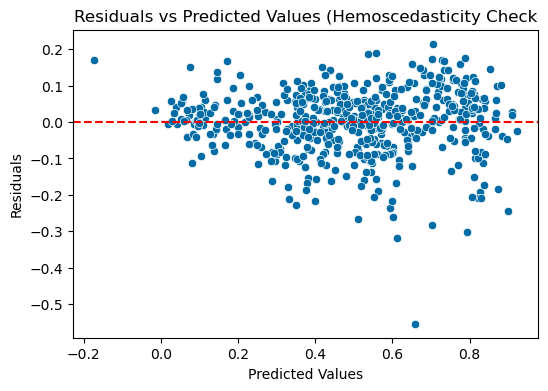

In [908]:
# Plot residuals vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Hemoscedasticity Check")
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Normality of Residuals</h4>
</div>

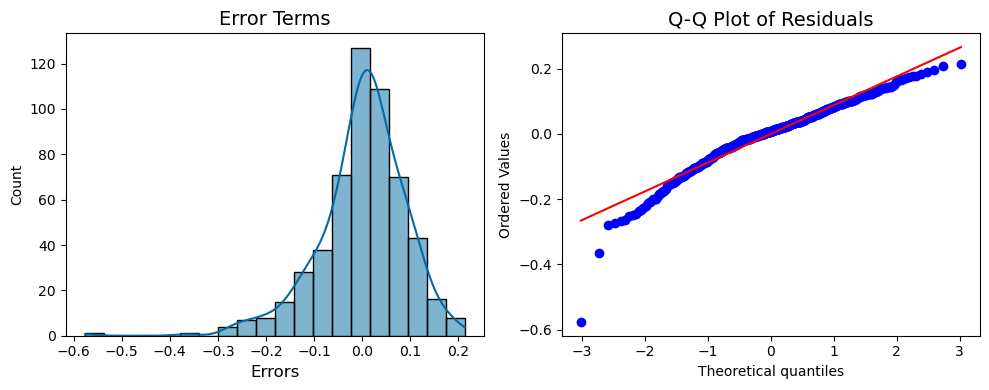

In [911]:
# Calculating the residual
residual_train = eval(f'y{model}_train') - eval(f'y{model}_train_pred')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

# Plot 1: Histogram of error terms
sns.histplot(residual_train, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Error Terms', fontsize=14)    
axes[0].set_xlabel('Errors', fontsize=12) 

#plot 2: Q-Q Plot
stats.probplot(residual_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals', fontsize=14) 

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Validating homoscedasticity on Training Set</h4>
</div>

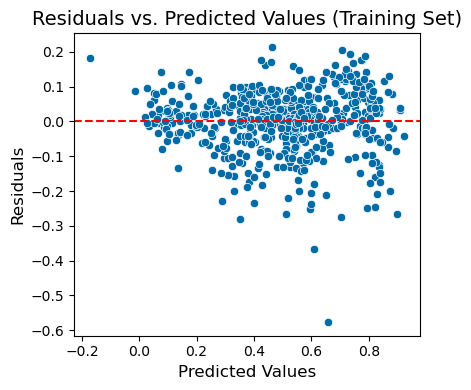

In [914]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

# Plot 1: Residuals vs. predicted values
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train, ax=axes[0])
axes[0].set_title('Residuals vs. Predicted Values (Training Set)', fontsize=14)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].axhline(y=0, color='r', linestyle='--')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Checking Independence of Reiduals</h4>
</div>

<Figure size 500x400 with 0 Axes>

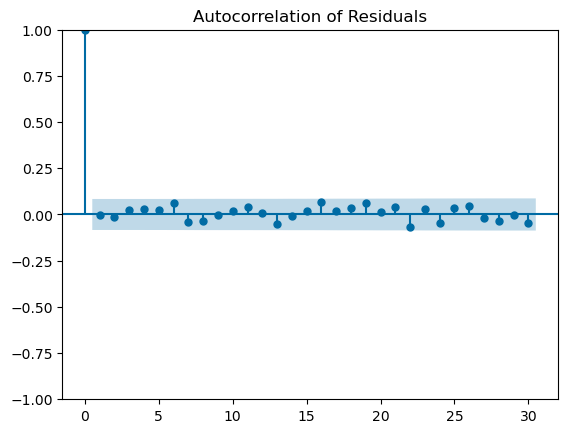

In [917]:
# Autocorrelation plot of residuals
plt.figure(figsize=(5, 4))
plot_acf(residual_train, lags=30)
plt.title("Autocorrelation of Residuals")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Making Prediction</h4>
</div>

In [920]:
# Making prediction on the test dataset using the model with last iteration
globals()[f'y{model}_test_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_test_sm'))

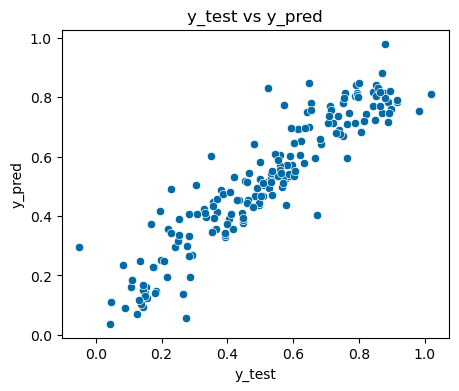

In [922]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test'), y=eval(f'y{model}_test_pred'))
fig.suptitle('y_test vs y_pred', fontsize = 10) 
plt.xlabel('y_test')                      
plt.ylabel('y_pred') 
plt.title('y_test vs y_pred')
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Performance Metrics</h4>
</div>

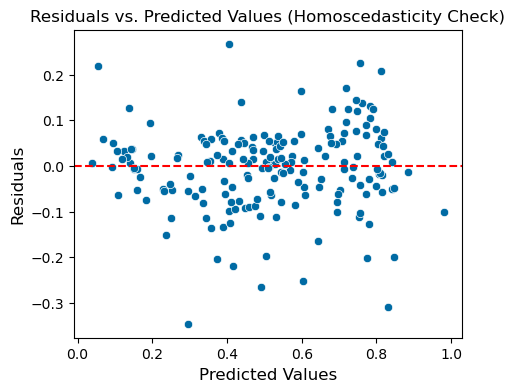

In [925]:
# Calculate residuals (errors):
residual_test = eval(f'y{model}_test') - eval(f'y{model}_test_pred')

# Plot residuals vs. predicted values
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test_pred'), y=residual_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values', fontdict={'fontsize': 12})
plt.ylabel('Residuals', fontdict={'fontsize': 12})
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

In [927]:
# Training set:
mse_train = mean_squared_error(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))

# Test set:
mse_test = mean_squared_error(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))

print("Training Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, R-squared: {r2_train}")
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R-squared: {r2_test}")

Training Set Metrics:
MSE: 0.008096356350673833, RMSE: 0.0899797552267944, R-squared: 0.8551426428723807
Test Set Metrics:
MSE: 0.008474499026737154, RMSE: 0.09205704224412793, R-squared: 0.8542539337122469


In [929]:
bp_test = het_breuschpagan(residual_test, eval(f'X{model}_test_sm'))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 28.667655334069345, 'LM-Test p-value': 0.017744388325890297, 'F-Statistic': 2.068047131728456, 'F-Test p-value': 0.013710005934627867}


In [931]:
eval(f'res{iteration}').params.sort_values(ascending=False)

previous_day_diff                   0.488151
heat_index                          0.458575
year                                0.248930
month_Sep                           0.122248
month_May                           0.109545
month_Oct                           0.090487
month_Mar                           0.080386
season_Winter                       0.073312
month_June                          0.067268
month_Aug                           0.055812
month_Apr                           0.053976
const                               0.024778
weather_situation_Light_snowrain   -0.092683
windspeed                          -0.121396
season_Spring                      -0.122813
humidity                           -0.205352
dtype: float64

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">MODEL 6</h2>
</div>

In [934]:
model = 6

In [936]:
model6_df = df.copy()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Feature Engineering</h3>
</div>

In [939]:
# Applying the heat_index function to create a variable
model6_df['heat_index'] = model6_df.apply(lambda x: heat_index(x['temp'], x['humidity']), axis=1)

In [941]:
# Calculate previous_day_diff
model6_df['previous_day_diff'] = model5_df['cnt'].diff()

In [943]:
model6_df['previous_day_diff'].iloc[0] = 0

In [945]:
model6_df

season  year month  holiday weekday  workingday weather_situation  \
0    Spring     0   Jan        0     Sat           0             Misty   
1    Spring     0   Jan        0     Sun           0             Misty   
2    Spring     0   Jan        0     Mon           1             Clear   
3    Spring     0   Jan        0     Tue           1             Clear   
4    Spring     0   Jan        0     Wed           1             Clear   
..      ...   ...   ...      ...     ...         ...               ...   
725  Spring     1   Dec        0    Thur           1             Misty   
726  Spring     1   Dec        0     Fri           1             Misty   
727  Spring     1   Dec        0     Sat           0             Misty   
728  Spring     1   Dec        0     Sun           0             Clear   
729  Spring     1   Dec        0     Mon           1             Misty   

          temp  feels_like_temp  humidity  windspeed   cnt  heat_index  \
0    14.110847         18.18125   80.5833  10.749882   985   57.399525   
1    14.902598         17.68695   69.6087  16.652113   801   58.824676   
2     8.050924          9.47025   43.7273  16.636703  1349   46.491663   
3     8.200000         10.60610   59.0435  10.739832  1562   46.760000   
4     9.305237         11.46350   43.6957  12.522300  1600   48.749427   
..         ...              ...       ...        ...   ...         ...   
725  10.420847         11.33210   65.2917  23.458911  2114   50.757525   
726  10.386653         12.75230   59.0000  10.416557  3095   50.695975   
727  10.386653         12.12000   75.2917   8.333661  1341   50.695975   
728  10.489153         11.58500   48.3333  23.500518  1796   50.880475   
729   8.849153         11.17435   57.7500  10.374682  2729   47.928475   

     previous_day_diff  
0                  0.0  
1               -184.0  
2                548.0  
3                213.0  
4                 38.0  
..                 ...  
725             1673.0  
726              981.0  
727            -1754.0  
728              455.0  
729              933.0  

[729 rows x 14 columns]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Dummy Variables (One-hot encoding)</h3>
</div>

In [947]:
model6_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temp', 'feels_like_temp', 'humidity', 'windspeed',
       'cnt', 'heat_index', 'previous_day_diff'],
      dtype='object')

In [949]:
dummy_df = model6_df.copy()

In [951]:
dummy_df.head()

season  year month  holiday weekday  workingday weather_situation  \
0  Spring     0   Jan        0     Sat           0             Misty   
1  Spring     0   Jan        0     Sun           0             Misty   
2  Spring     0   Jan        0     Mon           1             Clear   
3  Spring     0   Jan        0     Tue           1             Clear   
4  Spring     0   Jan        0     Wed           1             Clear   

        temp  feels_like_temp  humidity  windspeed   cnt  heat_index  \
0  14.110847         18.18125   80.5833  10.749882   985   57.399525   
1  14.902598         17.68695   69.6087  16.652113   801   58.824676   
2   8.050924          9.47025   43.7273  16.636703  1349   46.491663   
3   8.200000         10.60610   59.0435  10.739832  1562   46.760000   
4   9.305237         11.46350   43.6957  12.522300  1600   48.749427   

   previous_day_diff  
0                0.0  
1             -184.0  
2              548.0  
3              213.0  
4               38.0

In [953]:
# Creating a dummies for weather_situation and choosing which catogory to drop
# Clear
dummy_df = create_dummies(dummy_df, "weather_situation")

Percentage of each category in 'weather_situation':
weather_situation
Clear             63.511660
Misty             33.744856
Light_snowrain     2.743484
Name: proportion, dtype: float64



Enter the category to drop from 'weather_situation':  Clear



Dummy variables created for 'weather_situation', excluding 'Clear'.


In [955]:
# Creating a dummies for season and choosing which catogory to drop
# Fall
dummy_df = create_dummies(dummy_df, "season")

Percentage of each category in 'season':
season
Fall      25.788752
Summer    25.240055
Spring    24.554184
Winter    24.417010
Name: proportion, dtype: float64



Enter the category to drop from 'season':  Fall



Dummy variables created for 'season', excluding 'Fall'.


In [957]:
# Creating a dummies for month and choosing which catogory to drop
# Jan
dummy_df = create_dummies(dummy_df, "month")

Percentage of each category in 'month':
month
Jan     8.504801
May     8.504801
July    8.504801
Aug     8.504801
Oct     8.504801
Dec     8.504801
Mar     8.367627
Apr     8.230453
June    8.230453
Sep     8.230453
Nov     8.230453
Feb     7.681756
Name: proportion, dtype: float64



Enter the category to drop from 'month':  Jan



Dummy variables created for 'month', excluding 'Jan'.


In [959]:
# Creating a dummies for weekday and choosing which catogory to drop
# Sat
dummy_df = create_dummies(dummy_df, "weekday")

Percentage of each category in 'weekday':
weekday
Sat     14.403292
Sun     14.403292
Mon     14.403292
Tue     14.266118
Fri     14.266118
Wed     14.128944
Thur    14.128944
Name: proportion, dtype: float64



Enter the category to drop from 'weekday':  Sat



Dummy variables created for 'weekday', excluding 'Sat'.


In [961]:
dummy_df.head()

year  holiday  workingday       temp  feels_like_temp  humidity  windspeed  \
0     0        0           0  14.110847         18.18125   80.5833  10.749882   
1     0        0           0  14.902598         17.68695   69.6087  16.652113   
2     0        0           1   8.050924          9.47025   43.7273  16.636703   
3     0        0           1   8.200000         10.60610   59.0435  10.739832   
4     0        0           1   9.305237         11.46350   43.6957  12.522300   

    cnt  heat_index  previous_day_diff  weather_situation_Light_snowrain  \
0   985   57.399525                0.0                                 0   
1   801   58.824676             -184.0                                 0   
2  1349   46.491663              548.0                                 0   
3  1562   46.760000              213.0                                 0   
4  1600   48.749427               38.0                                 0   

   weather_situation_Misty  season_Spring  season_Summer  season_Winter  \
0                        1              1              0              0   
1                        1              1              0              0   
2                        0              1              0              0   
3                        0              1              0              0   
4                        0              1              0              0   

   month_Apr  month_Aug  month_Dec  month_Feb  month_July  month_June  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Fri  \
0          0          0          0          0          0            0   
1          0          0          0          0          0            0   
2          0          0          0          0          0            0   
3          0          0          0          0          0            0   
4          0          0          0          0          0            0   

   weekday_Mon  weekday_Sun  weekday_Thur  weekday_Tue  weekday_Wed  
0            0            0             0            0            0  
1            0            1             0            0            0  
2            1            0             0            0            0  
3            0            0             0            1            0  
4            0            0             0            0            1

In [963]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              729 non-null    int64  
 1   holiday                           729 non-null    int64  
 2   workingday                        729 non-null    int64  
 3   temp                              729 non-null    float64
 4   feels_like_temp                   729 non-null    float64
 5   humidity                          729 non-null    float64
 6   windspeed                         729 non-null    float64
 7   cnt                               729 non-null    int64  
 8   heat_index                        729 non-null    float64
 9   previous_day_diff                 729 non-null    float64
 10  weather_situation_Light_snowrain  729 non-null    int32  
 11  weather_situation_Misty           729 non-null    int32  
 12  season_Spring

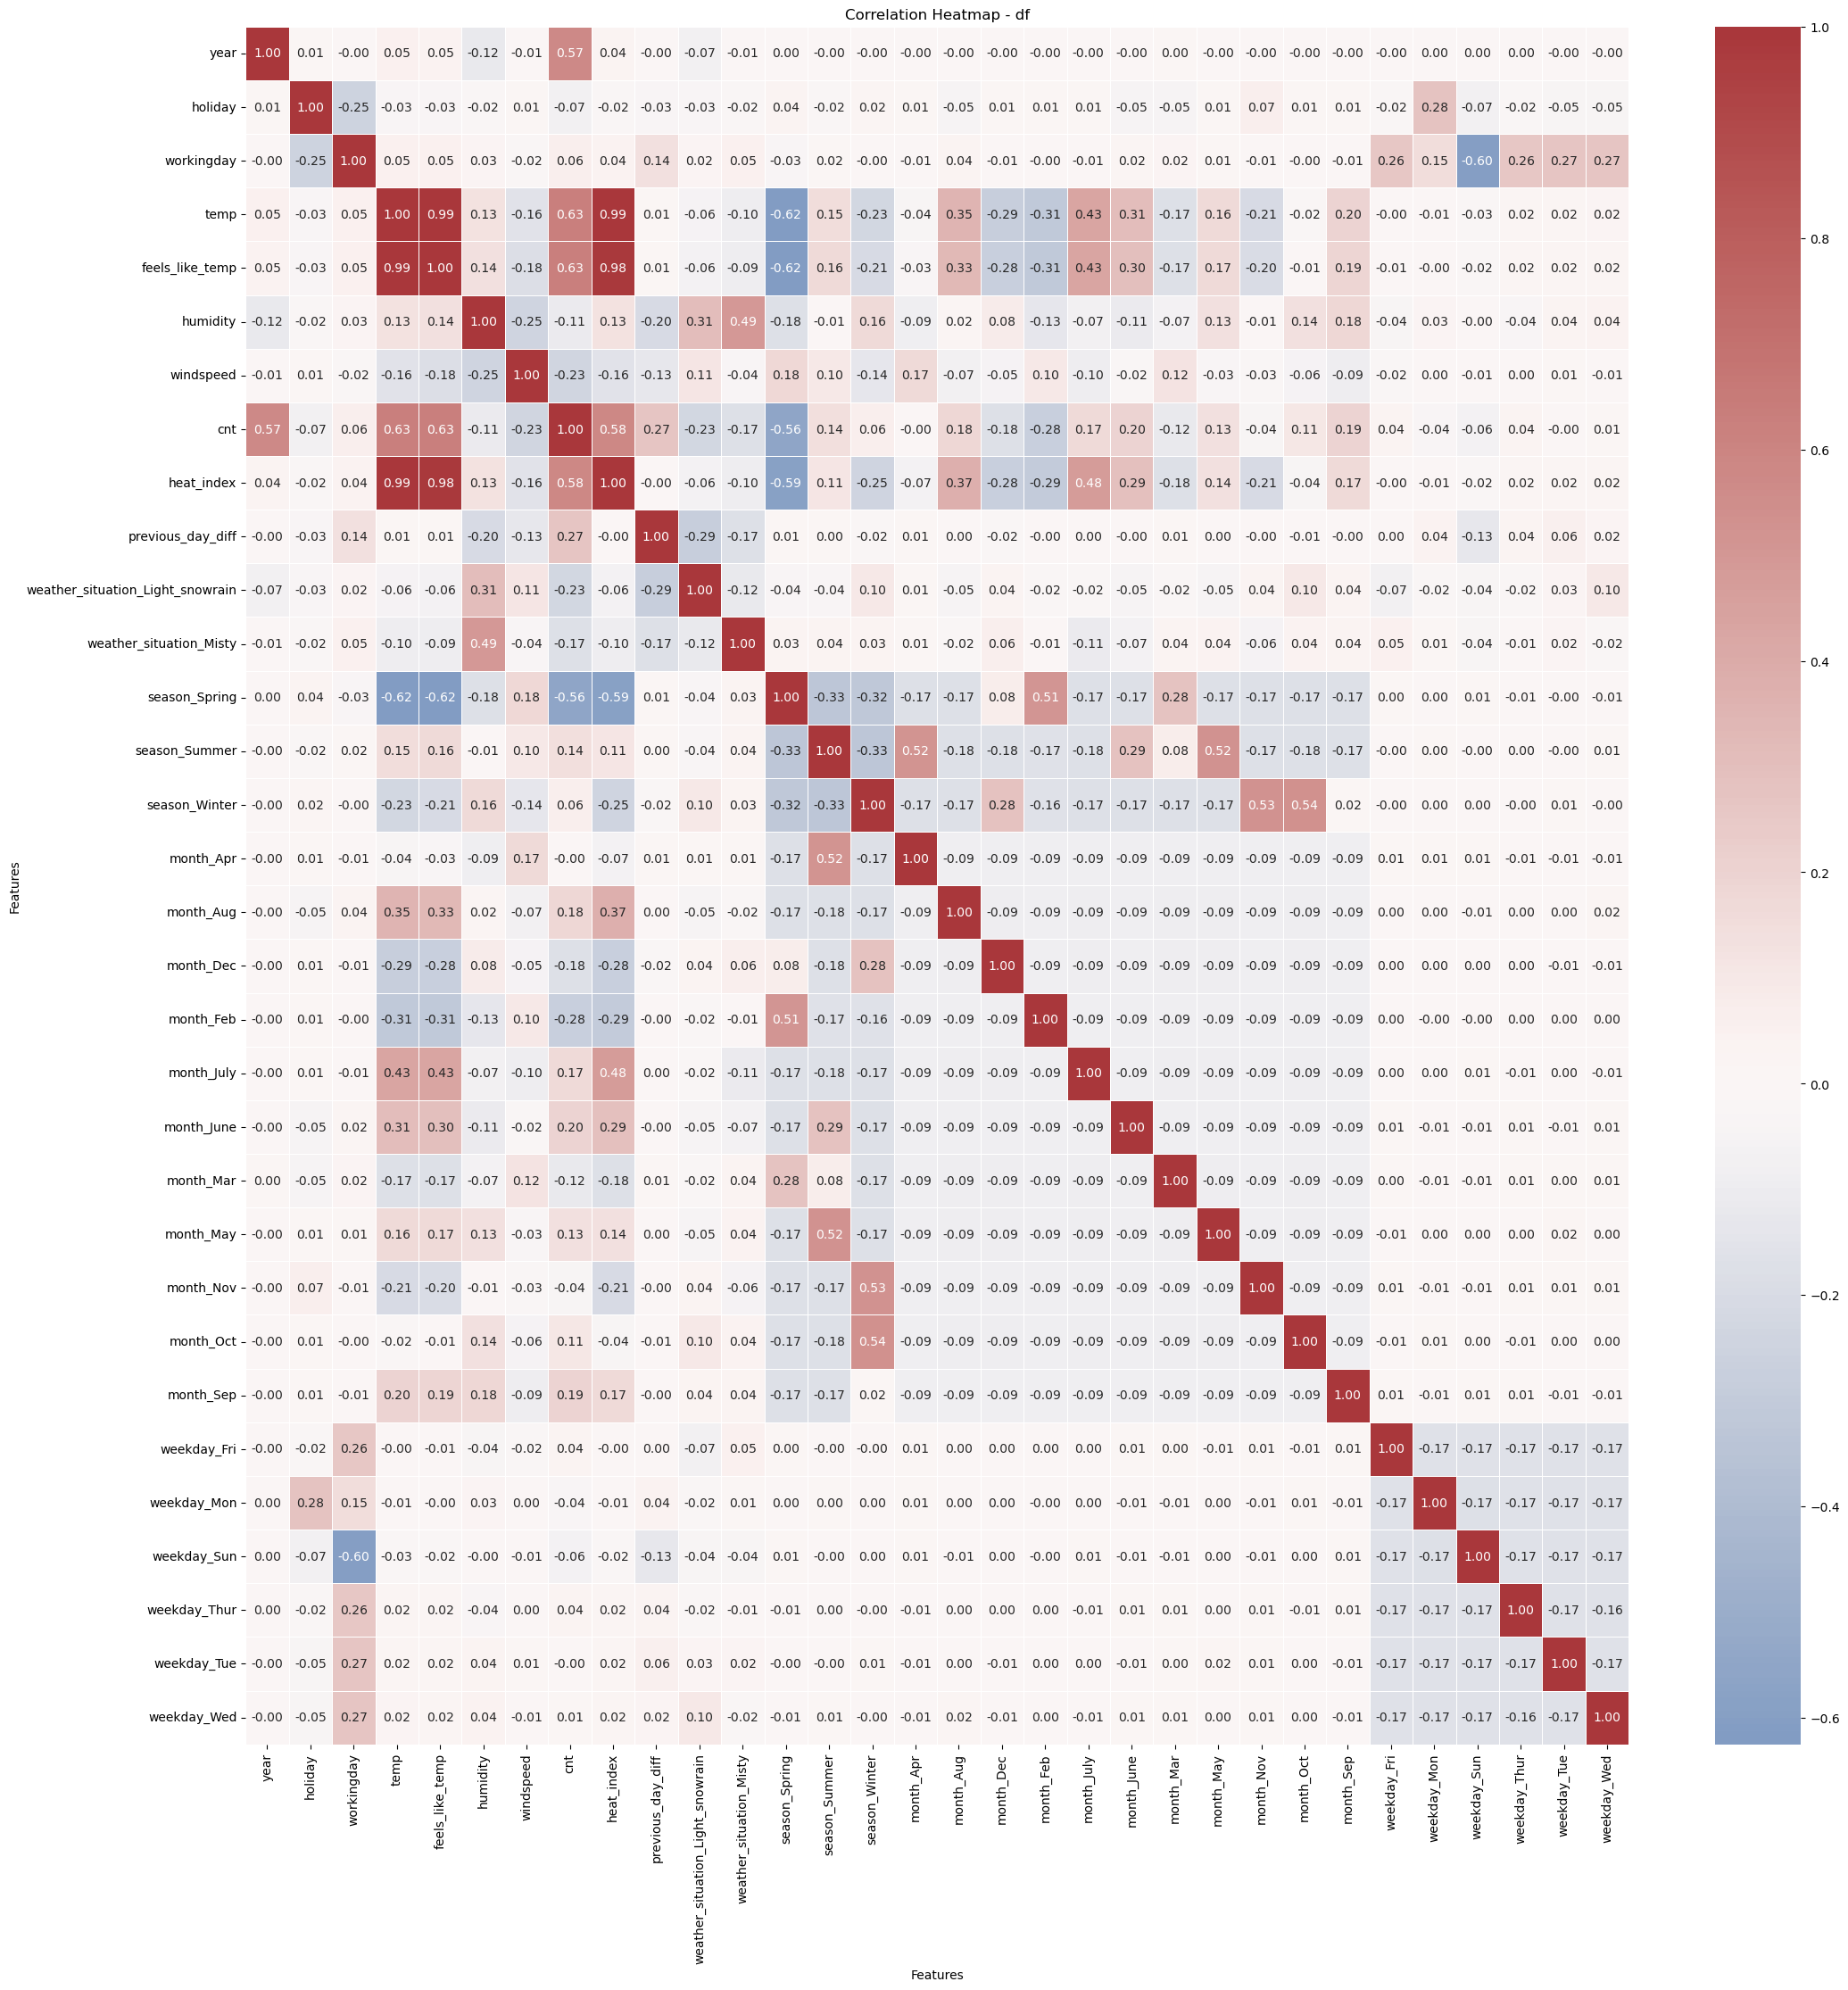

In [965]:
# Calculate the correlation matrix with all dummy variables
corr_matrix = dummy_df.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5, center=0)
# Set title and labels
plt.title('Correlation Heatmap - df')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

In [967]:
# Excluding few columns for this model
exclude_cols = ['feels_like_temp','holiday','temp','windspeed']
# Select columns not in `exclude_cols`
globals()[f'model{model}_df'] = dummy_df.loc[:, ~dummy_df.columns.isin(exclude_cols)]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Model Building and Evaluation</h3>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Train-Test Split</h4>
</div>

In [971]:
globals()[f'df_train{model}'],globals()[f'df_test{model}'] = train_test_split(eval(f'model{model}_df'), test_size=0.25, random_state=120)

In [973]:
print("Training dataset shape:", eval(f'df_train{model}').shape)
print("Testing dataset shape:", eval(f'df_test{model}').shape)

Training dataset shape: (546, 28)
Testing dataset shape: (183, 28)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Scaling</h4>
</div>

In [976]:
globals()[f'scaler{model}'] = MinMaxScaler()

globals()[f'df{model}_train_scale'] = eval(f'scaler{model}').fit_transform(eval(f'df_train{model}'))
# Use the same scaler fitted on the training data 
globals()[f'df{model}_test_scale']  = eval(f'scaler{model}').transform(eval(f'df_test{model}'))

In [978]:
# converting Array to dataframe
globals()[f'df{model}_train'] = pd.DataFrame(eval(f'df{model}_train_scale'),columns=eval(f'model{model}_df').columns)
globals()[f'df{model}_test'] = pd.DataFrame(eval(f'df{model}_test_scale'),columns=eval(f'model{model}_df').columns)

In [980]:
# Splitting the dependent variable and independent variable
# Train dataset
globals()[f'X{model}_train'] = eval(f'df{model}_train').drop('cnt',axis=1)
globals()[f'y{model}_train'] = eval(f'df{model}_train')['cnt']

# Test Dataset
globals()[f'X{model}_test'] = eval(f'df{model}_test').drop('cnt',axis=1)
globals()[f'y{model}_test'] = eval(f'df{model}_test')['cnt']

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Selection</h4>
</div>

In [983]:
len(eval(f'X{model}_train').columns)

27

In [985]:
# Considering 18 columns 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=18) #8-25

selector = selector.fit(eval(f'X{model}_train'), eval(f'y{model}_train'))

In [987]:
pd.DataFrame({
    'Feature': eval(f'X{model}_train').columns, 
    'Selected': selector.support_,
    'Rank': selector.ranking_
}).sort_values(by='Rank')

Feature  Selected  Rank
0                               year      True     1
22                       weekday_Mon      True     1
20                         month_Sep      True     1
19                         month_Oct      True     1
17                         month_May      True     1
16                         month_Mar      True     1
15                        month_June      True     1
14                        month_July      True     1
25                       weekday_Tue      True     1
11                         month_Aug      True     1
26                       weekday_Wed      True     1
9                      season_Winter      True     1
7                      season_Spring      True     1
5   weather_situation_Light_snowrain      True     1
4                  previous_day_diff      True     1
3                         heat_index      True     1
2                           humidity      True     1
10                         month_Apr      True     1
1                         workingday     False     2
24                      weekday_Thur     False     3
21                       weekday_Fri     False     4
23                       weekday_Sun     False     5
13                         month_Feb     False     6
6            weather_situation_Misty     False     7
12                         month_Dec     False     8
18                         month_Nov     False     9
8                      season_Summer     False    10

In [989]:
# Selecting the columns which VIF selected for further model building.
selected_feature = eval(f'X{model}_train').columns[selector.support_]
print(selected_feature)

Index(['year', 'humidity', 'heat_index', 'previous_day_diff',
       'weather_situation_Light_snowrain', 'season_Spring', 'season_Winter',
       'month_Apr', 'month_Aug', 'month_July', 'month_June', 'month_Mar',
       'month_May', 'month_Oct', 'month_Sep', 'weekday_Mon', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')


In [991]:
# Selecting the feature based on RFE in training and testing dataset
globals()[f'X{model}_train'] = eval(f'X{model}_train')[selected_feature]
globals()[f'X{model}_test'] = eval(f'X{model}_test')[selected_feature]

In [993]:
print(eval(f'X{model}_train').shape)
print(eval(f'X{model}_test').shape)

(546, 18)
(183, 18)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Modeling</h4>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 1</b></h5>
</div>

In [997]:
iteration = 1

In [999]:
# Adding interseption (beta0) to the model 
globals()[f'X{model}_train_sm'] = sm.add_constant(eval(f'X{model}_train'))
globals()[f'X{model}_test_sm'] = sm.add_constant(eval(f'X{model}_test'))

In [1001]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          7.86e-205
Time:                        17:54:26   Log-Likelihood:                 533.62
No. Observations:                 546   AIC:                            -1029.
Df Residuals:                     527   BIC:                            -947.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0730      0.038     -1.931      0.054      -0.147       0.001
year                                 0.2525      0.008     31.257      0.000       0.237       0.268
humidity                            -0.1610      0.024     -6.735      0.000      -0.208      -0.114
heat_index                           0.3846      0.046      8.443      0.000       0.295       0.474
previous_day_diff                    0.5268      0.040     13.028      0.000       0.447       0.606
weather_situation_Light_snowrain    -0.1180      0.027     -4.332      0.000      -0.172      -0.064
season_Spring                       -0.1008      0.023     -4.458      0.000      -0.145      -0.056
season_Winter                        0.1068      0.023      4.658      0.000       0.062       0.152
month_Apr                            0.0812      0.028      2.951      0.003       0.027       0.135
month_Aug                            0.1245      0.033      3.787      0.000       0.060       0.189
month_July                           0.0887      0.035      2.524      0.012       0.020       0.158
month_June                           0.1317      0.033      4.052      0.000       0.068       0.196
month_Mar                            0.0937      0.018      5.145      0.000       0.058       0.129
month_May                            0.1579      0.029      5.426      0.000       0.101       0.215
month_Oct                            0.1007      0.018      5.456      0.000       0.064       0.137
month_Sep                            0.1694      0.026      6.519      0.000       0.118       0.220
weekday_Mon                         -0.0263      0.012     -2.169      0.031      -0.050      -0.002
weekday_Tue                         -0.0190      0.012     -1.633      0.103      -0.042       0.004
weekday_Wed                         -0.0103      0.012     -0.848      0.397      -0.034       0.014
==============================================================================
Omnibus:                      123.965   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.536
Skew:                          -1.029   Prob(JB):                     1.07e-92
Kurtosis:                       6.792   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1003]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  90.914370
10                        month_July   6.291466
7                      season_Winter   6.063459
6                      season_Spring   6.045238
3                         heat_index   5.823572
9                          month_Aug   5.717664
11                        month_June   4.975768
13                         month_May   4.233267
8                          month_Apr   3.566540
15                         month_Sep   3.115303
12                         month_Mar   1.626841
14                         month_Oct   1.605300
2                           humidity   1.348292
5   weather_situation_Light_snowrain   1.259927
4                  previous_day_diff   1.128847
18                       weekday_Wed   1.108526
17                       weekday_Tue   1.085100
16                       weekday_Mon   1.083836
1                               year   1.036047

In [1005]:
# Dropping the column with high VIF and re-assigning it to the global variables
globals()[f'X{model}_train_sm'].drop("month_July", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("month_July", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 2</b></h5>
</div>

In [1008]:
iteration = 2

In [1010]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     175.8
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.36e-204
Time:                        17:55:42   Log-Likelihood:                 530.34
No. Observations:                 546   AIC:                            -1025.
Df Residuals:                     528   BIC:                            -947.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0470      0.037     -1.286      0.199      -0.119       0.025
year                                 0.2506      0.008     30.999      0.000       0.235       0.267
humidity                            -0.1728      0.024     -7.334      0.000      -0.219      -0.127
heat_index                           0.4603      0.035     13.340      0.000       0.392       0.528
previous_day_diff                    0.5247      0.041     12.914      0.000       0.445       0.605
weather_situation_Light_snowrain    -0.1152      0.027     -4.213      0.000      -0.169      -0.062
season_Spring                       -0.1312      0.019     -6.819      0.000      -0.169      -0.093
season_Winter                        0.0717      0.018      3.913      0.000       0.036       0.108
month_Apr                            0.0331      0.020      1.659      0.098      -0.006       0.072
month_Aug                            0.0544      0.018      3.072      0.002       0.020       0.089
month_June                           0.0637      0.018      3.486      0.001       0.028       0.100
month_Mar                            0.0700      0.016      4.463      0.000       0.039       0.101
month_May                            0.1010      0.019      5.459      0.000       0.065       0.137
month_Oct                            0.0883      0.018      4.938      0.000       0.053       0.123
month_Sep                            0.1203      0.017      6.950      0.000       0.086       0.154
weekday_Mon                         -0.0280      0.012     -2.300      0.022      -0.052      -0.004
weekday_Tue                         -0.0202      0.012     -1.729      0.084      -0.043       0.003
weekday_Wed                         -0.0115      0.012     -0.947      0.344      -0.035       0.012
==============================================================================
Omnibus:                      113.002   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.968
Skew:                          -0.984   Prob(JB):                     1.83e-73
Kurtosis:                       6.294   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1012]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  84.178819
6                      season_Spring   4.332033
7                      season_Winter   3.829570
3                         heat_index   3.306596
8                          month_Apr   1.856979
12                         month_May   1.694312
9                          month_Aug   1.644636
10                        month_June   1.556426
13                         month_Oct   1.491857
14                         month_Sep   1.367407
2                           humidity   1.296628
5   weather_situation_Light_snowrain   1.257911
11                         month_Mar   1.194862
4                  previous_day_diff   1.128383
17                       weekday_Wed   1.106689
16                       weekday_Tue   1.083282
15                       weekday_Mon   1.080576
1                               year   1.027730

In [1014]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Wed", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Wed", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 3</b></h5>
</div>

In [1017]:
iteration = 3

In [1019]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.53e-205
Time:                        17:56:09   Log-Likelihood:                 529.88
No. Observations:                 546   AIC:                            -1026.
Df Residuals:                     529   BIC:                            -952.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0470      0.037     -1.285      0.199      -0.119       0.025
year                                 0.2508      0.008     31.020      0.000       0.235       0.267
humidity                            -0.1728      0.024     -7.334      0.000      -0.219      -0.127
heat_index                           0.4588      0.034     13.312      0.000       0.391       0.527
previous_day_diff                    0.5222      0.041     12.880      0.000       0.443       0.602
weather_situation_Light_snowrain    -0.1194      0.027     -4.424      0.000      -0.172      -0.066
season_Spring                       -0.1314      0.019     -6.834      0.000      -0.169      -0.094
season_Winter                        0.0711      0.018      3.882      0.000       0.035       0.107
month_Apr                            0.0330      0.020      1.653      0.099      -0.006       0.072
month_Aug                            0.0543      0.018      3.065      0.002       0.020       0.089
month_June                           0.0633      0.018      3.464      0.001       0.027       0.099
month_Mar                            0.0705      0.016      4.497      0.000       0.040       0.101
month_May                            0.1014      0.018      5.483      0.000       0.065       0.138
month_Oct                            0.0888      0.018      4.963      0.000       0.054       0.124
month_Sep                            0.1206      0.017      6.968      0.000       0.087       0.155
weekday_Mon                         -0.0259      0.012     -2.164      0.031      -0.049      -0.002
weekday_Tue                         -0.0180      0.011     -1.571      0.117      -0.040       0.004
==============================================================================
Omnibus:                      111.617   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.018
Skew:                          -0.974   Prob(JB):                     3.59e-72
Kurtosis:                       6.266   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1021]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  84.178696
6                      season_Spring   4.331166
7                      season_Winter   3.824681
3                         heat_index   3.300209
8                          month_Apr   1.856906
12                         month_May   1.693429
9                          month_Aug   1.644554
10                        month_June   1.555479
13                         month_Oct   1.490951
14                         month_Sep   1.366976
2                           humidity   1.296627
5   weather_situation_Light_snowrain   1.225251
11                         month_Mar   1.193595
4                  previous_day_diff   1.123541
15                       weekday_Mon   1.045456
16                       weekday_Tue   1.039907
1                               year   1.027487

In [1023]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Tue", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Tue", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 4</b></h5>
</div>

In [1026]:
iteration = 4

In [1028]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     198.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.64e-206
Time:                        17:56:27   Log-Likelihood:                 528.61
No. Observations:                 546   AIC:                            -1025.
Df Residuals:                     530   BIC:                            -956.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0474      0.037     -1.294      0.196      -0.119       0.025
year                                 0.2507      0.008     30.968      0.000       0.235       0.267
humidity                            -0.1744      0.024     -7.399      0.000      -0.221      -0.128
heat_index                           0.4596      0.035     13.319      0.000       0.392       0.527
previous_day_diff                    0.5167      0.040     12.775      0.000       0.437       0.596
weather_situation_Light_snowrain    -0.1190      0.027     -4.402      0.000      -0.172      -0.066
season_Spring                       -0.1304      0.019     -6.777      0.000      -0.168      -0.093
season_Winter                        0.0724      0.018      3.951      0.000       0.036       0.108
month_Apr                            0.0342      0.020      1.711      0.088      -0.005       0.073
month_Aug                            0.0552      0.018      3.112      0.002       0.020       0.090
month_June                           0.0641      0.018      3.507      0.000       0.028       0.100
month_Mar                            0.0705      0.016      4.490      0.000       0.040       0.101
month_May                            0.1022      0.019      5.521      0.000       0.066       0.139
month_Oct                            0.0883      0.018      4.932      0.000       0.053       0.123
month_Sep                            0.1213      0.017      7.002      0.000       0.087       0.155
weekday_Mon                         -0.0228      0.012     -1.925      0.055      -0.046       0.000
==============================================================================
Omnibus:                      116.115   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.200
Skew:                          -0.987   Prob(JB):                     6.75e-81
Kurtosis:                       6.512   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1030]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  84.174737
6                      season_Spring   4.326483
7                      season_Winter   3.816881
3                         heat_index   3.299481
8                          month_Apr   1.854288
12                         month_May   1.692084
9                          month_Aug   1.642938
10                        month_June   1.554159
13                         month_Oct   1.490577
14                         month_Sep   1.366045
2                           humidity   1.294185
5   weather_situation_Light_snowrain   1.225125
11                         month_Mar   1.193594
4                  previous_day_diff   1.115101
1                               year   1.027451
15                       weekday_Mon   1.015762

In [1033]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("month_Apr", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("month_Apr", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 5</b></h5>
</div>

In [1036]:
iteration = 5

In [1038]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     211.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.05e-206
Time:                        17:57:18   Log-Likelihood:                 527.10
No. Observations:                 546   AIC:                            -1024.
Df Residuals:                     531   BIC:                            -959.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0210      0.033     -0.631      0.528      -0.086       0.044
year                                 0.2511      0.008     30.973      0.000       0.235       0.267
humidity                            -0.1734      0.024     -7.345      0.000      -0.220      -0.127
heat_index                           0.4356      0.032     13.796      0.000       0.374       0.498
previous_day_diff                    0.5166      0.041     12.748      0.000       0.437       0.596
weather_situation_Light_snowrain    -0.1223      0.027     -4.526      0.000      -0.175      -0.069
season_Spring                       -0.1504      0.015     -9.801      0.000      -0.181      -0.120
season_Winter                        0.0544      0.015      3.620      0.000       0.025       0.084
month_Aug                            0.0451      0.017      2.691      0.007       0.012       0.078
month_June                           0.0532      0.017      3.099      0.002       0.019       0.087
month_Mar                            0.0649      0.015      4.217      0.000       0.035       0.095
month_May                            0.0881      0.017      5.305      0.000       0.055       0.121
month_Oct                            0.0895      0.018      4.994      0.000       0.054       0.125
month_Sep                            0.1125      0.017      6.788      0.000       0.080       0.145
weekday_Mon                         -0.0232      0.012     -1.963      0.050      -0.046    1.85e-05
==============================================================================
Omnibus:                      119.276   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.285
Skew:                          -1.004   Prob(JB):                     1.78e-85
Kurtosis:                       6.622   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1040]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  69.252286
3                         heat_index   2.751328
6                      season_Spring   2.739518
7                      season_Winter   2.558557
12                         month_Oct   1.488275
8                          month_Aug   1.460850
9                         month_June   1.364209
11                         month_May   1.357436
2                           humidity   1.293365
13                         month_Sep   1.246321
5   weather_situation_Light_snowrain   1.219045
10                         month_Mar   1.140799
4                  previous_day_diff   1.115097
1                               year   1.026628
14                       weekday_Mon   1.015171

In [1045]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Mon", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Mon", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 6</b></h5>
</div>

In [1048]:
iteration = 6

In [1050]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     226.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          4.63e-207
Time:                        17:58:21   Log-Likelihood:                 525.13
No. Observations:                 546   AIC:                            -1022.
Df Residuals:                     532   BIC:                            -962.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0223      0.033     -0.669      0.504      -0.088       0.043
year                                 0.2502      0.008     30.830      0.000       0.234       0.266
humidity                            -0.1764      0.024     -7.467      0.000      -0.223      -0.130
heat_index                           0.4369      0.032     13.805      0.000       0.375       0.499
previous_day_diff                    0.5155      0.041     12.690      0.000       0.436       0.595
weather_situation_Light_snowrain    -0.1182      0.027     -4.376      0.000      -0.171      -0.065
season_Spring                       -0.1505      0.015     -9.780      0.000      -0.181      -0.120
season_Winter                        0.0549      0.015      3.649      0.000       0.025       0.085
month_Aug                            0.0453      0.017      2.696      0.007       0.012       0.078
month_June                           0.0528      0.017      3.069      0.002       0.019       0.087
month_Mar                            0.0662      0.015      4.297      0.000       0.036       0.096
month_May                            0.0876      0.017      5.258      0.000       0.055       0.120
month_Oct                            0.0891      0.018      4.958      0.000       0.054       0.124
month_Sep                            0.1118      0.017      6.728      0.000       0.079       0.144
==============================================================================
Omnibus:                      114.139   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.564
Skew:                          -0.975   Prob(JB):                     2.27e-78
Kurtosis:                       6.452   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1052]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  69.223736
3                         heat_index   2.750067
6                      season_Spring   2.739496
7                      season_Winter   2.557611
12                         month_Oct   1.488056
8                          month_Aug   1.460793
9                         month_June   1.364041
11                         month_May   1.357037
2                           humidity   1.288043
13                         month_Sep   1.245718
5   weather_situation_Light_snowrain   1.211812
10                         month_Mar   1.138552
4                  previous_day_diff   1.114907
1                               year   1.023598

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Residual Analysis (Linearity)</h4>
</div>

In [1055]:
# Predicting the known Y values in the training dataset using the model.
globals()[f'y{model}_train_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_train_sm'))

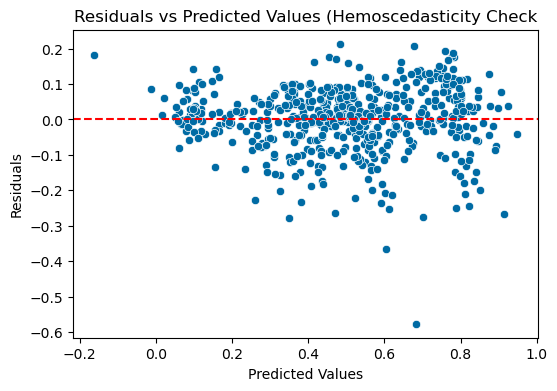

In [1057]:
# Plot residuals vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Hemoscedasticity Check")
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Normality of Residuals</h4>
</div>

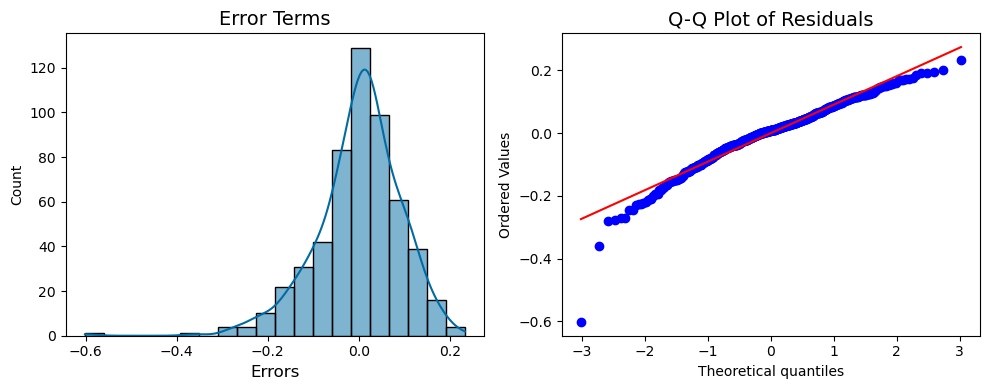

In [1060]:
# Calculating the residual
residual_train = eval(f'y{model}_train') - eval(f'y{model}_train_pred')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

# Plot 1: Histogram of error terms
sns.histplot(residual_train, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Error Terms', fontsize=14)    
axes[0].set_xlabel('Errors', fontsize=12) 

#plot 2: Q-Q Plot
stats.probplot(residual_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals', fontsize=14) 

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Validating homoscedasticity on Training Set</h4>
</div>

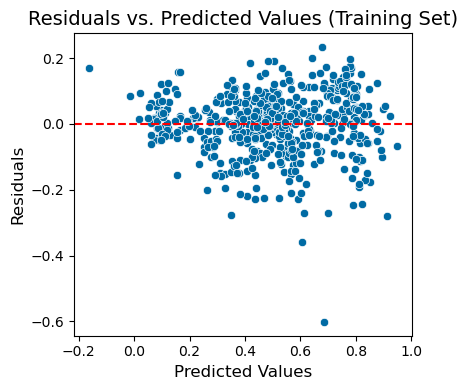

In [1063]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

# Plot 1: Residuals vs. predicted values
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train, ax=axes[0])
axes[0].set_title('Residuals vs. Predicted Values (Training Set)', fontsize=14)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].axhline(y=0, color='r', linestyle='--')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Checking Independence of Reiduals</h4>
</div>

<Figure size 500x400 with 0 Axes>

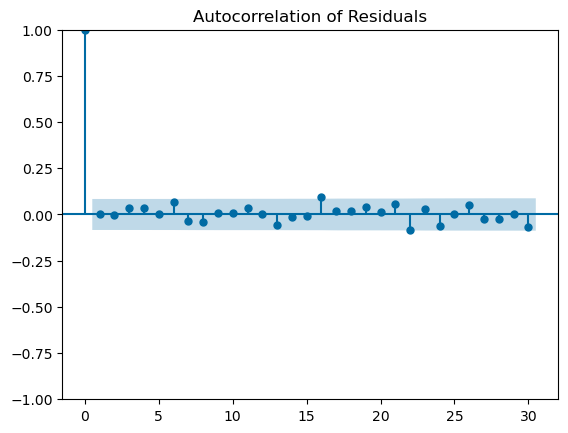

In [1066]:
# Autocorrelation plot of residuals
plt.figure(figsize=(5, 4))
plot_acf(residual_train, lags=30)
plt.title("Autocorrelation of Residuals")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Making Prediction</h4>
</div>

In [1069]:
# Making prediction on the test dataset using the model with last iteration
globals()[f'y{model}_test_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_test_sm'))

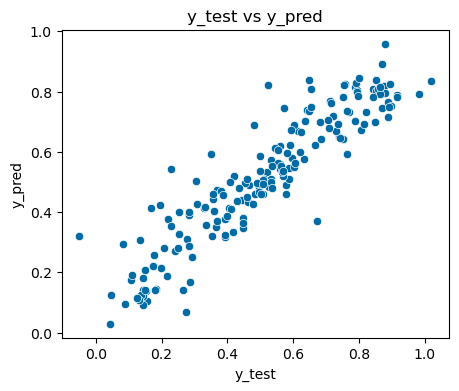

In [1071]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test'), y=eval(f'y{model}_test_pred'))
fig.suptitle('y_test vs y_pred', fontsize = 10) 
plt.xlabel('y_test')                      
plt.ylabel('y_pred') 
plt.title('y_test vs y_pred')
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Performance Metrics</h4>
</div>

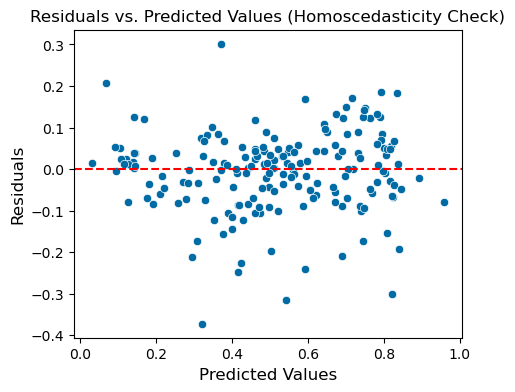

In [1074]:
# Calculate residuals (errors):
residual_test = eval(f'y{model}_test') - eval(f'y{model}_test_pred')

# Plot residuals vs. predicted values
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test_pred'), y=residual_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values', fontdict={'fontsize': 12})
plt.ylabel('Residuals', fontdict={'fontsize': 12})
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

In [1076]:
# Training set:
mse_train = mean_squared_error(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))

# Test set:
mse_test = mean_squared_error(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))

print("Training Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, R-squared: {r2_train}")
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R-squared: {r2_test}")

Training Set Metrics:
MSE: 0.00855338846694249, RMSE: 0.0924845309602773, R-squared: 0.8469655738776828
Test Set Metrics:
MSE: 0.009465182818054809, RMSE: 0.0972891711243076, R-squared: 0.8372159630824741


In [1078]:
bp_test = het_breuschpagan(residual_test, eval(f'X{model}_test_sm'))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 27.20651536304254, 'LM-Test p-value': 0.011655278536545861, 'F-Statistic': 2.270214961451936, 'F-Test p-value': 0.00885307738563751}


In [1080]:
eval(f'res{iteration}').params.sort_values(ascending=False)

previous_day_diff                   0.515521
heat_index                          0.436887
year                                0.250217
month_Sep                           0.111791
month_Oct                           0.089088
month_May                           0.087571
month_Mar                           0.066191
season_Winter                       0.054932
month_June                          0.052802
month_Aug                           0.045307
const                              -0.022330
weather_situation_Light_snowrain   -0.118168
season_Spring                      -0.150454
humidity                           -0.176383
dtype: float64

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h2 style="color: black;">MODEL 7</h2>
</div>

In [1155]:
model = 7

In [1157]:
model7_df = df.copy()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Feature Engineering</h3>
</div>

In [1160]:
# Applying the heat_index function to create a variable
model7_df['heat_index'] = model7_df.apply(lambda x: heat_index(x['temp'], x['humidity']), axis=1)

In [1162]:
# Calculate previous_day_diff
model7_df['previous_day_diff'] = model7_df['cnt'].diff()

In [1164]:
model7_df['previous_day_diff'].iloc[0] = 0

In [1166]:
model7_df

season  year month  holiday weekday  workingday weather_situation  \
0    Spring     0   Jan        0     Sat           0             Misty   
1    Spring     0   Jan        0     Sun           0             Misty   
2    Spring     0   Jan        0     Mon           1             Clear   
3    Spring     0   Jan        0     Tue           1             Clear   
4    Spring     0   Jan        0     Wed           1             Clear   
..      ...   ...   ...      ...     ...         ...               ...   
725  Spring     1   Dec        0    Thur           1             Misty   
726  Spring     1   Dec        0     Fri           1             Misty   
727  Spring     1   Dec        0     Sat           0             Misty   
728  Spring     1   Dec        0     Sun           0             Clear   
729  Spring     1   Dec        0     Mon           1             Misty   

          temp  feels_like_temp  humidity  windspeed   cnt  heat_index  \
0    14.110847         18.18125   80.5833  10.749882   985   57.399525   
1    14.902598         17.68695   69.6087  16.652113   801   58.824676   
2     8.050924          9.47025   43.7273  16.636703  1349   46.491663   
3     8.200000         10.60610   59.0435  10.739832  1562   46.760000   
4     9.305237         11.46350   43.6957  12.522300  1600   48.749427   
..         ...              ...       ...        ...   ...         ...   
725  10.420847         11.33210   65.2917  23.458911  2114   50.757525   
726  10.386653         12.75230   59.0000  10.416557  3095   50.695975   
727  10.386653         12.12000   75.2917   8.333661  1341   50.695975   
728  10.489153         11.58500   48.3333  23.500518  1796   50.880475   
729   8.849153         11.17435   57.7500  10.374682  2729   47.928475   

     previous_day_diff  
0                  0.0  
1               -184.0  
2                548.0  
3                213.0  
4                 38.0  
..                 ...  
725             1673.0  
726              981.0  
727            -1754.0  
728              455.0  
729              933.0  

[729 rows x 14 columns]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Dummy Variables (One-hot encoding)</h3>
</div>

In [1169]:
model7_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temp', 'feels_like_temp', 'humidity', 'windspeed',
       'cnt', 'heat_index', 'previous_day_diff'],
      dtype='object')

In [1171]:
dummy_df = model7_df.copy()

In [1173]:
dummy_df.head()

season  year month  holiday weekday  workingday weather_situation  \
0  Spring     0   Jan        0     Sat           0             Misty   
1  Spring     0   Jan        0     Sun           0             Misty   
2  Spring     0   Jan        0     Mon           1             Clear   
3  Spring     0   Jan        0     Tue           1             Clear   
4  Spring     0   Jan        0     Wed           1             Clear   

        temp  feels_like_temp  humidity  windspeed   cnt  heat_index  \
0  14.110847         18.18125   80.5833  10.749882   985   57.399525   
1  14.902598         17.68695   69.6087  16.652113   801   58.824676   
2   8.050924          9.47025   43.7273  16.636703  1349   46.491663   
3   8.200000         10.60610   59.0435  10.739832  1562   46.760000   
4   9.305237         11.46350   43.6957  12.522300  1600   48.749427   

   previous_day_diff  
0                0.0  
1             -184.0  
2              548.0  
3              213.0  
4               38.0

In [1175]:
# Creating a dummies for weather_situation and choosing which catogory to drop
# Clear
dummy_df = create_dummies(dummy_df, "weather_situation")

Percentage of each category in 'weather_situation':
weather_situation
Clear             63.511660
Misty             33.744856
Light_snowrain     2.743484
Name: proportion, dtype: float64



Enter the category to drop from 'weather_situation':  Clear



Dummy variables created for 'weather_situation', excluding 'Clear'.


In [1177]:
# Creating a dummies for month and choosing which catogory to drop
# Jan
dummy_df = create_dummies(dummy_df, "month")

Percentage of each category in 'month':
month
Jan     8.504801
May     8.504801
July    8.504801
Aug     8.504801
Oct     8.504801
Dec     8.504801
Mar     8.367627
Apr     8.230453
June    8.230453
Sep     8.230453
Nov     8.230453
Feb     7.681756
Name: proportion, dtype: float64



Enter the category to drop from 'month':  Jan



Dummy variables created for 'month', excluding 'Jan'.


In [1179]:
# Creating a dummies for weekday and choosing which catogory to drop
# Sat
dummy_df = create_dummies(dummy_df, "weekday")

Percentage of each category in 'weekday':
weekday
Sat     14.403292
Sun     14.403292
Mon     14.403292
Tue     14.266118
Fri     14.266118
Wed     14.128944
Thur    14.128944
Name: proportion, dtype: float64



Enter the category to drop from 'weekday':  Sat



Dummy variables created for 'weekday', excluding 'Sat'.


In [1181]:
dummy_df.head()

season  year  holiday  workingday       temp  feels_like_temp  humidity  \
0  Spring     0        0           0  14.110847         18.18125   80.5833   
1  Spring     0        0           0  14.902598         17.68695   69.6087   
2  Spring     0        0           1   8.050924          9.47025   43.7273   
3  Spring     0        0           1   8.200000         10.60610   59.0435   
4  Spring     0        0           1   9.305237         11.46350   43.6957   

   windspeed   cnt  heat_index  previous_day_diff  \
0  10.749882   985   57.399525                0.0   
1  16.652113   801   58.824676             -184.0   
2  16.636703  1349   46.491663              548.0   
3  10.739832  1562   46.760000              213.0   
4  12.522300  1600   48.749427               38.0   

   weather_situation_Light_snowrain  weather_situation_Misty  month_Apr  \
0                                 0                        1          0   
1                                 0                        1          0   
2                                 0                        0          0   
3                                 0                        0          0   
4                                 0                        0          0   

   month_Aug  month_Dec  month_Feb  month_July  month_June  month_Mar  \
0          0          0          0           0           0          0   
1          0          0          0           0           0          0   
2          0          0          0           0           0          0   
3          0          0          0           0           0          0   
4          0          0          0           0           0          0   

   month_May  month_Nov  month_Oct  month_Sep  weekday_Fri  weekday_Mon  \
0          0          0          0          0            0            0   
1          0          0          0          0            0            0   
2          0          0          0          0            0            1   
3          0          0          0          0            0            0   
4          0          0          0          0            0            0   

   weekday_Sun  weekday_Thur  weekday_Tue  weekday_Wed  
0            0             0            0            0  
1            1             0            0            0  
2            0             0            0            0  
3            0             0            1            0  
4            0             0            0            1

In [1183]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   season                            729 non-null    object 
 1   year                              729 non-null    int64  
 2   holiday                           729 non-null    int64  
 3   workingday                        729 non-null    int64  
 4   temp                              729 non-null    float64
 5   feels_like_temp                   729 non-null    float64
 6   humidity                          729 non-null    float64
 7   windspeed                         729 non-null    float64
 8   cnt                               729 non-null    int64  
 9   heat_index                        729 non-null    float64
 10  previous_day_diff                 729 non-null    float64
 11  weather_situation_Light_snowrain  729 non-null    int32  
 12  weather_situa

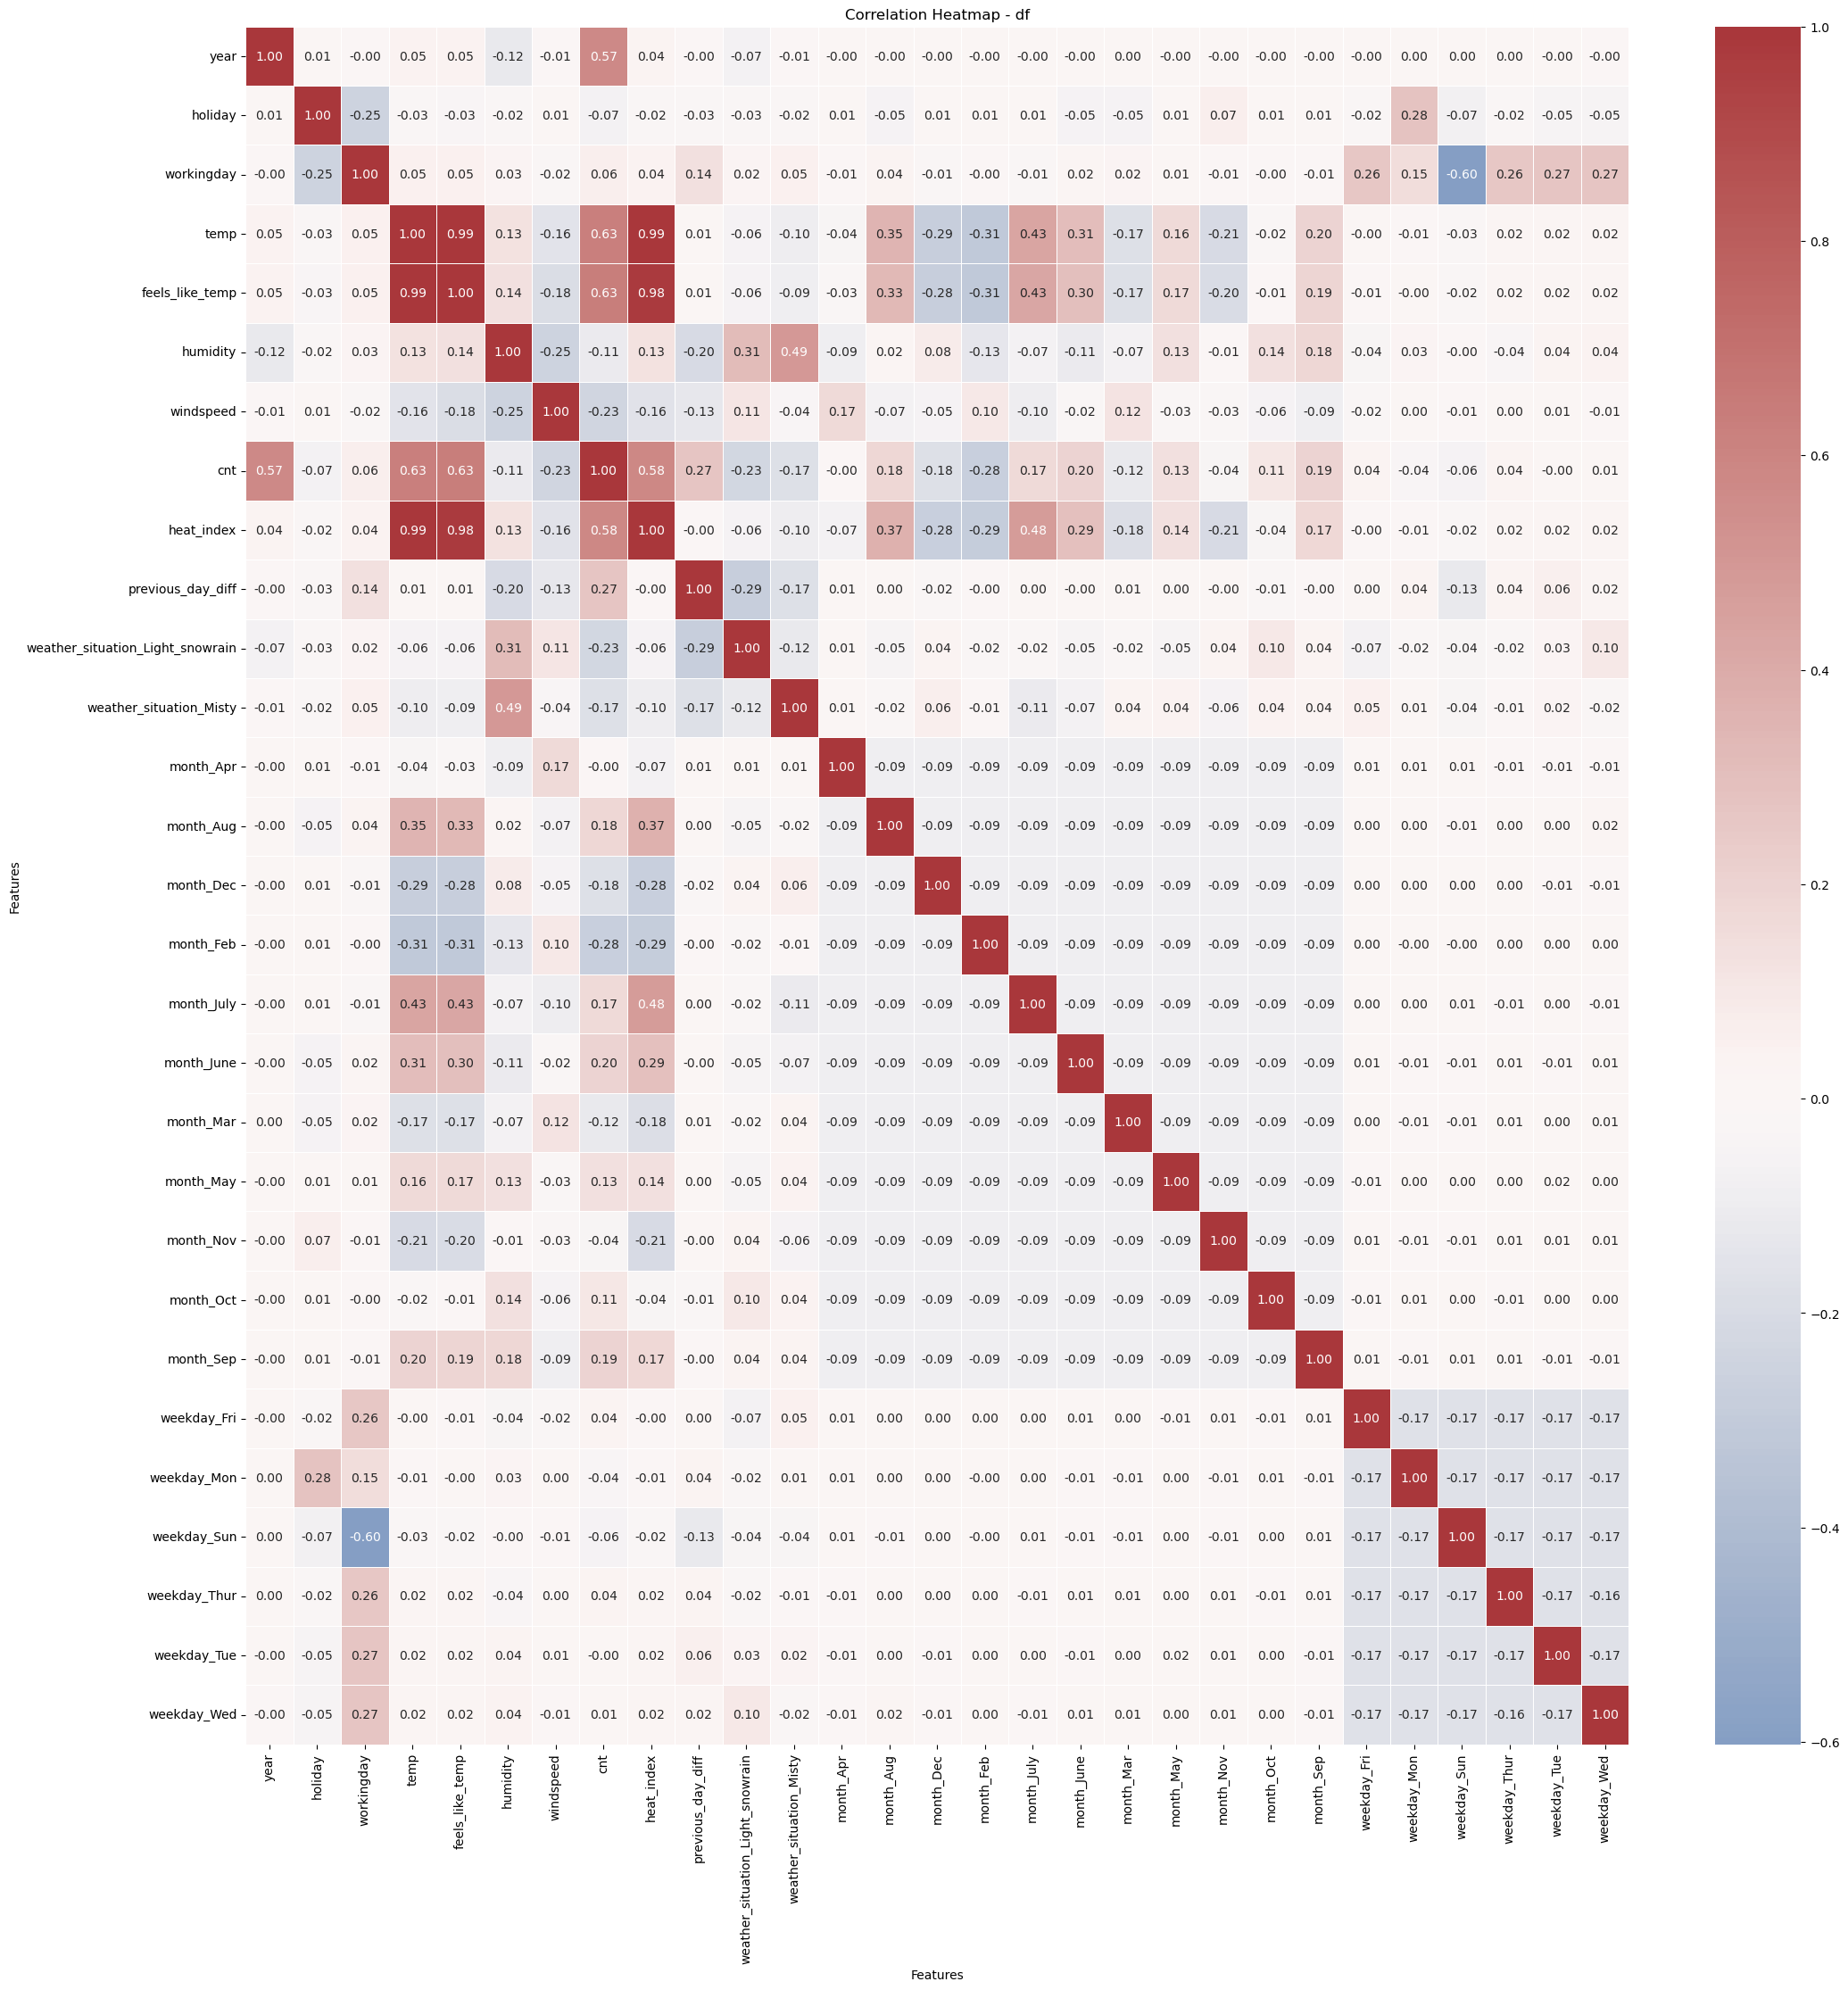

In [1185]:
dummy_df.drop(columns='season',inplace=True)
# Calculate the correlation matrix with all dummy variables
corr_matrix = dummy_df.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5, center=0)
# Set title and labels
plt.title('Correlation Heatmap - df')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

In [1187]:
# Excluding few columns for this model
exclude_cols = ['feels_like_temp','holiday','temp']
# Select columns not in `exclude_cols`
globals()[f'model{model}_df'] = dummy_df.loc[:, ~dummy_df.columns.isin(exclude_cols)]

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h3 style="color: black;">Model Building and Evaluation</h3>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Train-Test Split</h4>
</div>

In [1191]:
globals()[f'df_train{model}'],globals()[f'df_test{model}'] = train_test_split(eval(f'model{model}_df'), test_size=0.25, random_state=120)

In [1193]:
print("Training dataset shape:", eval(f'df_train{model}').shape)
print("Testing dataset shape:", eval(f'df_test{model}').shape)

Training dataset shape: (546, 26)
Testing dataset shape: (183, 26)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Scaling</h4>
</div>

In [1196]:
globals()[f'scaler{model}'] = MinMaxScaler()

globals()[f'df{model}_train_scale'] = eval(f'scaler{model}').fit_transform(eval(f'df_train{model}'))
# Use the same scaler fitted on the training data 
globals()[f'df{model}_test_scale']  = eval(f'scaler{model}').transform(eval(f'df_test{model}'))

In [1198]:
# converting Array to dataframe
globals()[f'df{model}_train'] = pd.DataFrame(eval(f'df{model}_train_scale'),columns=eval(f'model{model}_df').columns)
globals()[f'df{model}_test'] = pd.DataFrame(eval(f'df{model}_test_scale'),columns=eval(f'model{model}_df').columns)

In [1200]:
# Splitting the dependent variable and independent variable
# Train dataset
globals()[f'X{model}_train'] = eval(f'df{model}_train').drop('cnt',axis=1)
globals()[f'y{model}_train'] = eval(f'df{model}_train')['cnt']

# Test Dataset
globals()[f'X{model}_test'] = eval(f'df{model}_test').drop('cnt',axis=1)
globals()[f'y{model}_test'] = eval(f'df{model}_test')['cnt']

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Feature Selection</h4>
</div>

In [1203]:
len(eval(f'X{model}_train').columns)

25

In [1205]:
# Considering 18 columns 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=18) #8-25

selector = selector.fit(eval(f'X{model}_train'), eval(f'y{model}_train'))

In [1207]:
pd.DataFrame({
    'Feature': eval(f'X{model}_train').columns, 
    'Selected': selector.support_,
    'Rank': selector.ranking_
}).sort_values(by='Rank')

Feature  Selected  Rank
0                               year      True     1
20                       weekday_Mon      True     1
18                         month_Sep      True     1
17                         month_Oct      True     1
16                         month_Nov      True     1
15                         month_May      True     1
14                         month_Mar      True     1
13                        month_June      True     1
23                       weekday_Tue      True     1
10                         month_Dec      True     1
12                        month_July      True     1
8                          month_Apr      True     1
6   weather_situation_Light_snowrain      True     1
5                  previous_day_diff      True     1
4                         heat_index      True     1
3                          windspeed      True     1
2                           humidity      True     1
9                          month_Aug      True     1
1                         workingday     False     2
24                       weekday_Wed     False     3
22                      weekday_Thur     False     4
19                       weekday_Fri     False     5
21                       weekday_Sun     False     6
11                         month_Feb     False     7
7            weather_situation_Misty     False     8

In [1209]:
# Selecting the columns which VIF selected for further model building.
selected_feature = eval(f'X{model}_train').columns[selector.support_]
print(selected_feature)

Index(['year', 'humidity', 'windspeed', 'heat_index', 'previous_day_diff',
       'weather_situation_Light_snowrain', 'month_Apr', 'month_Aug',
       'month_Dec', 'month_July', 'month_June', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Mon', 'weekday_Tue'],
      dtype='object')


In [1211]:
# Selecting the feature based on RFE in training and testing dataset
globals()[f'X{model}_train'] = eval(f'X{model}_train')[selected_feature]
globals()[f'X{model}_test'] = eval(f'X{model}_test')[selected_feature]

In [1213]:
print(eval(f'X{model}_train').shape)
print(eval(f'X{model}_test').shape)

(546, 18)
(183, 18)


<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Modeling</h4>
</div>

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 1</b></h5>
</div>

In [1217]:
iteration = 1

In [1219]:
# Adding interseption (beta0) to the model 
globals()[f'X{model}_train_sm'] = sm.add_constant(eval(f'X{model}_train'))
globals()[f'X{model}_test_sm'] = sm.add_constant(eval(f'X{model}_test'))

In [1221]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          5.22e-193
Time:                        18:07:24   Log-Likelihood:                 505.26
No. Observations:                 546   AIC:                            -972.5
Df Residuals:                     527   BIC:                            -890.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0918      0.035     -2.607      0.009      -0.161      -0.023
year                                 0.2533      0.009     29.714      0.000       0.237       0.270
humidity                            -0.1806      0.026     -6.952      0.000      -0.232      -0.130
windspeed                           -0.1271      0.025     -5.041      0.000      -0.177      -0.078
heat_index                           0.4027      0.048      8.326      0.000       0.308       0.498
previous_day_diff                    0.4915      0.043     11.458      0.000       0.407       0.576
weather_situation_Light_snowrain    -0.1058      0.029     -3.695      0.000      -0.162      -0.050
month_Apr                            0.1846      0.020      9.011      0.000       0.144       0.225
month_Aug                            0.2006      0.030      6.787      0.000       0.143       0.259
month_Dec                            0.1148      0.018      6.281      0.000       0.079       0.151
month_July                           0.1624      0.033      4.980      0.000       0.098       0.226
month_June                           0.2124      0.029      7.388      0.000       0.156       0.269
month_Mar                            0.1267      0.019      6.667      0.000       0.089       0.164
month_May                            0.2449      0.024     10.316      0.000       0.198       0.292
month_Nov                            0.1931      0.019     10.364      0.000       0.156       0.230
month_Oct                            0.2921      0.021     13.968      0.000       0.251       0.333
month_Sep                            0.2768      0.025     11.046      0.000       0.228       0.326
weekday_Mon                         -0.0194      0.013     -1.542      0.124      -0.044       0.005
weekday_Tue                         -0.0144      0.012     -1.203      0.229      -0.038       0.009
==============================================================================
Omnibus:                      138.362   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.277
Skew:                          -1.186   Prob(JB):                     1.36e-94
Kurtosis:                       6.657   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1223]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  70.962222
4                         heat_index   5.915835
10                        month_July   4.882181
8                          month_Aug   4.162580
11                        month_June   3.506759
16                         month_Sep   2.610031
13                         month_May   2.540433
15                         month_Oct   1.856400
7                          month_Apr   1.781471
12                         month_Mar   1.595572
14                         month_Nov   1.503692
9                          month_Dec   1.446917
2                           humidity   1.435682
6   weather_situation_Light_snowrain   1.254725
3                          windspeed   1.205651
5                  previous_day_diff   1.144718
17                       weekday_Mon   1.051715
1                               year   1.040105
18                       weekday_Tue   1.039602

In [1225]:
# Dropping the column with high VIF and re-assigning it to the global variables
globals()[f'X{model}_train_sm'].drop("weekday_Tue", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Tue", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 2</b></h5>
</div>

In [1228]:
iteration = 2

In [1230]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     157.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          8.42e-194
Time:                        18:07:51   Log-Likelihood:                 504.51
No. Observations:                 546   AIC:                            -973.0
Df Residuals:                     528   BIC:                            -895.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0906      0.035     -2.573      0.010      -0.160      -0.021
year                                 0.2533      0.009     29.696      0.000       0.237       0.270
humidity                            -0.1821      0.026     -7.011      0.000      -0.233      -0.131
windspeed                           -0.1279      0.025     -5.075      0.000      -0.177      -0.078
heat_index                           0.4018      0.048      8.305      0.000       0.307       0.497
previous_day_diff                    0.4868      0.043     11.391      0.000       0.403       0.571
weather_situation_Light_snowrain    -0.1055      0.029     -3.683      0.000      -0.162      -0.049
month_Apr                            0.1853      0.020      9.045      0.000       0.145       0.226
month_Aug                            0.2013      0.030      6.811      0.000       0.143       0.259
month_Dec                            0.1153      0.018      6.307      0.000       0.079       0.151
month_July                           0.1627      0.033      4.989      0.000       0.099       0.227
month_June                           0.2131      0.029      7.411      0.000       0.157       0.270
month_Mar                            0.1268      0.019      6.671      0.000       0.089       0.164
month_May                            0.2454      0.024     10.335      0.000       0.199       0.292
month_Nov                            0.1936      0.019     10.390      0.000       0.157       0.230
month_Oct                            0.2925      0.021     13.980      0.000       0.251       0.334
month_Sep                            0.2775      0.025     11.072      0.000       0.228       0.327
weekday_Mon                         -0.0168      0.012     -1.357      0.175      -0.041       0.008
==============================================================================
Omnibus:                      141.799   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.983
Skew:                          -1.197   Prob(JB):                    3.94e-102
Kurtosis:                       6.847   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1232]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  70.906077
4                         heat_index   5.914530
10                        month_July   4.881761
8                          month_Aug   4.160699
11                        month_June   3.505334
16                         month_Sep   2.608644
13                         month_May   2.539605
15                         month_Oct   1.856054
7                          month_Apr   1.780052
12                         month_Mar   1.595516
14                         month_Nov   1.502916
9                          month_Dec   1.446160
2                           humidity   1.432719
6   weather_situation_Light_snowrain   1.254624
3                          windspeed   1.204665
5                  previous_day_diff   1.135217
1                               year   1.040088
17                       weekday_Mon   1.021381

In [1234]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("weekday_Mon", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("weekday_Mon", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h5 style="color: black;"><b>Iteration 3</b></h5>
</div>

In [1237]:
iteration = 3

In [1239]:
globals()[f'model{model}'] = sm.OLS(np.array(eval(f'y{model}_train')), eval(f'X{model}_train_sm'))
globals()[f'res{iteration}'] = eval(f'model{model}').fit()
globals()[f'res{iteration}'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     166.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.60e-194
Time:                        18:08:48   Log-Likelihood:                 503.56
No. Observations:                 546   AIC:                            -973.1
Df Residuals:                     529   BIC:                            -900.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0902      0.035     -2.561      0.011      -0.159      -0.021
year                                 0.2526      0.009     29.643      0.000       0.236       0.269
humidity                            -0.1846      0.026     -7.123      0.000      -0.236      -0.134
windspeed                           -0.1301      0.025     -5.166      0.000      -0.180      -0.081
heat_index                           0.4012      0.048      8.287      0.000       0.306       0.496
previous_day_diff                    0.4855      0.043     11.355      0.000       0.402       0.570
weather_situation_Light_snowrain    -0.1023      0.029     -3.581      0.000      -0.158      -0.046
month_Apr                            0.1865      0.020      9.107      0.000       0.146       0.227
month_Aug                            0.2025      0.030      6.848      0.000       0.144       0.261
month_Dec                            0.1163      0.018      6.364      0.000       0.080       0.152
month_July                           0.1640      0.033      5.025      0.000       0.100       0.228
month_June                           0.2138      0.029      7.432      0.000       0.157       0.270
month_Mar                            0.1284      0.019      6.766      0.000       0.091       0.166
month_May                            0.2459      0.024     10.348      0.000       0.199       0.293
month_Nov                            0.1942      0.019     10.419      0.000       0.158       0.231
month_Oct                            0.2932      0.021     14.008      0.000       0.252       0.334
month_Sep                            0.2779      0.025     11.080      0.000       0.229       0.327
==============================================================================
Omnibus:                      139.059   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.002
Skew:                          -1.178   Prob(JB):                     1.16e-98
Kurtosis:                       6.777   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1241]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=eval(f'X{model}_train_sm').columns
vif_data["VIF"]=[variance_inflation_factor(eval(f'X{model}_train_sm').values,i) 
                 for i in range(len(eval(f'X{model}_train_sm').columns))]
vif_data.sort_values(by='VIF',ascending=False)

Feature        VIF
0                              const  70.902490
4                         heat_index   5.914033
10                        month_July   4.877960
8                          month_Aug   4.157196
11                        month_June   3.504052
16                         month_Sep   2.608264
13                         month_May   2.539029
15                         month_Oct   1.854820
7                          month_Apr   1.776537
12                         month_Mar   1.589106
14                         month_Nov   1.501982
9                          month_Dec   1.443622
2                           humidity   1.425134
6   weather_situation_Light_snowrain   1.246118
3                          windspeed   1.200029
5                  previous_day_diff   1.134687
1                               year   1.037102

In [1033]:
# Dropping the column with high VIF
globals()[f'X{model}_train_sm'].drop("month_Apr", axis=1, inplace=True)
globals()[f'X{model}_test_sm'].drop("month_Apr", axis=1, inplace=True)

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Residual Analysis (Linearity)</h4>
</div>

In [1243]:
# Predicting the known Y values in the training dataset using the model.
globals()[f'y{model}_train_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_train_sm'))

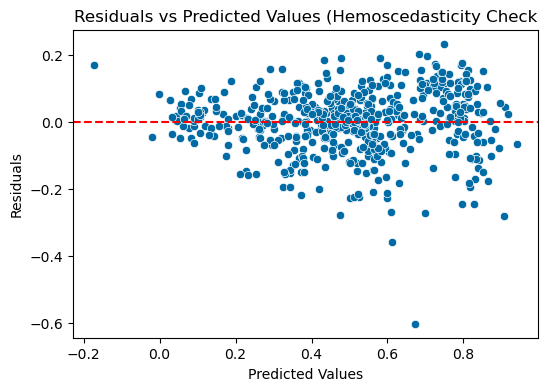

In [1245]:
# Plot residuals vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Hemoscedasticity Check")
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Normality of Residuals</h4>
</div>

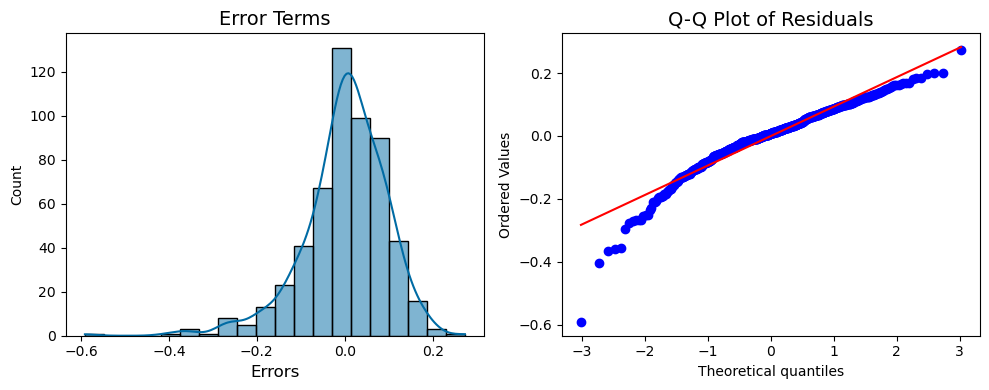

In [1248]:
# Calculating the residual
residual_train = eval(f'y{model}_train') - eval(f'y{model}_train_pred')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

# Plot 1: Histogram of error terms
sns.histplot(residual_train, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Error Terms', fontsize=14)    
axes[0].set_xlabel('Errors', fontsize=12) 

#plot 2: Q-Q Plot
stats.probplot(residual_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals', fontsize=14) 

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Validating homoscedasticity on Training Set</h4>
</div>

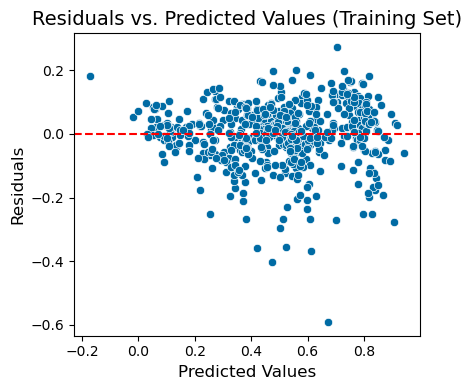

In [1251]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

# Plot 1: Residuals vs. predicted values
sns.scatterplot(x=eval(f'y{model}_train_pred'), y=residual_train, ax=axes[0])
axes[0].set_title('Residuals vs. Predicted Values (Training Set)', fontsize=14)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].axhline(y=0, color='r', linestyle='--')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Checking Independence of Reiduals</h4>
</div>

<Figure size 500x400 with 0 Axes>

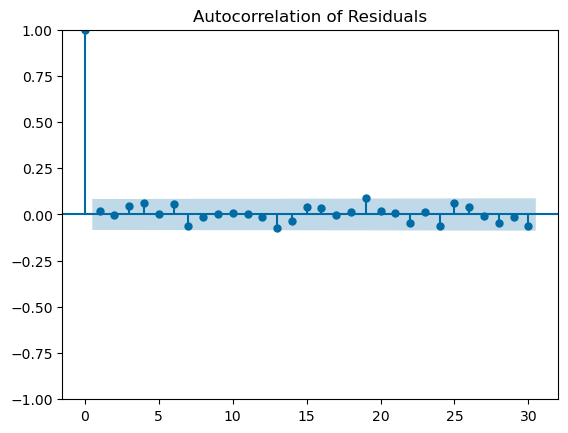

In [1254]:
# Autocorrelation plot of residuals
plt.figure(figsize=(5, 4))
plot_acf(residual_train, lags=30)
plt.title("Autocorrelation of Residuals")

plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Making Prediction</h4>
</div>

In [1257]:
# Making prediction on the test dataset using the model with last iteration
globals()[f'y{model}_test_pred'] = eval(f'res{iteration}').predict(eval(f'X{model}_test_sm'))

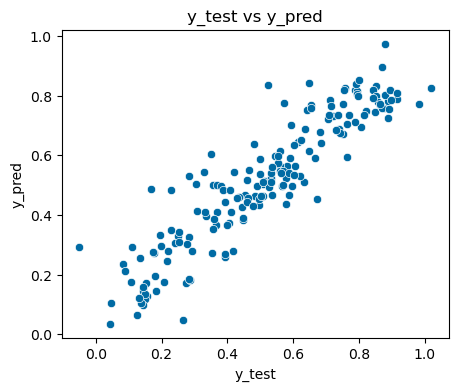

In [1259]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test'), y=eval(f'y{model}_test_pred'))
fig.suptitle('y_test vs y_pred', fontsize = 10) 
plt.xlabel('y_test')                      
plt.ylabel('y_pred') 
plt.title('y_test vs y_pred')
plt.show()

<div style="background-color: lightgray; padding: 5px; border-radius: 2px;">
    <h4 style="color: black;">Performance Metrics</h4>
</div>

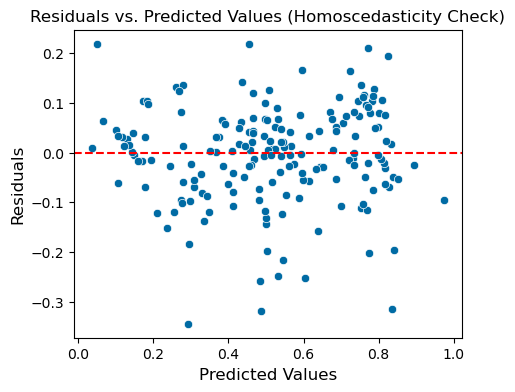

In [1262]:
# Calculate residuals (errors):
residual_test = eval(f'y{model}_test') - eval(f'y{model}_test_pred')

# Plot residuals vs. predicted values
plt.figure(figsize=(5, 4))
sns.scatterplot(x=eval(f'y{model}_test_pred'), y=residual_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values', fontdict={'fontsize': 12})
plt.ylabel('Residuals', fontdict={'fontsize': 12})
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

In [1264]:
# Training set:
mse_train = mean_squared_error(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(eval(f'y{model}_train'), eval(f'y{model}_train_pred'))

# Test set:
mse_test = mean_squared_error(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(eval(f'y{model}_test'), eval(f'y{model}_test_pred'))

print("Training Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, R-squared: {r2_train}")
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R-squared: {r2_test}")

Training Set Metrics:
MSE: 0.009256562621594229, RMSE: 0.09621103170423977, R-squared: 0.8343846121176657
Test Set Metrics:
MSE: 0.009688955981389276, RMSE: 0.09843249454011249, R-squared: 0.8333674691250299


In [1266]:
bp_test = het_breuschpagan(residual_test, eval(f'X{model}_test_sm'))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 47.95923360177643, 'LM-Test p-value': 4.8205248266438295e-05, 'F-Statistic': 3.6846432517356926, 'F-Test p-value': 9.080011666555528e-06}


In [1268]:
eval(f'res{iteration}').params.sort_values(ascending=False)

previous_day_diff                   0.485517
heat_index                          0.401211
month_Oct                           0.293188
month_Sep                           0.277905
year                                0.252639
month_May                           0.245915
month_June                          0.213805
month_Aug                           0.202491
month_Nov                           0.194224
month_Apr                           0.186532
month_July                          0.163958
month_Mar                           0.128444
month_Dec                           0.116318
const                              -0.090221
weather_situation_Light_snowrain   -0.102287
windspeed                          -0.130053
humidity                           -0.184633
dtype: float64

## Observation:
Homoscedasticity is a key assumption in regression models, indicating that the variance of the error terms is constant across all levels of the independent variables.

In the models, the Breusch-Pagan test consistently yields p-values less than 0.05. This suggests that the model reject the null hypothesis of homoscedasticity(bad) where Null Hypothesis is heteroscedasticity(good). In simpler terms, there is no strong evidence to suggest heteroscedasticity (unequal variance) in your models.

### Addressing Homoscedasticity:

**Transformations:**

Apply transformations to the dependent or independent variables, such as logarithmic or square root transformations.
This can help stabilize the variance and improve the model's assumptions.
Weighted Least Squares (WLS):

Assign weights to observations based on their variance.
This can help account for heteroscedasticity and improve the model's efficiency.

**Robust Standard Errors:**

Use robust standard errors to adjust for heteroscedasticity in hypothesis testing and confidence interval calculations.

**Model Specification:**

Re-evaluate the model specification, including the functional form of the relationship between variables and the inclusion of relevant control variables.
In your specific case, where the p-value is extremely low (4.82e-05) after removing variables, it's possible that the model simplification has inadvertently introduced heteroscedasticity.


# Conclusion
### 1. Predictive Features:

- **Previous Day’s Demand:** Both models consistently identified previous day's demand (previous_day_diff) as a primary driver, suggesting that usage trends and demand continuity play a key role in predicting future demand.

- **Temperature and Heat Index:** Model 4 highlighted temperature, while Model 5 introduced the heat index as a strong indicator of demand, indicating that comfortable weather conditions (moderate temperatures) are conducive to higher usage.

- **Year-on-Year Increase:** The year variable was significant in both models, reflecting potential growth in market acceptance or expanding user adoption over time.
### 2. Seasonal and Monthly Impact:

- **Seasonality:** Both models showed that winter positively influences demand, while spring shows a slight negative impact. This suggests that BoomBikes may consider promoting off-season bike use in spring to balance seasonal dips.

- **Monthly Patterns:** Model 5, with a more detailed breakdown of months, showed higher demand in months like September, May, October, and March. This granular view could enable BoomBikes to optimize pricing and availability for peak months.
### 3. Negative Influences:

- **Humidity and Wind Speed:** High humidity and wind speed were consistently associated with lower demand across both models. BoomBikes can leverage this insight to adjust forecasts and supply dynamically based on weather patterns.

- **Weather Conditions:** Both models show a decline in demand on days with adverse weather, such as light snow or rain. To address this, BoomBikes could introduce features like grippier tires, a lightweight protective roof, and sheltered bike parking areas. These additions would allow riders to wait out light rain comfortably before resuming their journey with easily accessible protective bikes.

## Model Comparison
- **Model 4** is simpler, factoring in fewer monthly and weekday variations, which may make it easier to interpret but potentially less accurate in capturing demand variability due to monthly influences.
- **Model 5**, with more extensive monthly detail, offers a more precise reflection of demand trends across different times of the year, potentially aiding BoomBikes in optimizing inventory and marketing efforts on a month-by-month basis. 
- Despite this, both models show similar predictive performance, with marginal differences in MSE and R-squared.